In [12]:
using Pkg
Pkg.add("Plots")
Pkg.add("Distributions")
Pkg.add("Interpolations")
Pkg.add("CSV")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [3]:
using Distributions
using Interpolations
using Plots

#Here are the various functions used in the project. 
# In the future shells there are examples how these are used.
# The examples produce the figures used in the paper.pdf

# If it takes too long for a program to run, try changing the
# number of Monte Carlo iterations N. I found relatively good 
# convergence and speed with N between 1000-10000.

#You need to define the following variables and the potential 
#for everything to run smoothly:

#m = 
#SR1 = 
#SR2 = 
#SR3 = 
#x0 = 
#xmin = 
#xmax = 
#t0 = 
#t1 = 
#n = 
#n1 = 
#N = 
#deltat = 
#xfinal = 
#sigma1 = 
#sigma2 = 
#sigma3 = 

#function V(x)  
#    return 5-5*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
#end

#The function ProbGaussian(x0,x1) gives the transition probability
# x0->x1 using the Gaussian sampling in the Monte Carlo integration.
# The distribution is not normalized.

function ProbGaussian(x0,x1)
    
    var1 = 0;
    for j in 1:N
        var2 = 1
        aux1 = x0;
        for i in 1:(n-1)
            aux2 = rand(Normal(aux1,(deltat/m)^(1/2)))
            var2 = var2*exp(-deltat*(V((aux2))));
            aux1 = aux2;
        end
        aux2 = x1;
        var2 = var2*exp(-deltat*((1/2)*m*((aux2-aux1)/deltat)^2+V((aux2))));
        
        var1 = var1 + var2;
    end
    return var1;
end

#The function ProbUniform(x0,x1) gives the transition probability
# x0->x1 using the uniform sampling in the Monte Carlo integration.
# The distribution is not normalized.

function ProbUniform(x0,x1)
    
    x = Base.rand(Uniform(xmin,xmax),n-1,N);
    x = reshape(x,(n-1,N));
    
    var1 = 0;
        for j in 1:N
        var2 = 1
            for i in 1:(n-2)
                var2 = var2*
                    exp(-deltat*((1/2)*m*((x[i+1,j]-x[i,j])/deltat)^2+V((x[i+1,j]))));
            end
            var2 = var2*exp(-deltat*((1/2)*m*((x[1,j]-x0)/deltat)^2+V((x[1,j]))));
            var2 = var2*exp(-deltat*((1/2)*m*((x1-x[n-1,j])/deltat)^2+V((x1))));
        
            var1 = var1 + var2;
        end
    return var1;
end

#The function Sample(x0) gives a sample from the 
# transition probability distribution. It uses the Gaussian sampling.

function Sample(x0)  
    
    #First we generate the normalized distribution. 
    
    probs =  []
    
    for i in 1:length(xfinal)
        append!(probs,ProbGaussian(x0,xfinal[i]));
    end

    cum = sum(probs);

    data = probs/cum;
    
    #We use inverse transform sampling to generate 
    #samples from the new probability distribution.
    
    dataaux = [];

    s = 0;
    for i in 1:(length(xfinal))
        s = s + data[i];
        append!(dataaux,s);
    end
    
    aux = Base.rand(Uniform(0.0,1));
    
    #The next function is the inverse of the cumulative distribution.
    
    inverseCumulative = linear_interpolation(dataaux,xfinal);
    
    return inverseCumulative(aux)
end




Sample (generic function with 1 method)

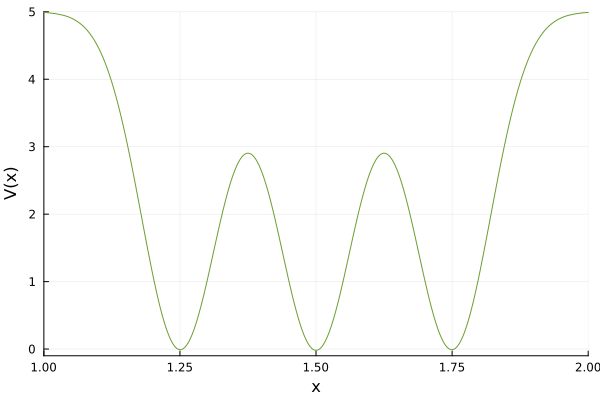

"/home/akapiisp/Documents/Documents/Research/smbproject/pot.png"

In [4]:
#Fig. 2 the potential.

#First we define the necessary parameters and the wanted potential

SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
xmin = 1;
xmax = 2;
sigma1 = 0.01;
sigma2 = 0.01;
sigma3 = 0.01;
C=5;

function V(x)  
    return C-C*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
end

p = plot(V,xmin,xmax,xlims=(xmin,xmax),primary = false,ylims = (-0.1,5),xlabel="x",ylabel="V(x)")
display(p)
savefig(p,"pot.png")


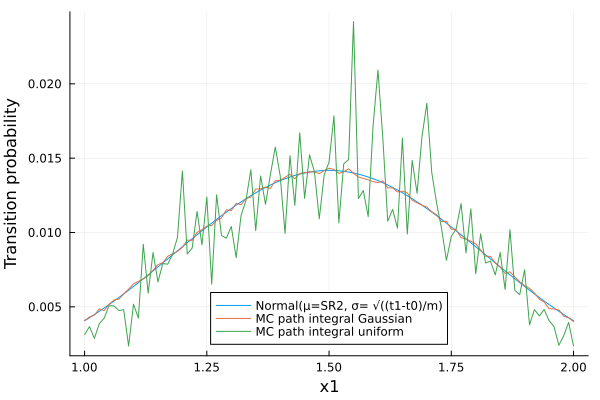

"/home/akapiisp/Documents/Documents/Research/smbproject/comparison.png"

In [5]:
#FIG. 3 comparison of Gaussian and uniform sampling

#First we define the necessary parameters and the wanted potential

m = 100;
SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
x0 = SR2;
xmin = 1;
xmax = 2;
t0 = 0;
t1 = 10;
n = 7;
n1 = 100;
N = 10000;
deltat = (t1-t0)/n;
xfinal = xmin:((xmax-xmin)/n1):xmax;

#Here set the potential to 0.

function V(x)  
    return 0
end


#The normalized distribution for the actual Gaussian distrbution. 

probs =  fill(0.0, length(xfinal));

for i in 1:length(xfinal)
    probs[i] = pdf(Normal(x0, ((t1-t0)/m)^(1/2)),xfinal[i]);
end

cum = sum(probs);

data1 = probs/cum;

#The normalized distribution from the path integral using Gaussian sampling.

probs =  fill(0.0, length(xfinal));
    
for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data2 = probs/cum;

#The normalized distribution from the path integral using uniform sampling.

probs =  fill(0.0, length(xfinal));
    
for i in 1:length(xfinal)
    probs[i] = ProbUniform(x0,xfinal[i]);
end

cum = sum(probs);

data3 = probs/cum;

p = plot(xfinal,data1,label = "Normal(μ=SR2, σ= √((t1-t0)/m)", ylabel="Transition probability",xlabel="x1",legend=:bottom)
plot!(xfinal,data2, label = "MC path integral Gaussian")
display(plot!(xfinal,data3,label = "MC path integral uniform"))
savefig(p,"comparison.png")

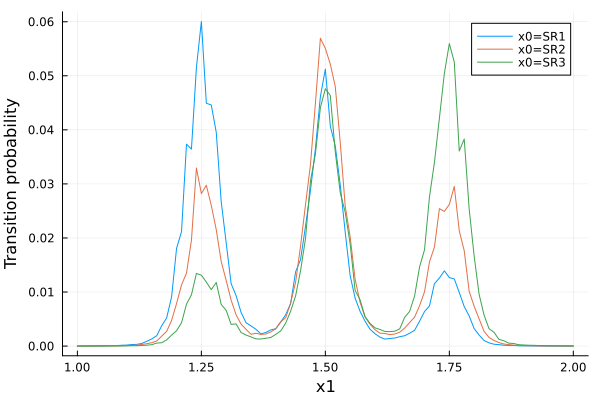

"/home/akapiisp/Documents/Documents/Research/smbproject/trans1.png"

In [6]:
#FIG. 4 transition probability with varying x0.

#Define necessary parameters and potential.

m = 100;
SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
xmin = 1;
xmax = 2;
t0 = 0;
t1 = 10;
n = 10;
n1 = 100;
N = 100000;
deltat = (t1-t0)/n;
xfinal = xmin:((xmax-xmin)/n1):xmax;
sigma1 = 0.01;
sigma2 = 0.01;
sigma3 = 0.01;
C=5;

function V(x)  
    return C-C*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
end

#The normalized distribution for x0 = SR1.

probs =  fill(0.0, length(xfinal));

x0 = SR1

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data1 = probs/cum;

#The normalized distribution for x0 = SR2.

probs =  fill(0.0, length(xfinal));

x0 = SR2

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data2 = probs/cum;

#The normalized distribution for x0 = SR3.

probs =  fill(0.0, length(xfinal));

x0 = SR3

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data3 = probs/cum;

p = plot(xfinal,data1,label = "x0=SR1",ylabel="Transition probability",xlabel="x1",legend=:topright)
plot!(xfinal,data2,label = "x0=SR2")
display(plot!(xfinal,data3,label = "x0=SR3"))
savefig(p,"trans1.png")


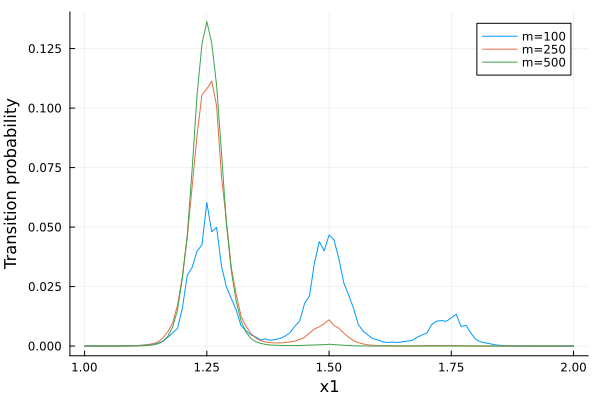

"/home/akapiisp/Documents/Documents/Research/smbproject/trans2.png"

In [7]:
#FIG. 5 the transition probability for different masses.

#Define necessary parameters and potential.

SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
x0 = SR1;
xmin = 1;
xmax = 2;
t0 = 0;
t1 = 10;
n = 10;
n1 = 100;
N = 100000;
deltat = (t1-t0)/n;
xfinal = xmin:((xmax-xmin)/n1):xmax;
sigma1 = 0.01;
sigma2 = 0.01;
sigma3 = 0.01;
C = 5;

function V(x)  
    return C-C*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
end

#The normalized distribution for m = 100.

probs =  fill(0.0, length(xfinal));

m = 100

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data1 = probs/cum;

#The normalized distribution for m = 250.

probs =  fill(0.0, length(xfinal));

m = 250

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data2 = probs/cum;

##The normalized distribution for m = 500.

probs =  fill(0.0, length(xfinal));

m = 500

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data3 = probs/cum;

p = plot(xfinal,data1,label = "m=100",ylabel="Transition probability",xlabel="x1",legend=:topright)
plot!(xfinal,data2,label = "m=250")
display(plot!(xfinal,data3,label = "m=500"))
savefig(p,"trans2.png")


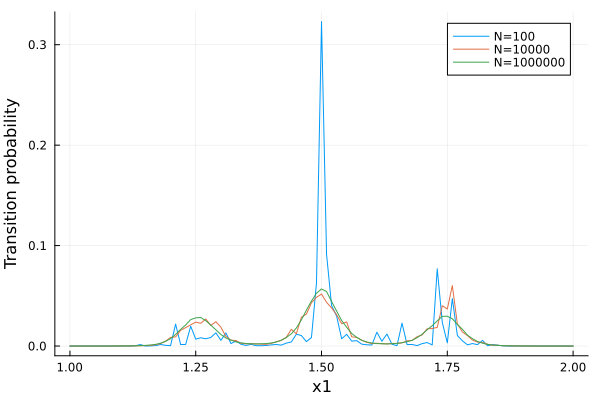

"/home/akapiisp/Documents/Documents/Research/smbproject/trans3.png"

In [8]:
#FIG. 6 the transition probability for different 
# number of Monte Carlo iterations.

#Define necessary parameters.

m = 100
SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
x0 = SR2;
xmin = 1;
xmax = 2;
t0 = 0;
t1 = 10;
n = 10;
n1 = 100;
deltat = (t1-t0)/n;
xfinal = xmin:((xmax-xmin)/n1):xmax;
sigma1 = 0.01;
sigma2 = 0.01;
sigma3 = 0.01;
C = 5;

function V(x)  
    return C-C*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
end

#Normalized distribution for N = 100.

probs =  fill(0.0, length(xfinal));

N = 100

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data1 = probs/cum;

#Normalized distribution for N = 10000.

probs =  fill(0.0, length(xfinal));

N = 10000

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data2 = probs/cum;

#Normalized distribution for N = 1000000.

probs =  fill(0.0, length(xfinal));

N = 1000000

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data3 = probs/cum;

p = plot(xfinal,data1,label = "N=100",ylabel="Transition probability",xlabel="x1",legend=:topright)
plot!(xfinal,data2,label = "N=10000")
display(plot!(xfinal,data3,label = "N=1000000"))
savefig(p,"trans3.png")


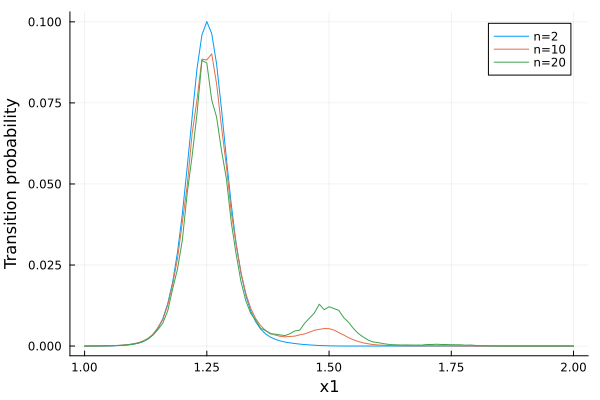

"/home/akapiisp/Documents/Documents/Research/smbproject/trans4.png"

In [11]:
#FIG. 7 the transition probability for different mesh sizes.

#Define necessary parameters and potential.

m = 200
SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
x0 = SR1;
xmin = 1;
xmax = 2;
t0 = 0;
t1 = 10;
n1 = 100;
N = 100000;
deltat = (t1-t0)/n;
xfinal = xmin:((xmax-xmin)/n1):xmax;
sigma1 = 0.01;
sigma2 = 0.01;
sigma3 = 0.01;
C = 5;

function V(x)  
    return C-C*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
end

#Normalized distribution for n=2.

probs =  fill(0.0, length(xfinal));

n = 2

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data1 = probs/cum;

#Normalized distribution for n=10.

probs =  fill(0.0, length(xfinal));

n = 10

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data2 = probs/cum;

#Normalized distribution for n=20.

probs =  fill(0.0, length(xfinal));

n = 20

for i in 1:length(xfinal)
    probs[i] = ProbGaussian(x0,xfinal[i]);
end

cum = sum(probs);

data3 = probs/cum;

p = plot(xfinal,data1,label = "n=2",ylabel="Transition probability",xlabel="x1",legend=:topright)
plot!(xfinal,data2,label = "n=10")
display(plot!(xfinal,data3,label = "n=20"))
savefig(p,"trans4.png")

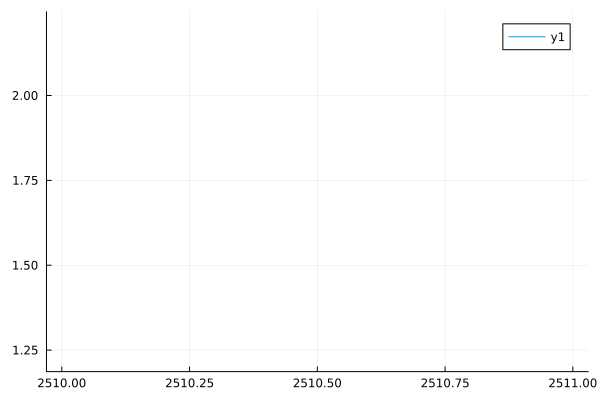

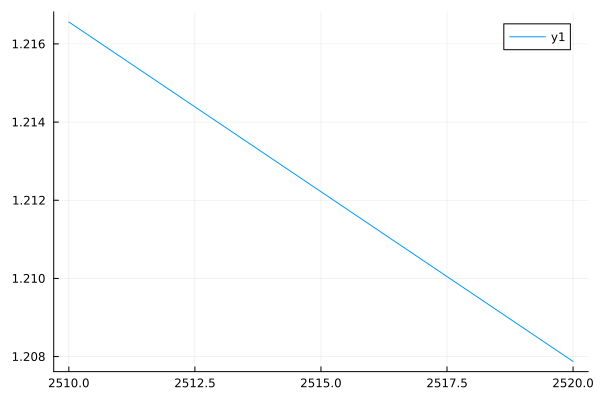

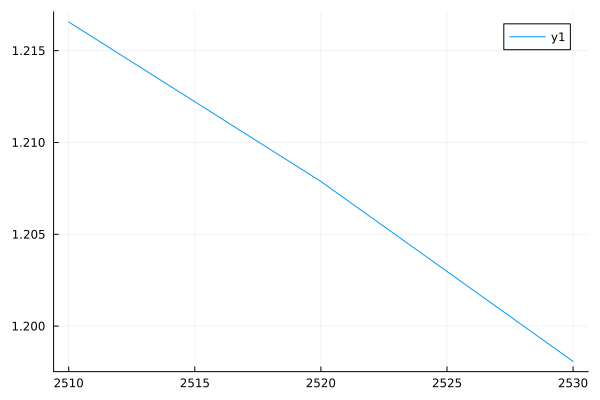

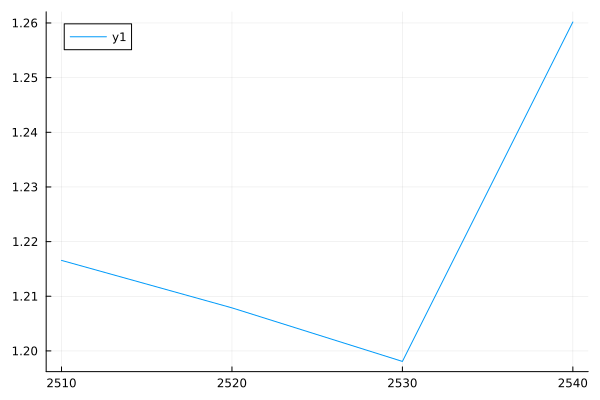

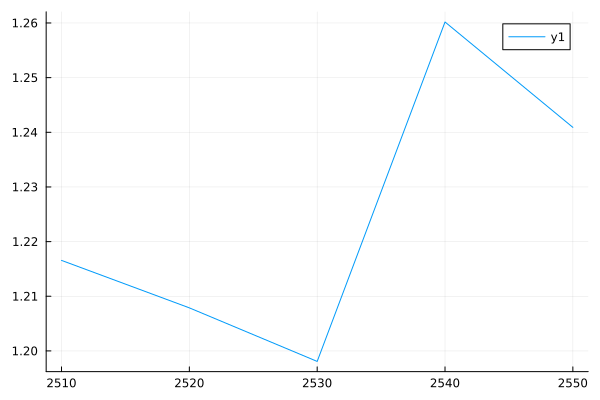

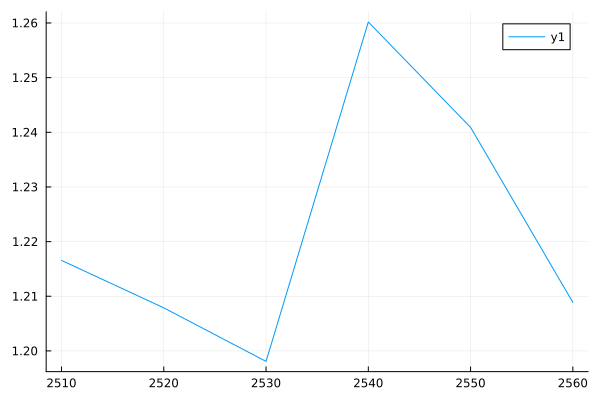

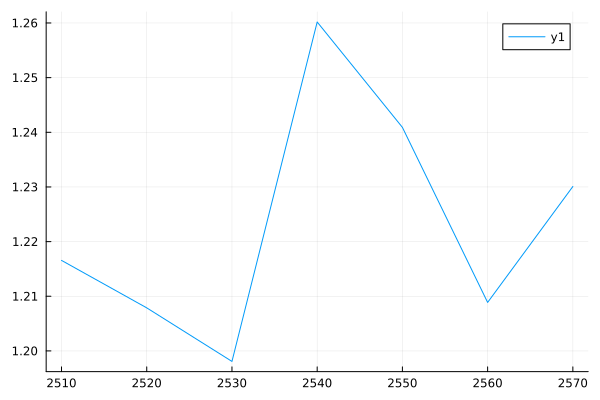

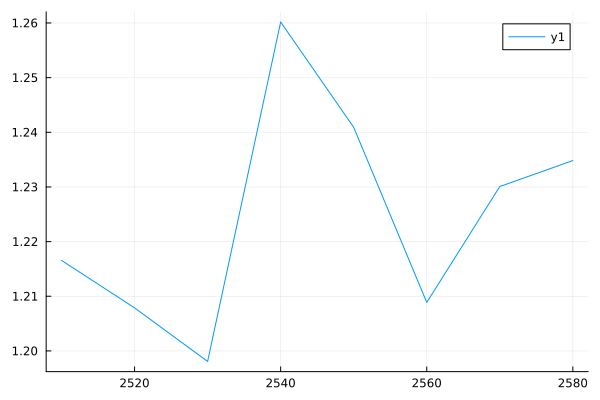

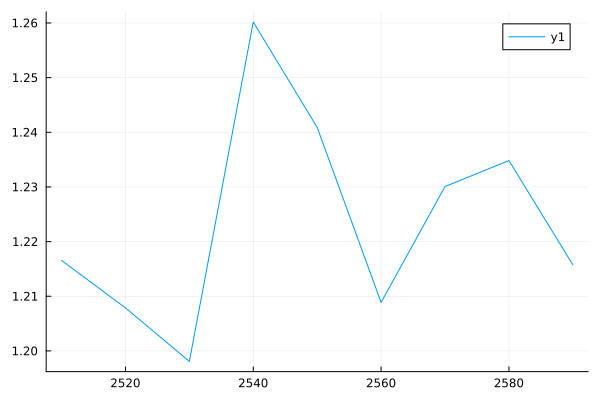

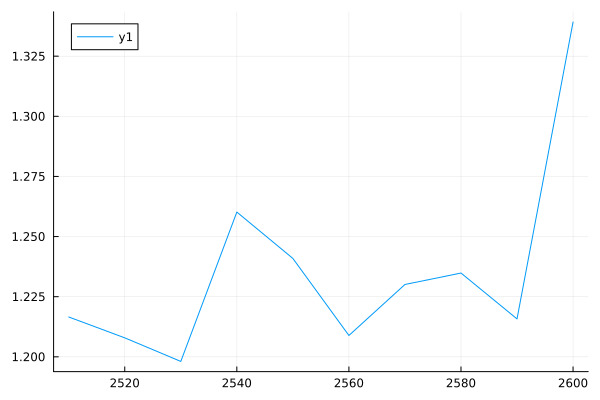

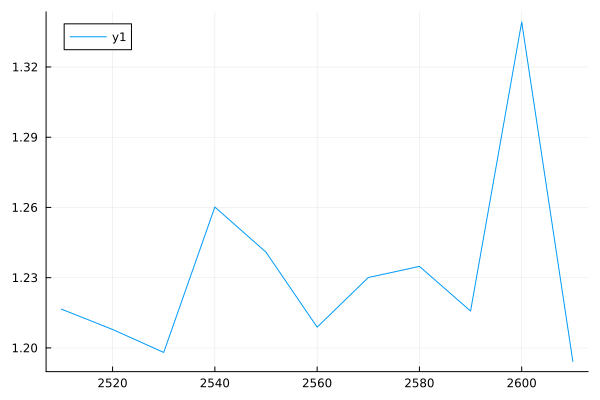

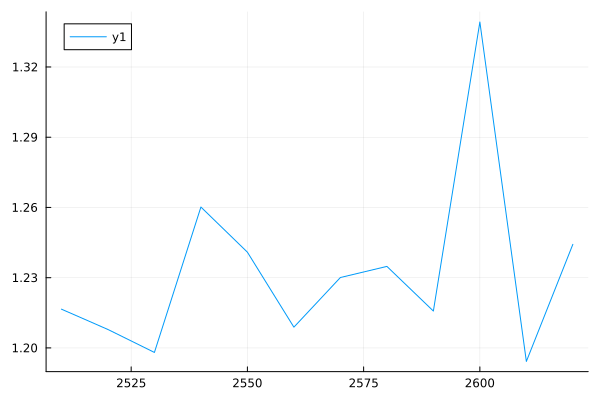

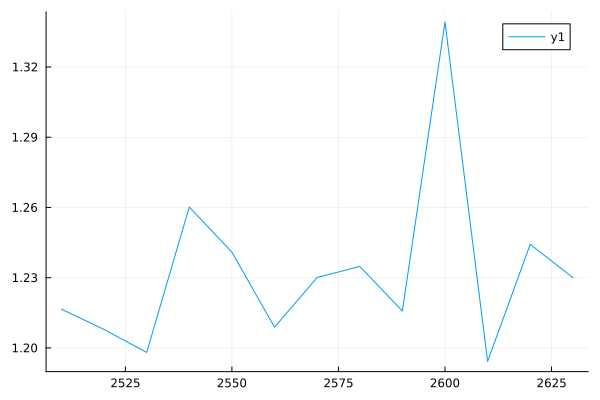

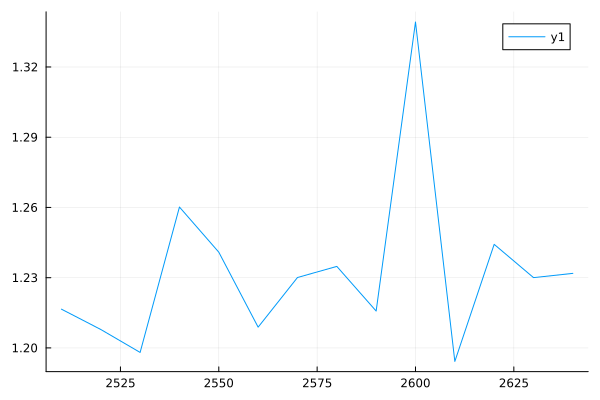

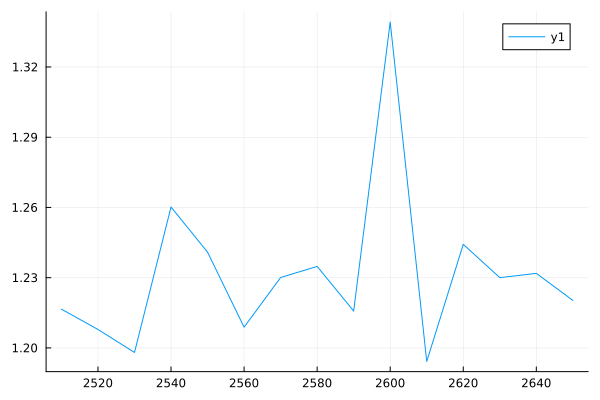

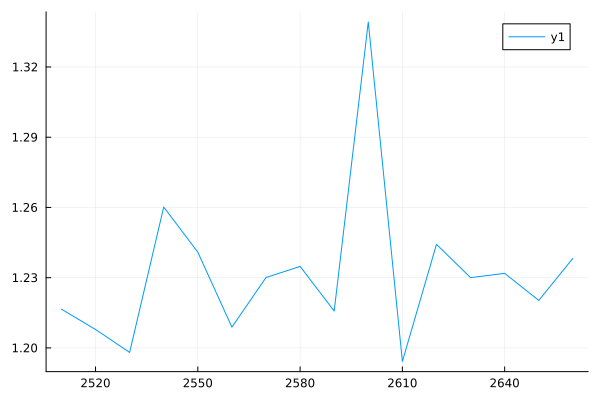

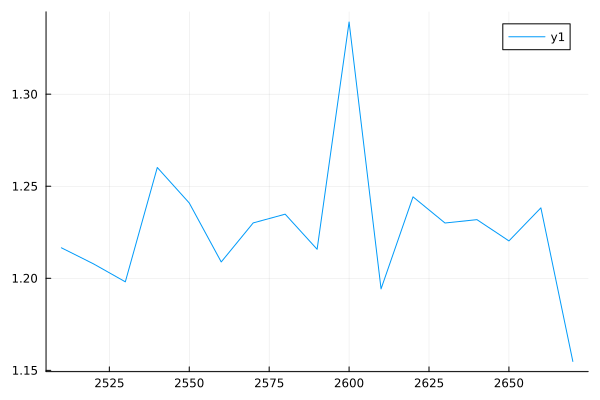

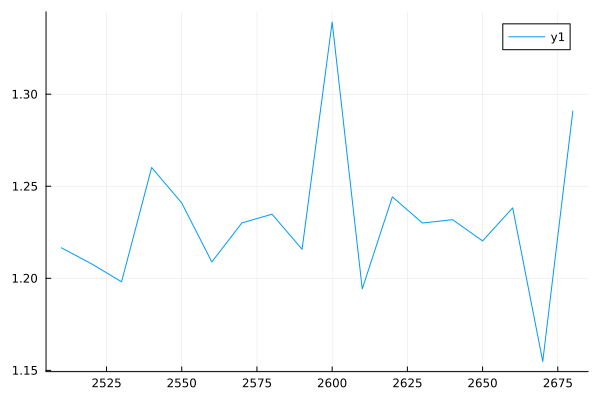

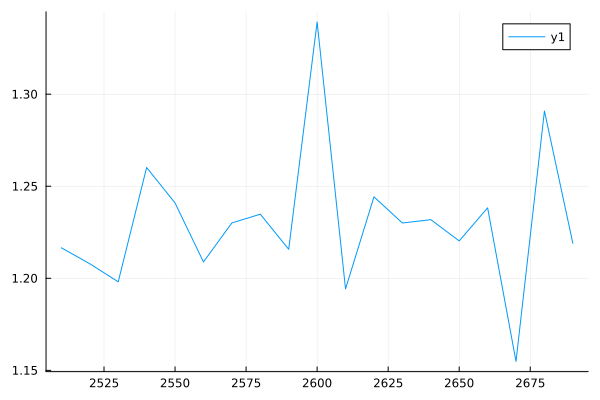

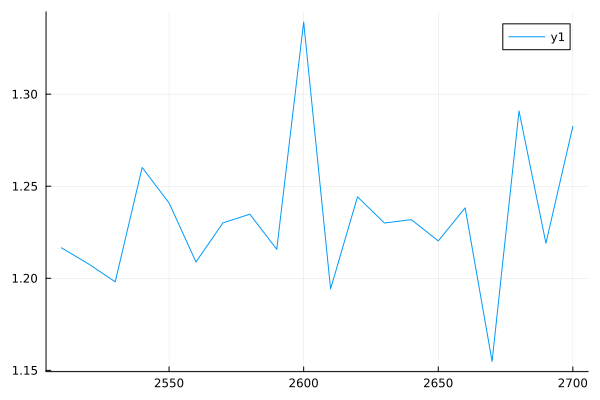

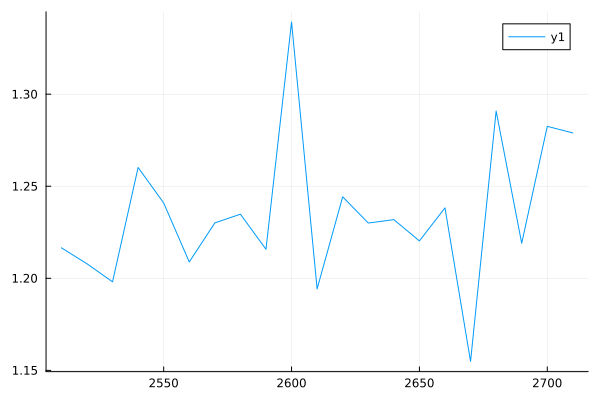

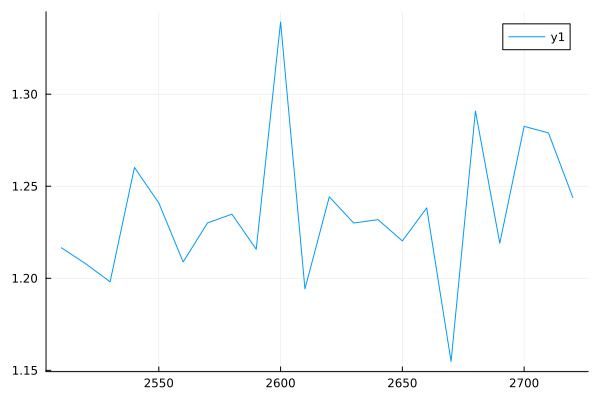

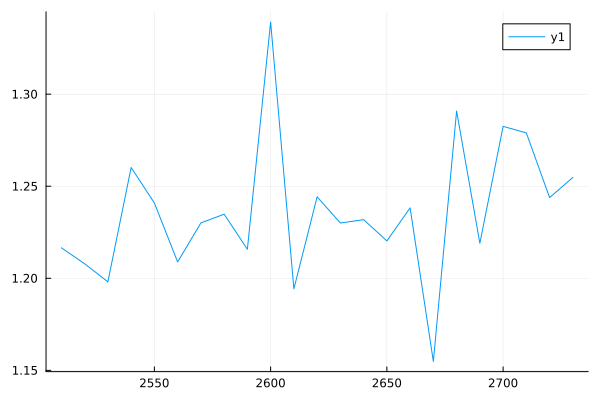

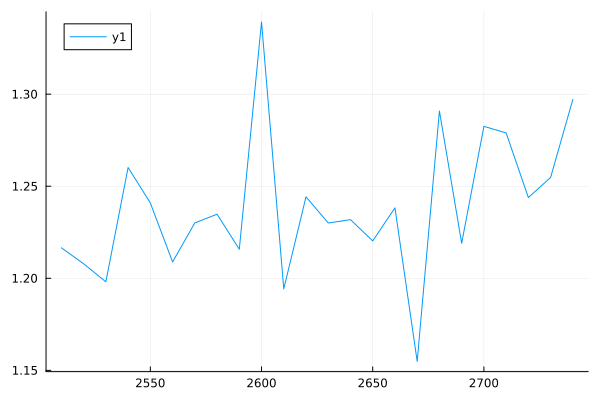

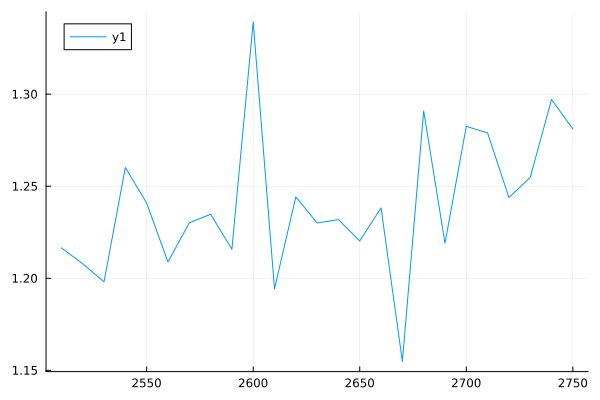

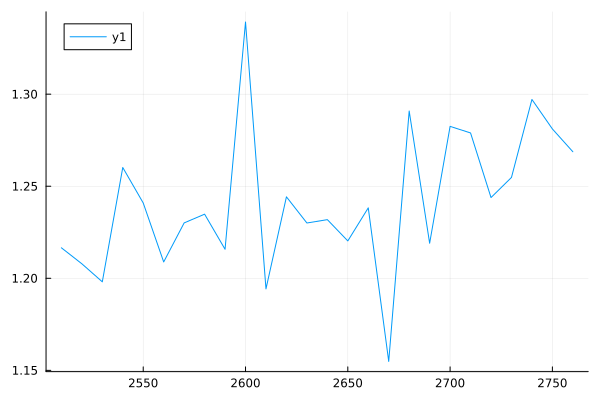

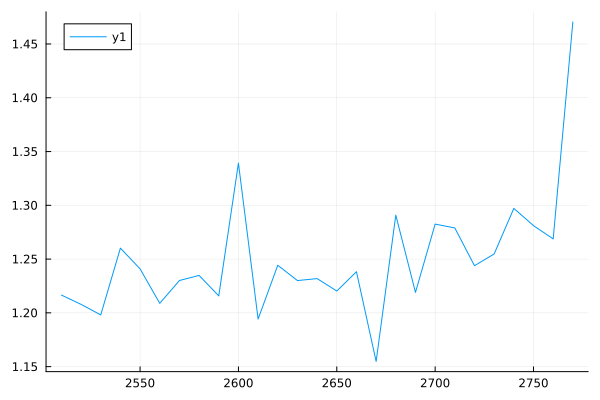

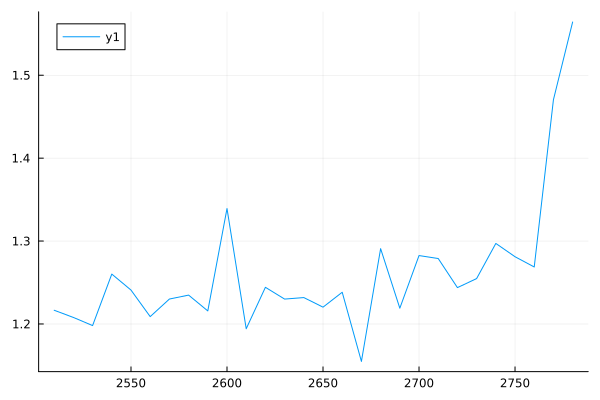

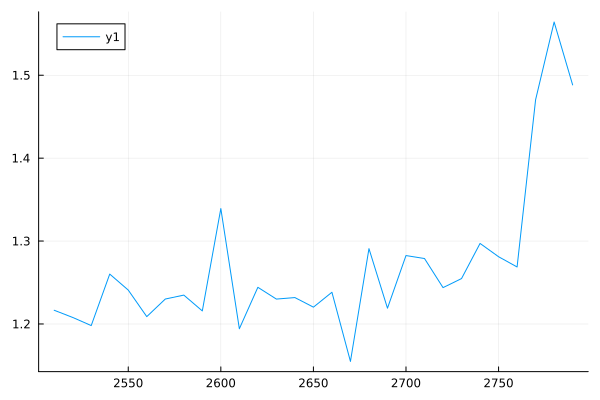

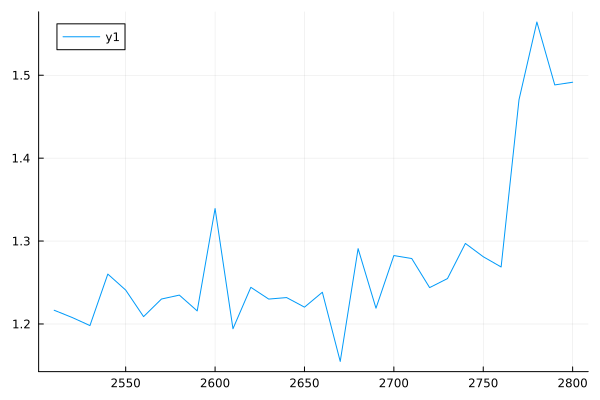

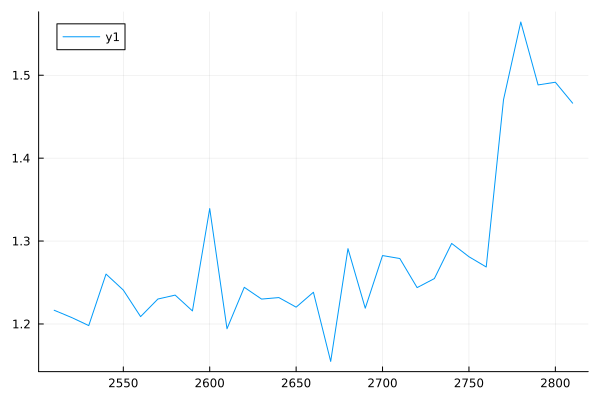

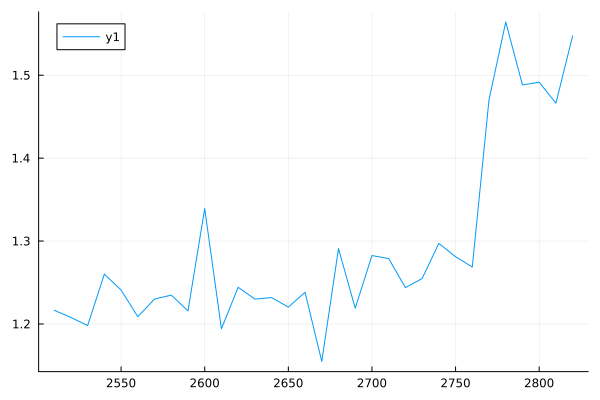

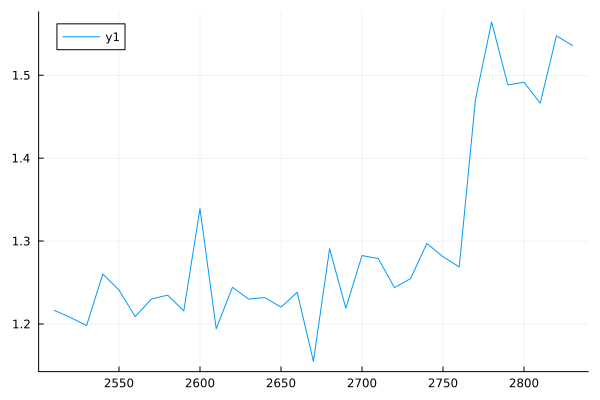

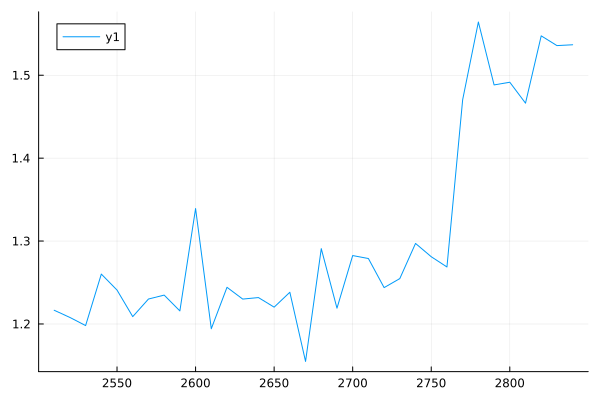

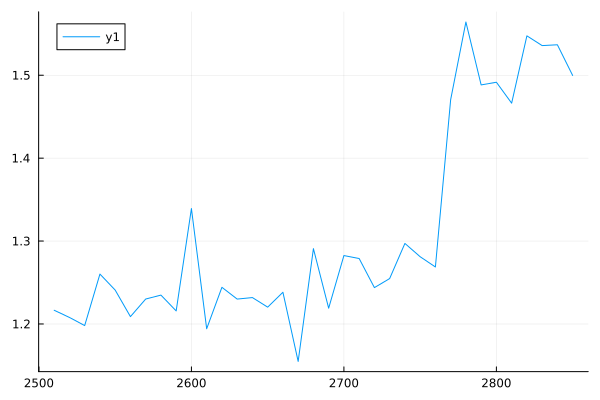

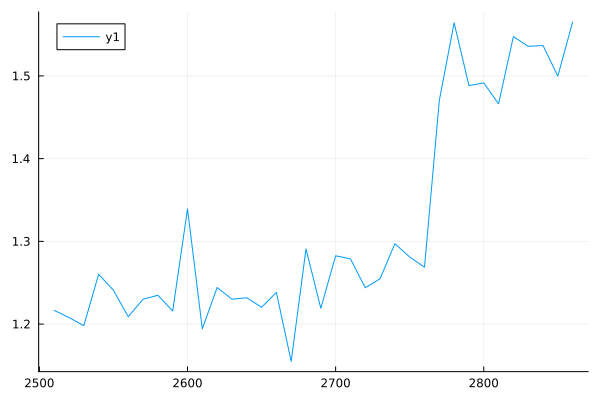

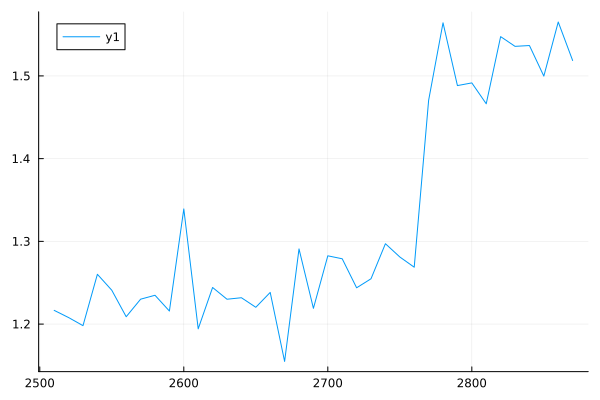

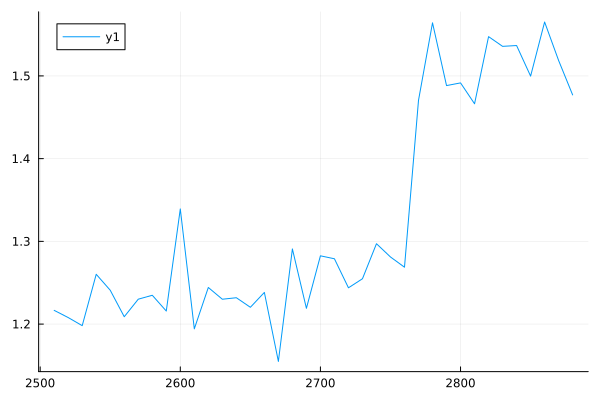

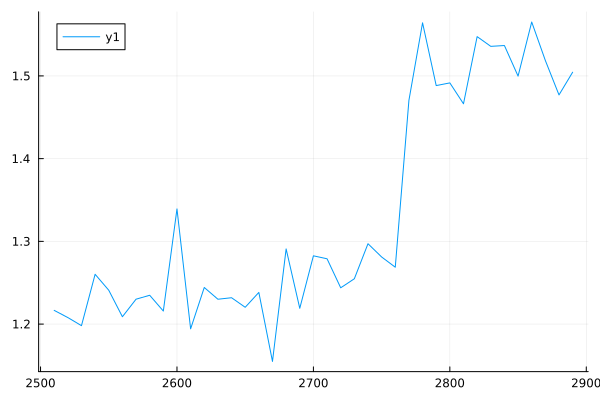

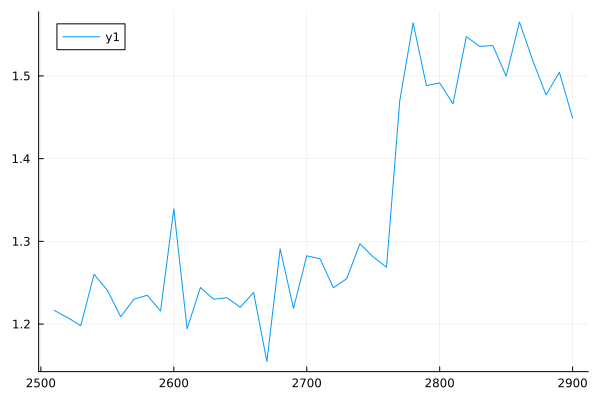

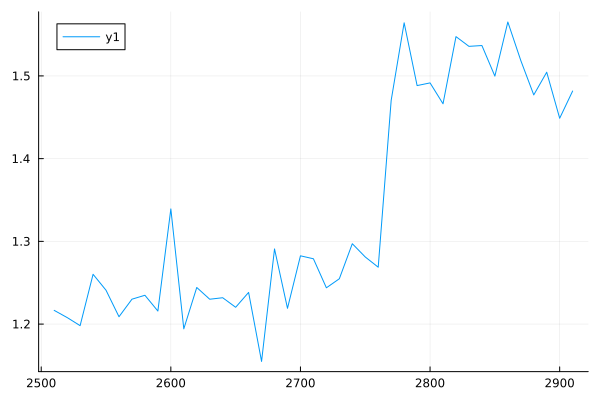

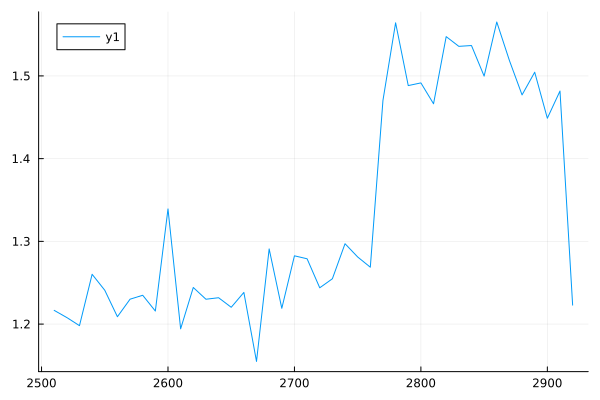

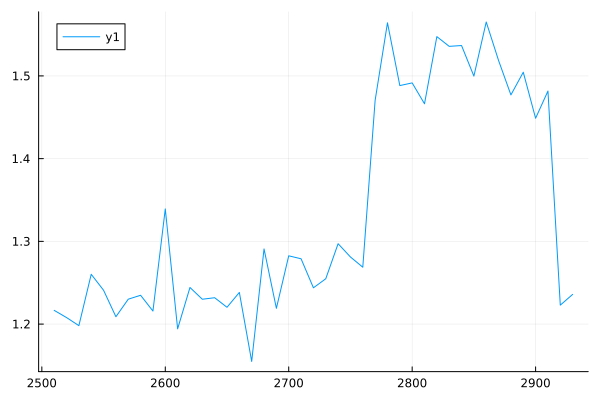

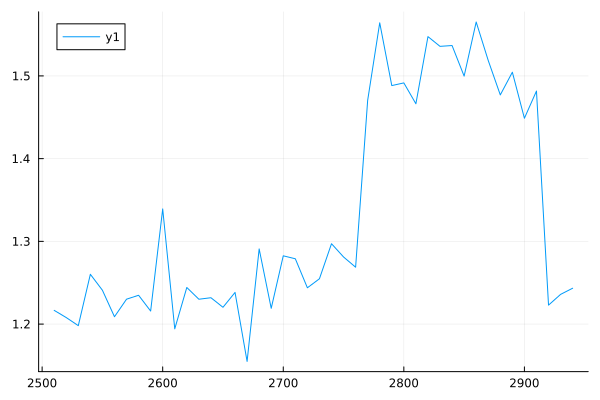

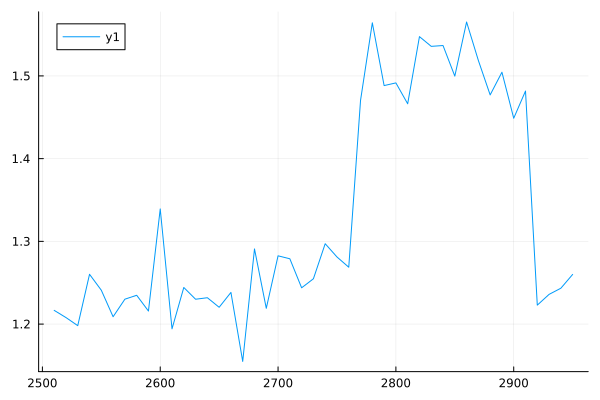

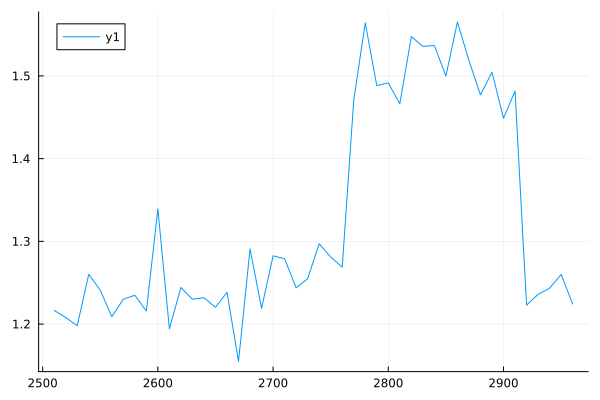

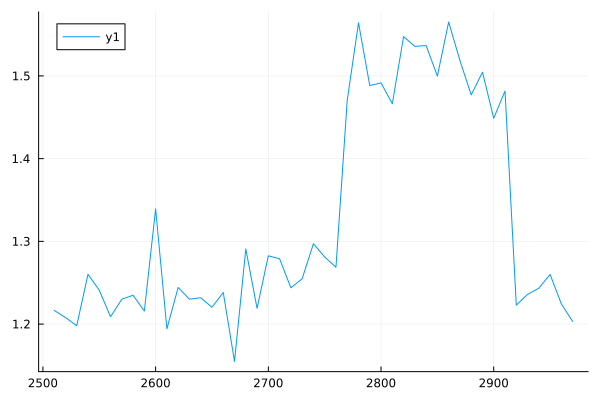

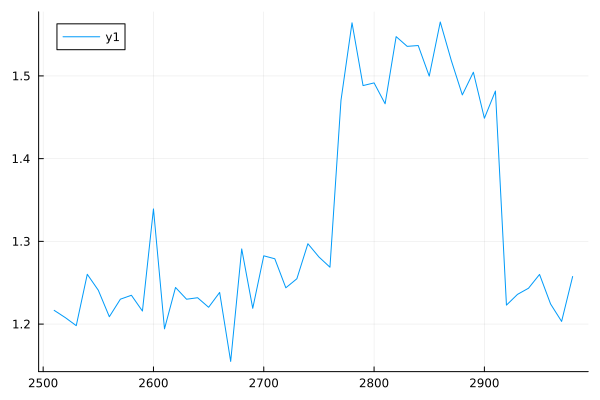

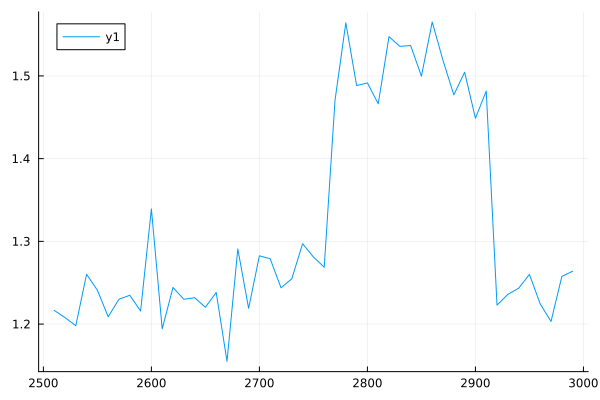

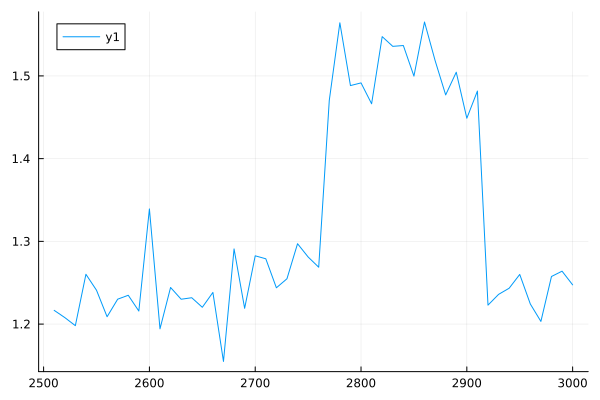

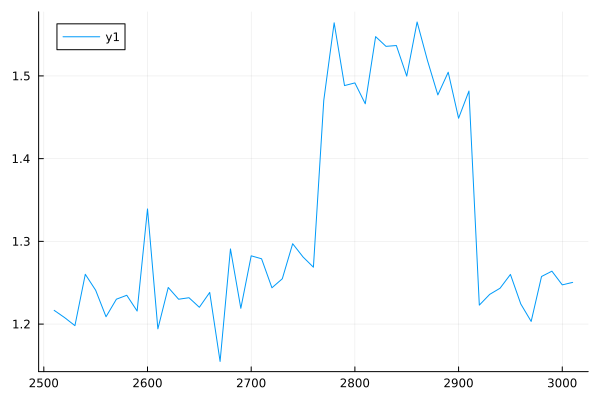

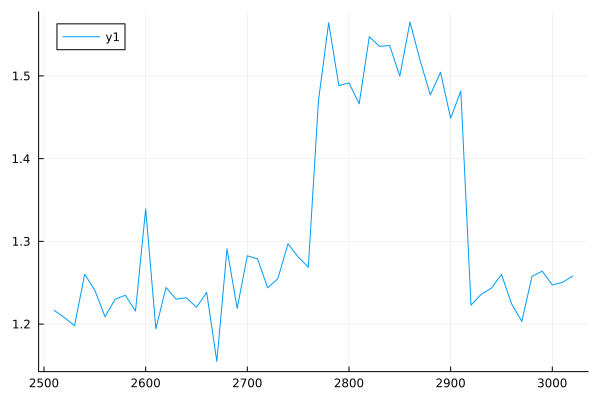

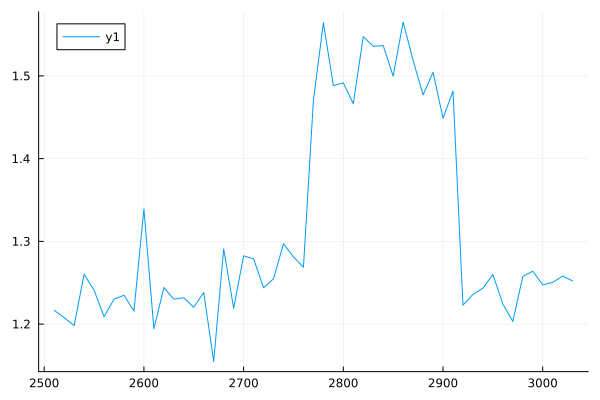

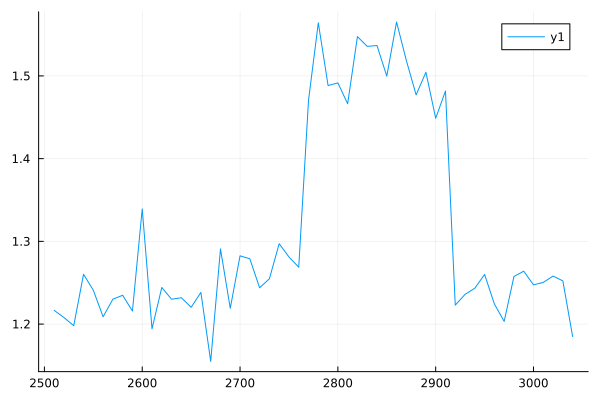

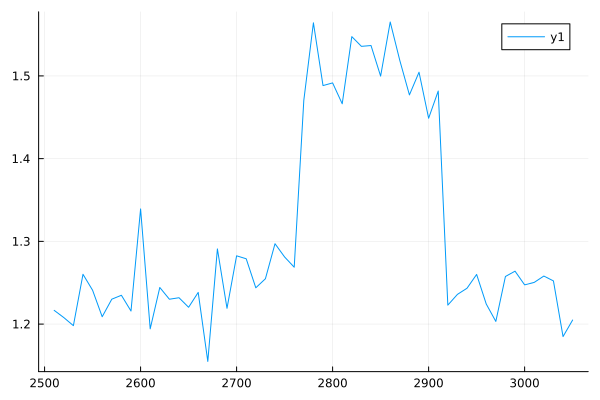

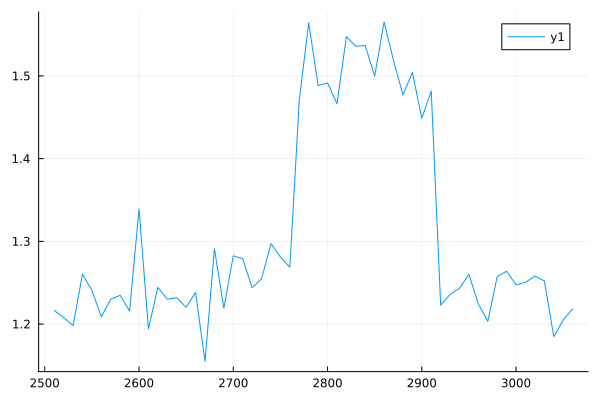

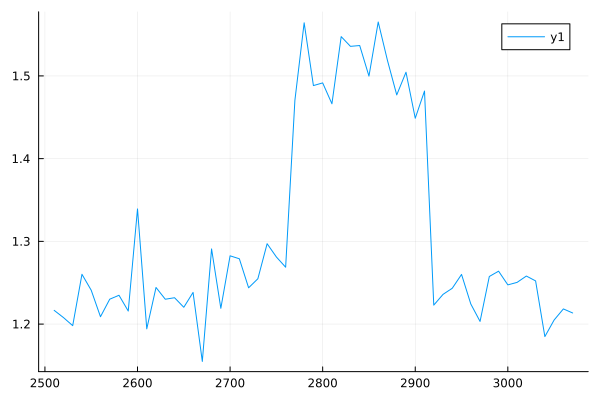

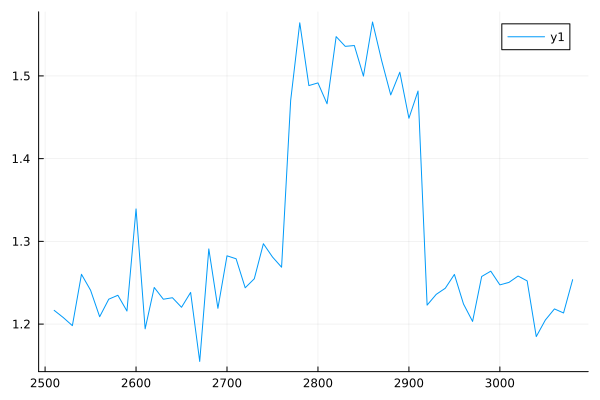

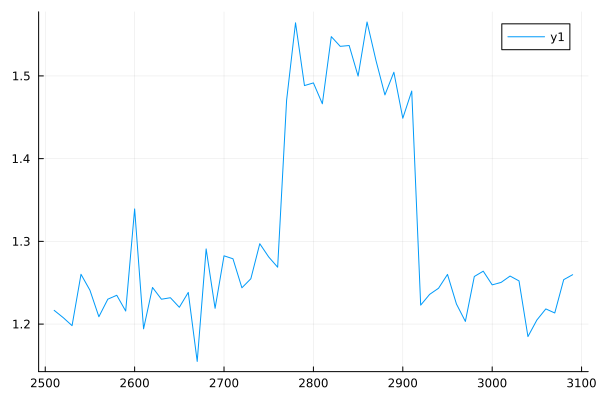

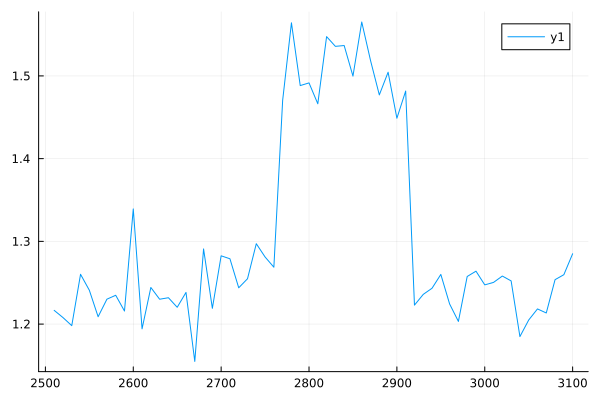

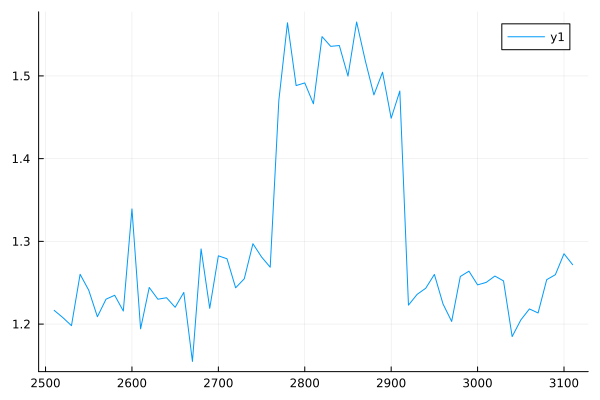

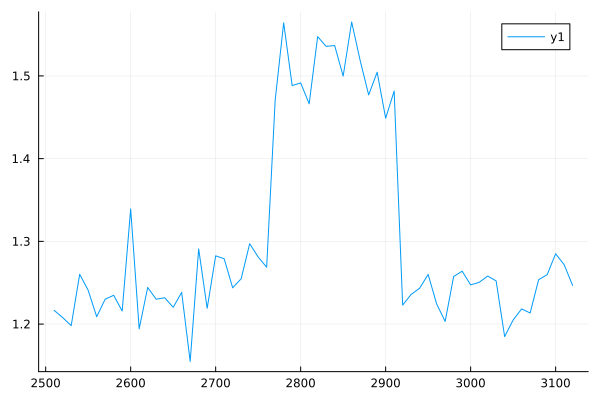

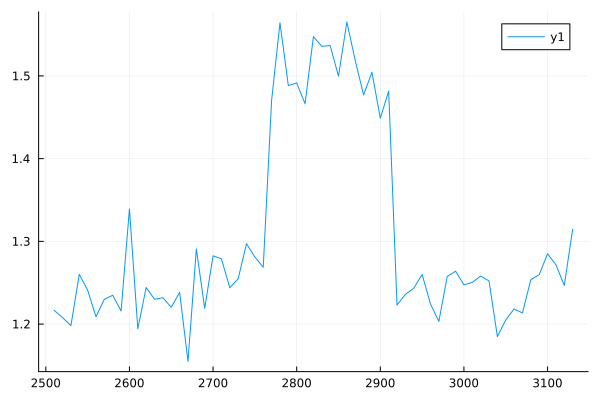

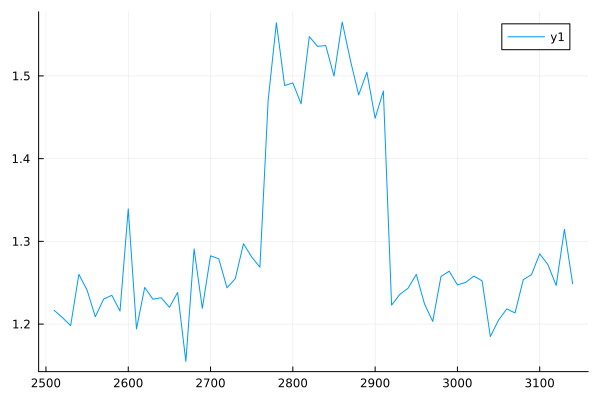

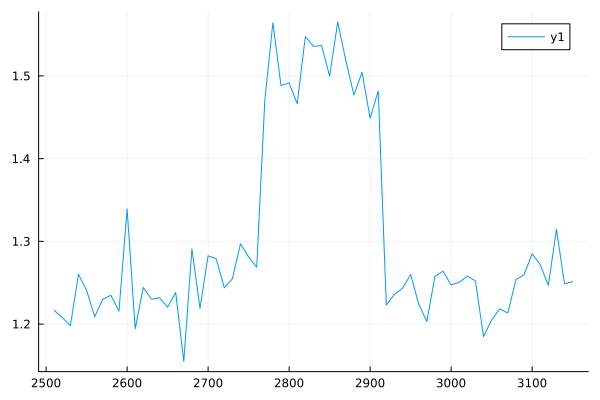

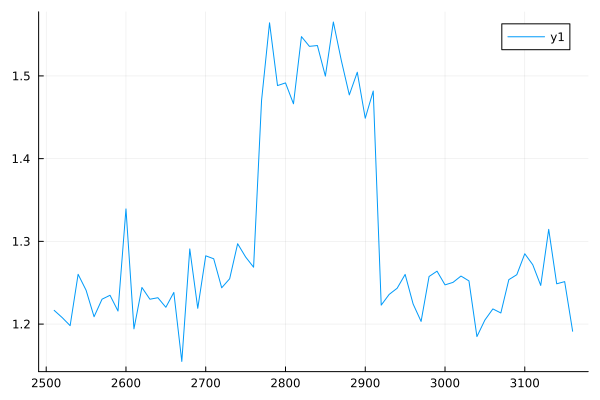

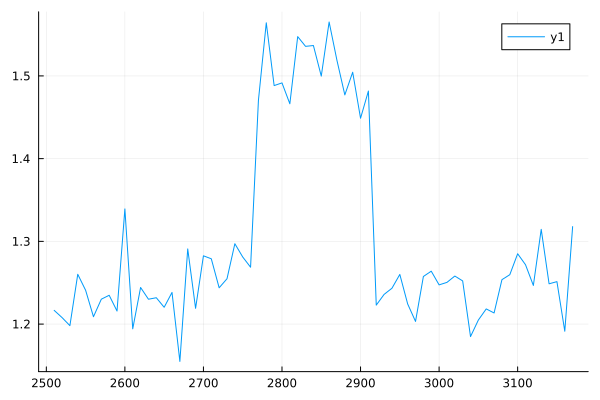

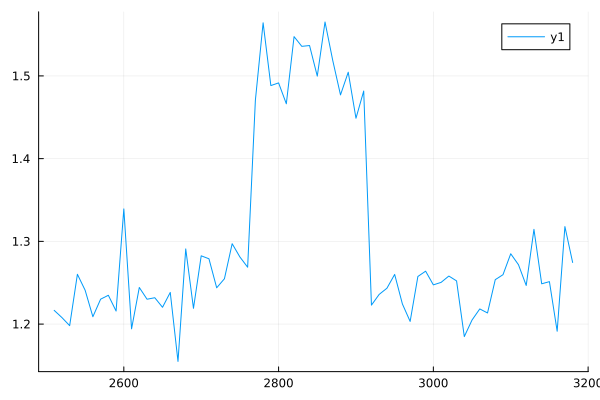

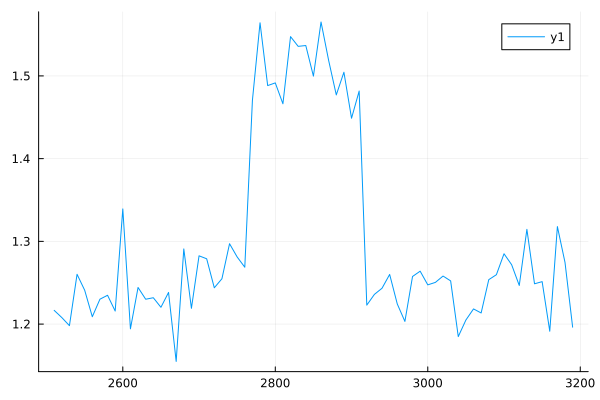

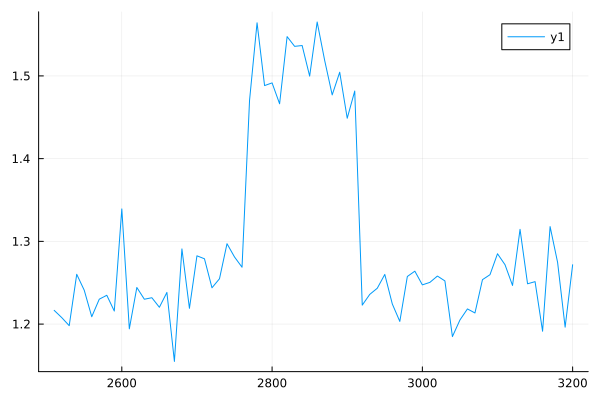

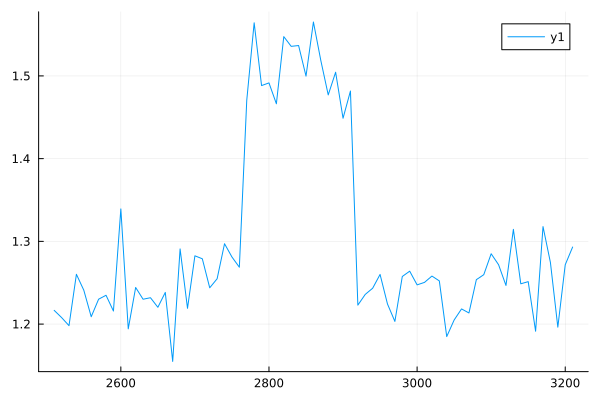

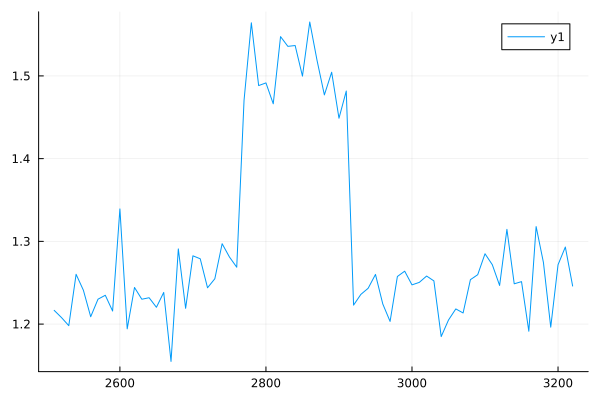

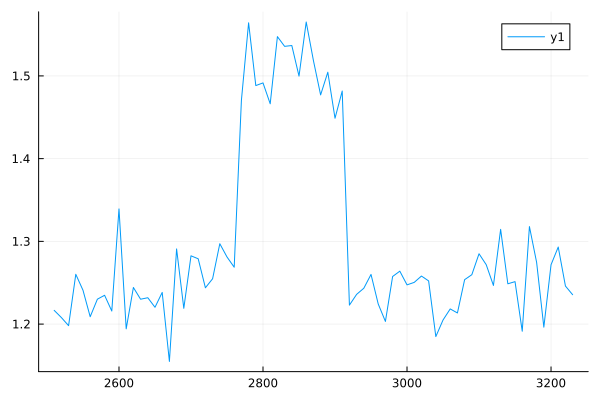

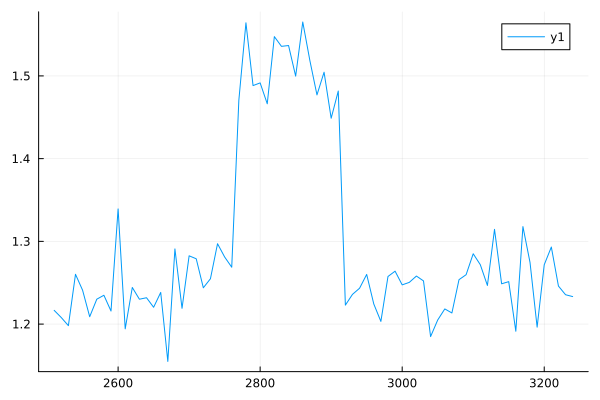

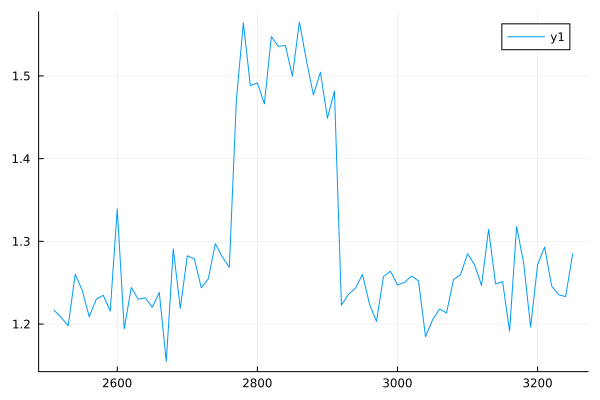

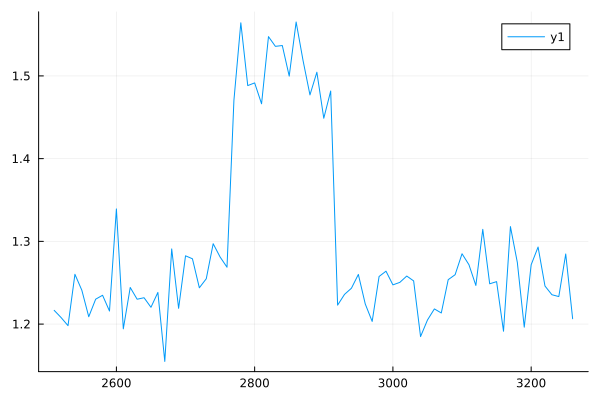

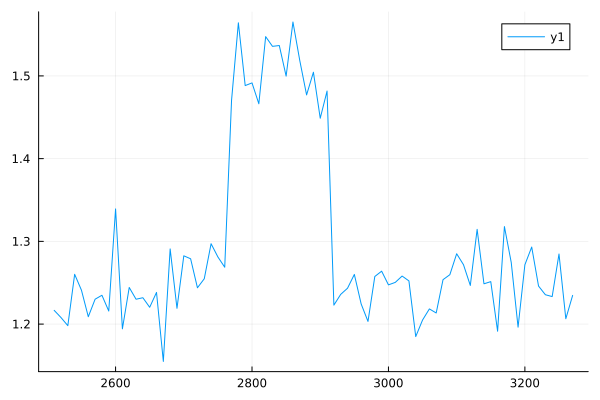

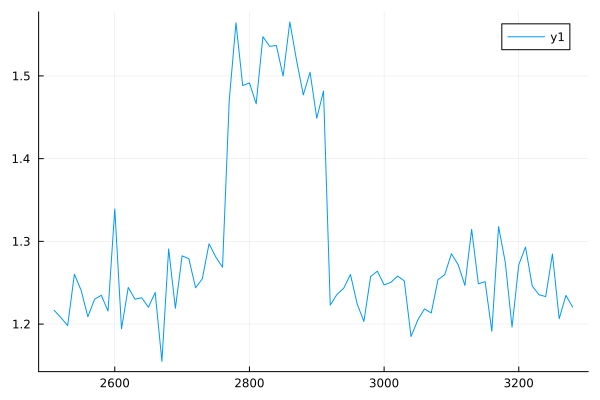

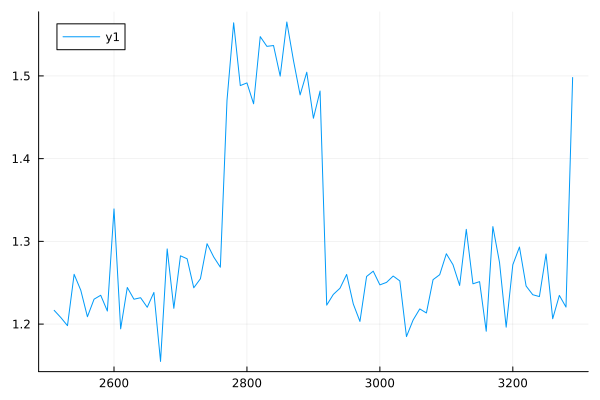

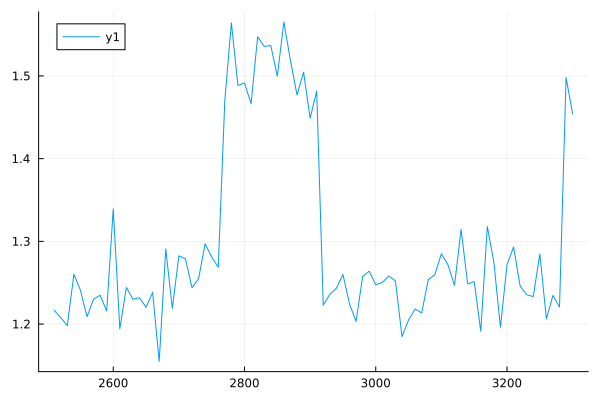

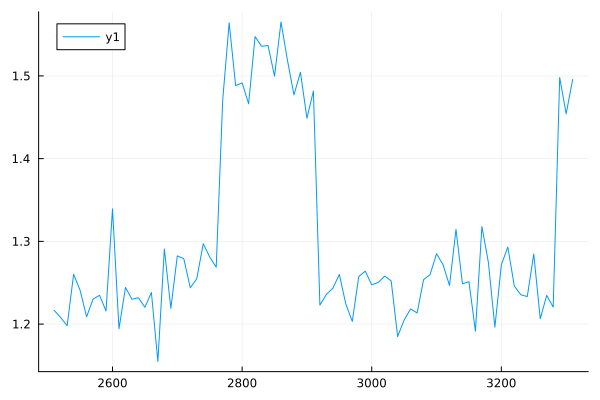

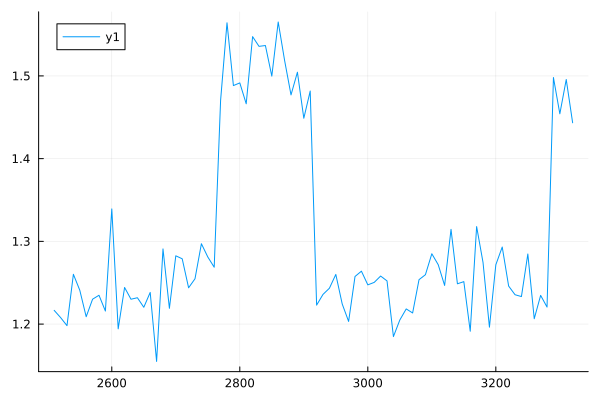

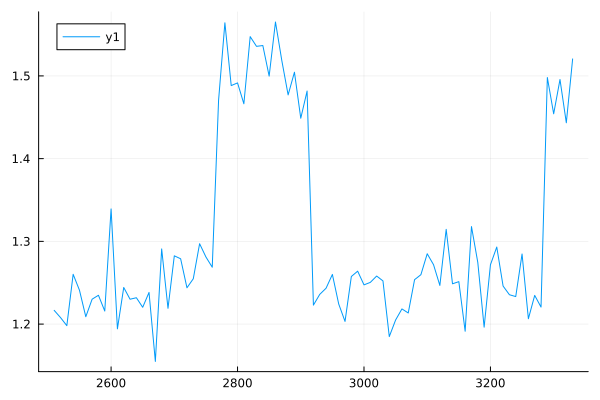

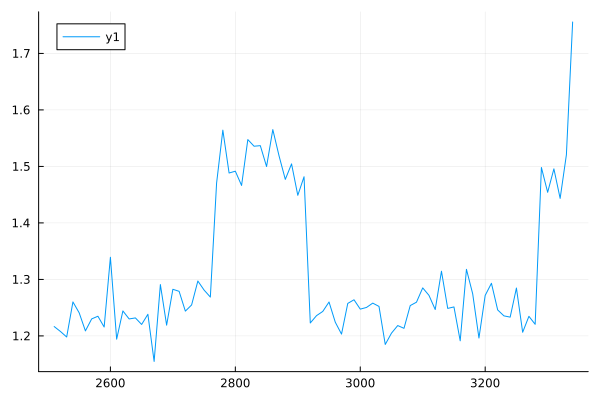

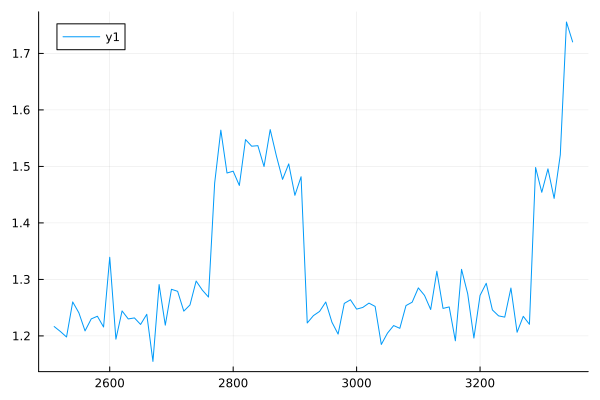

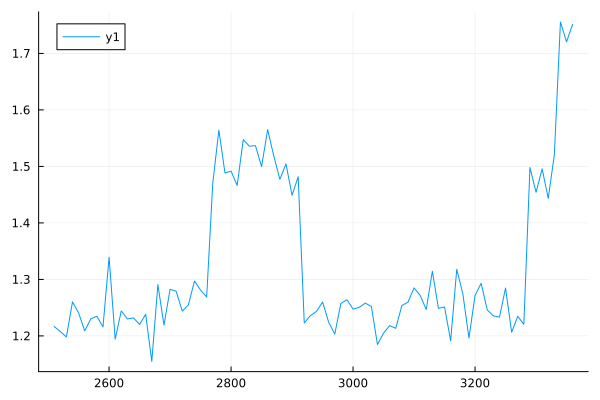

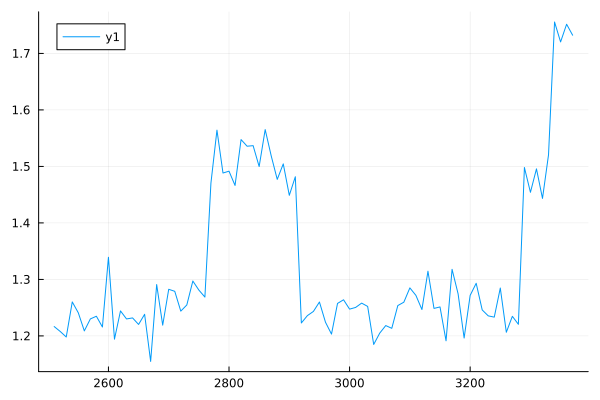

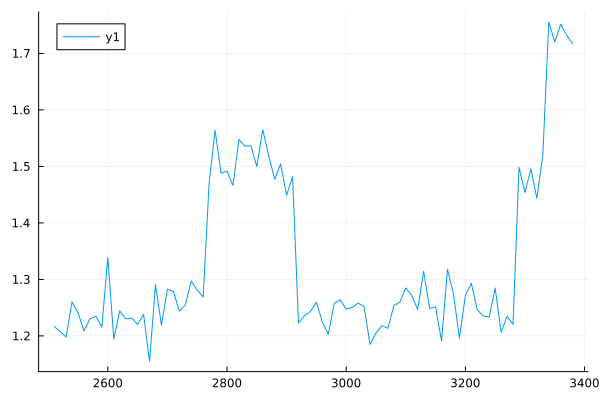

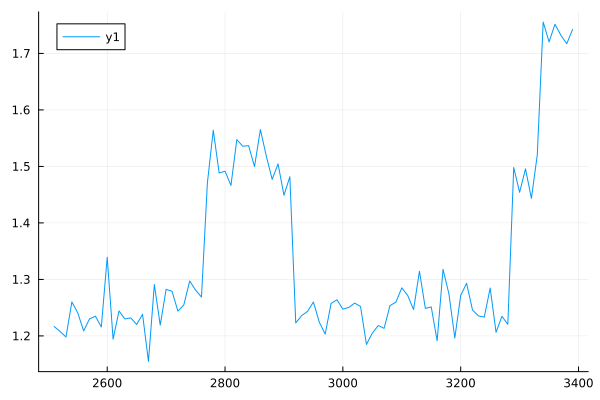

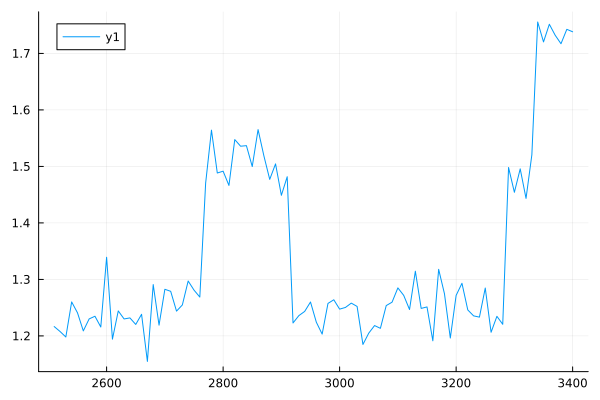

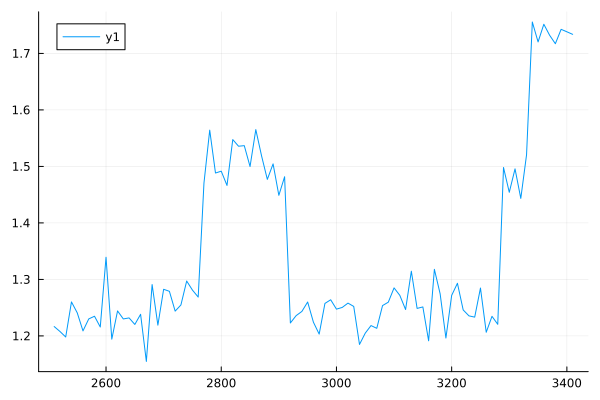

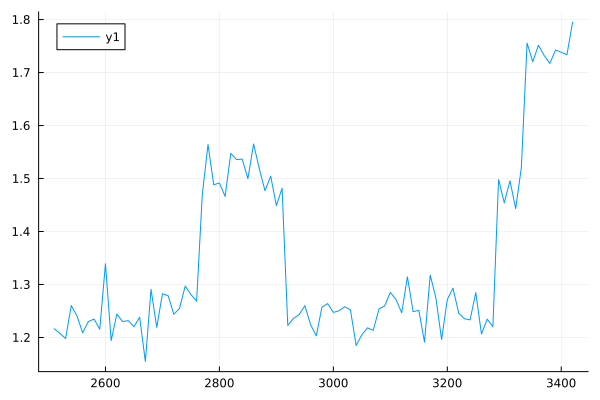

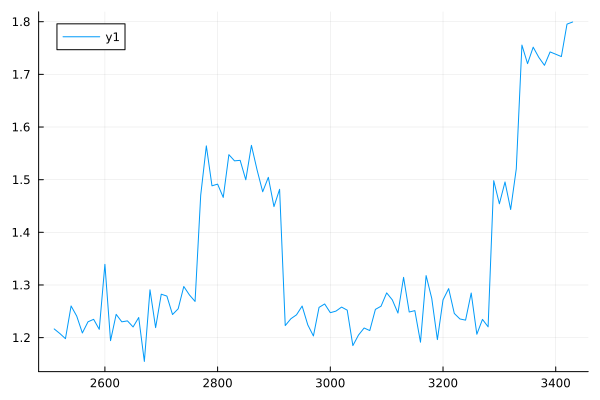

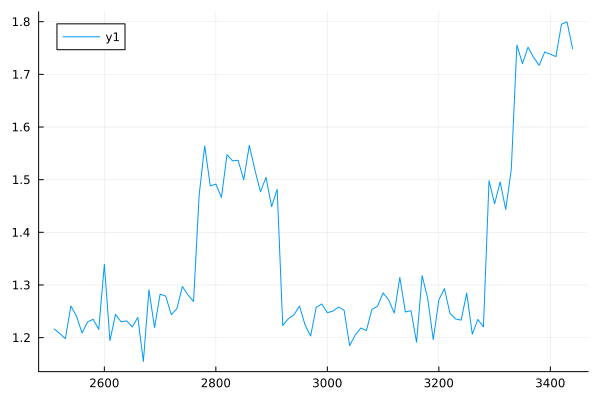

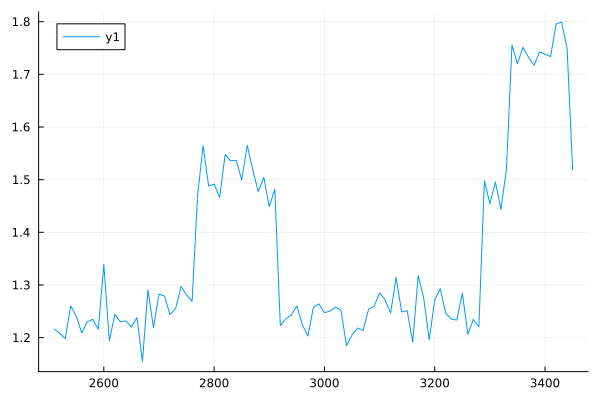

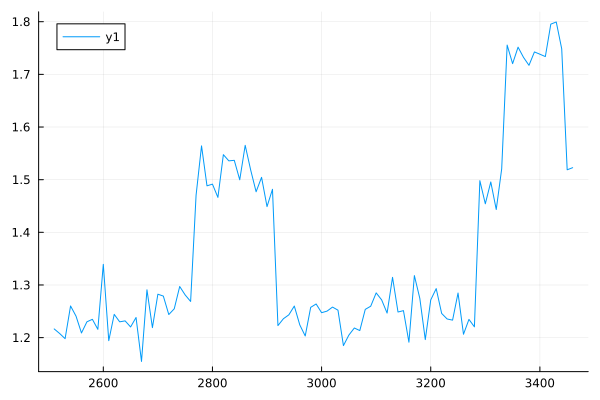

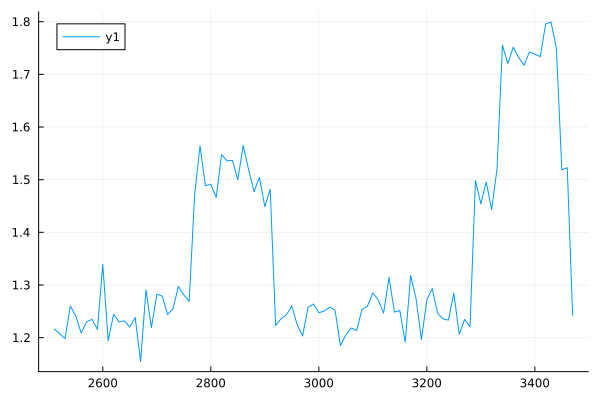

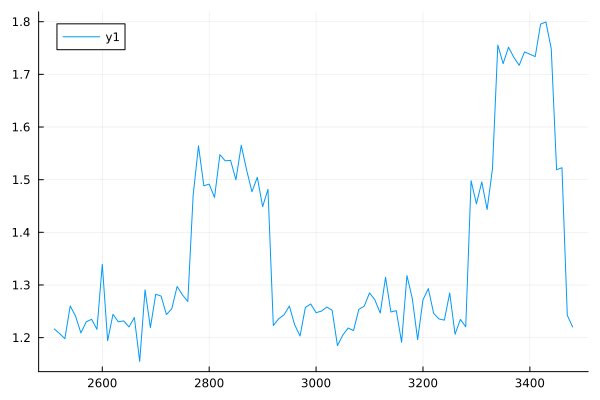

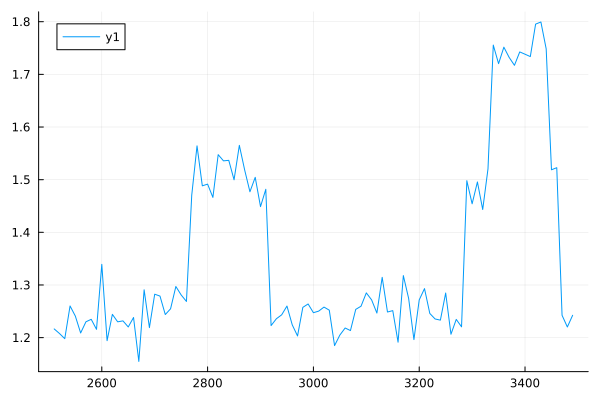

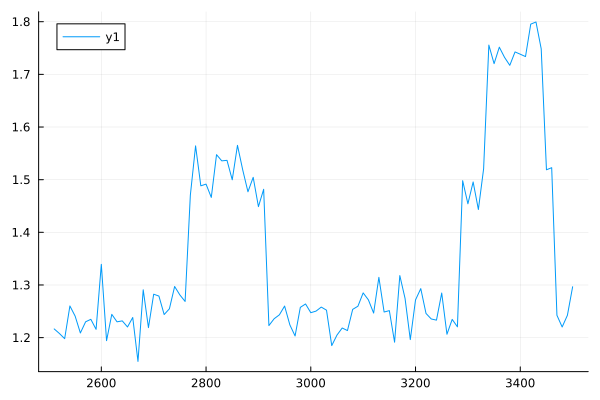

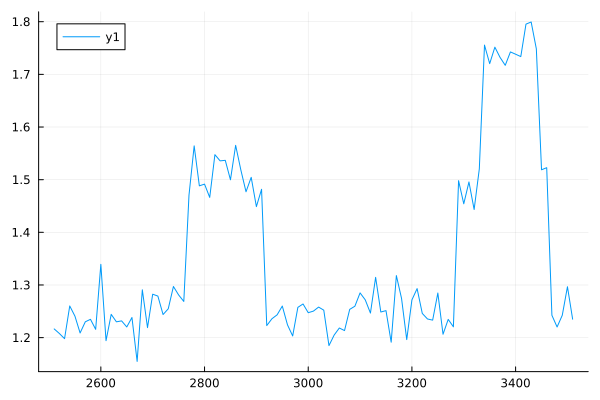

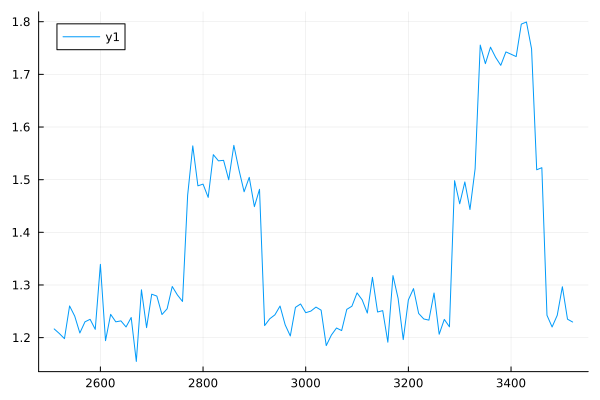

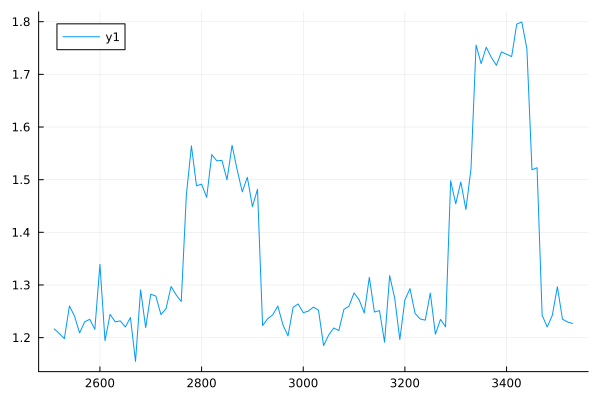

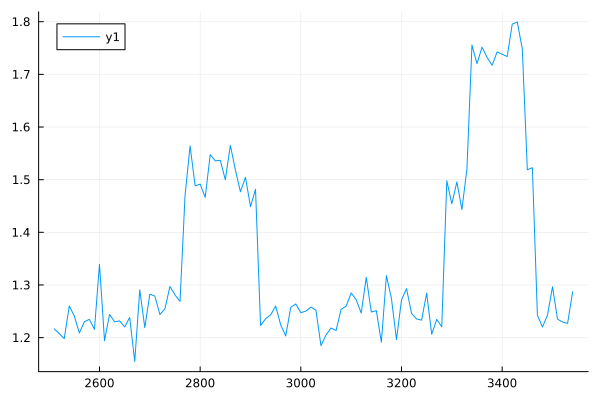

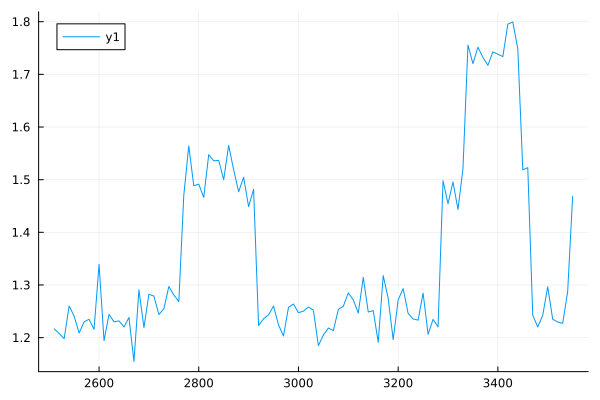

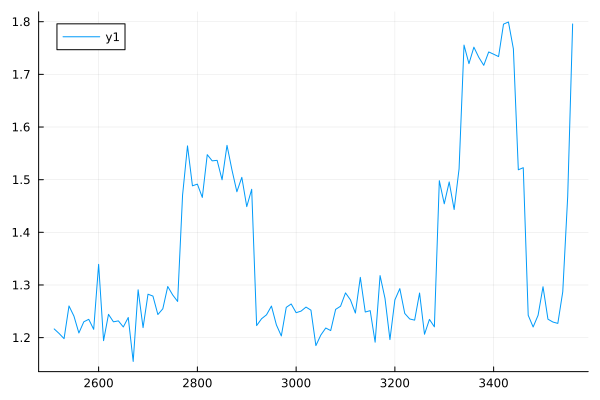

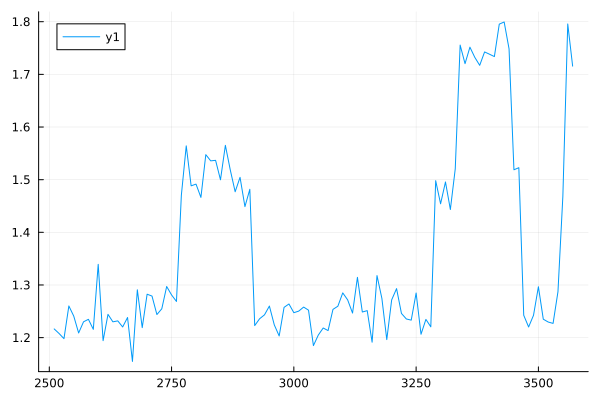

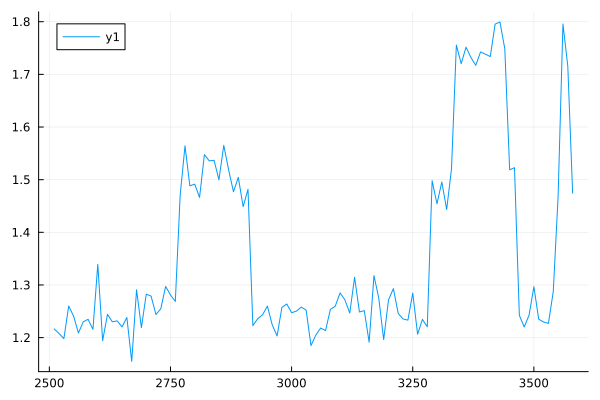

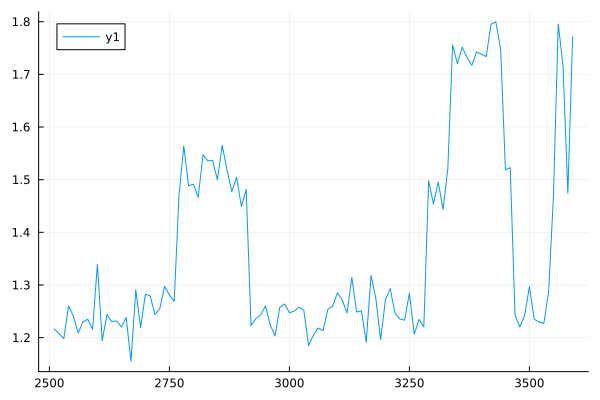

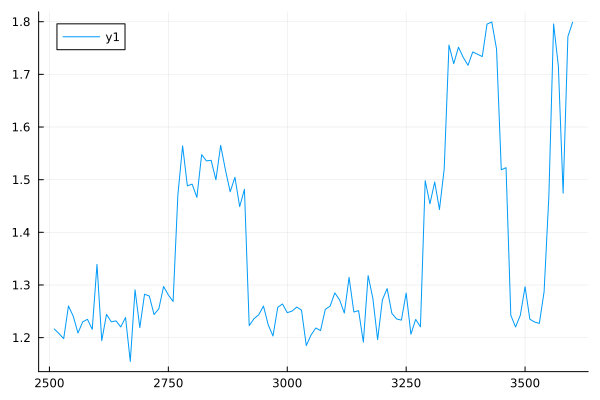

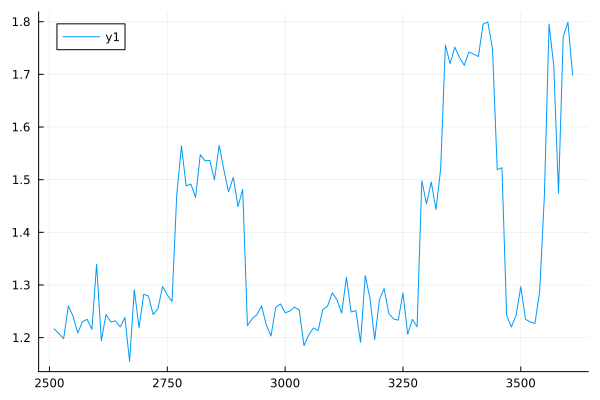

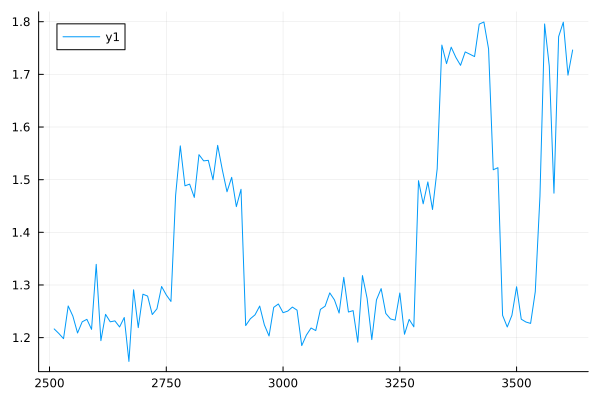

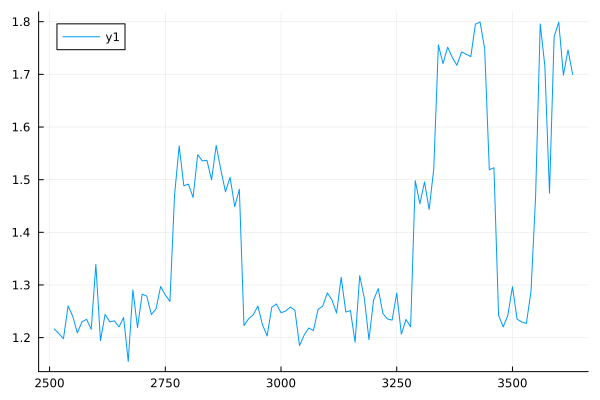

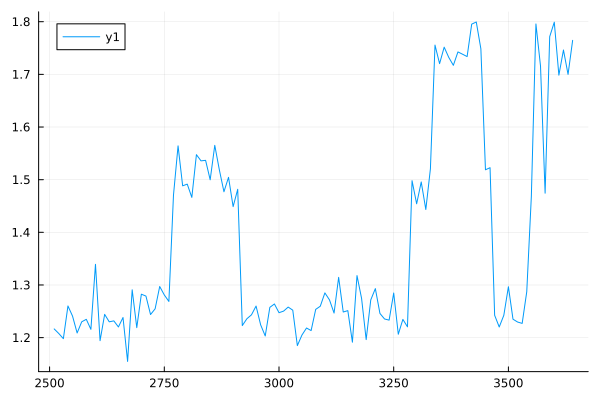

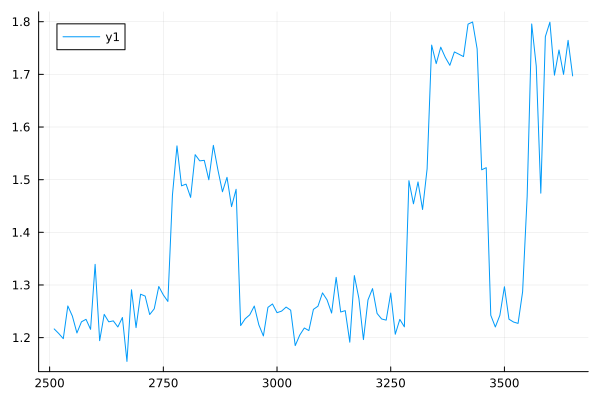

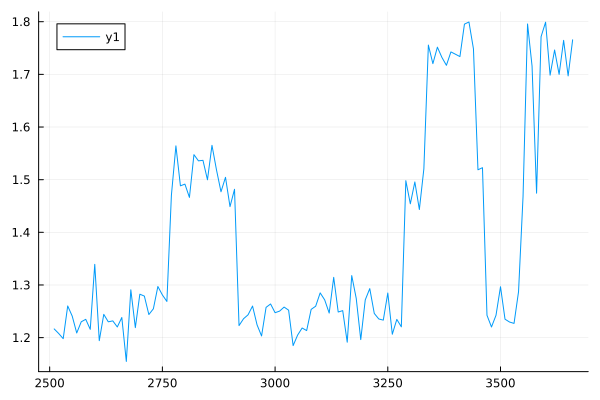

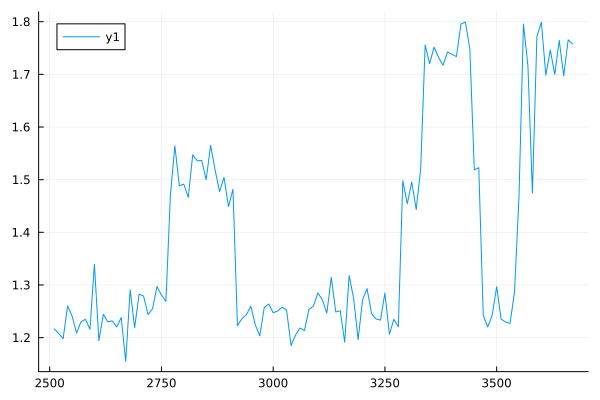

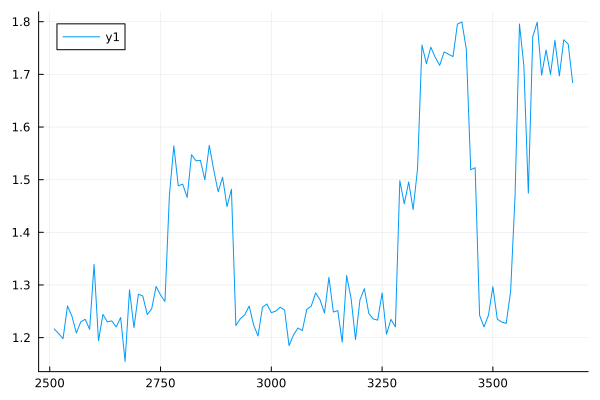

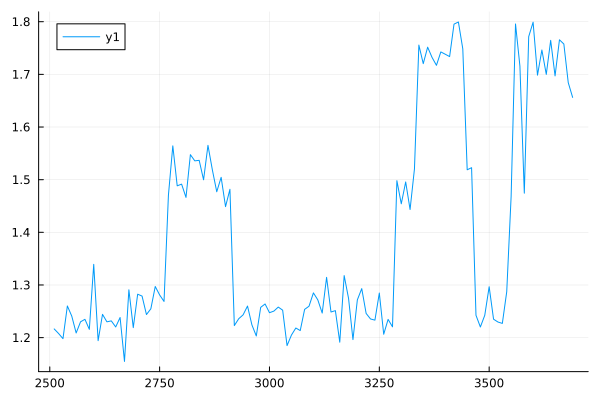

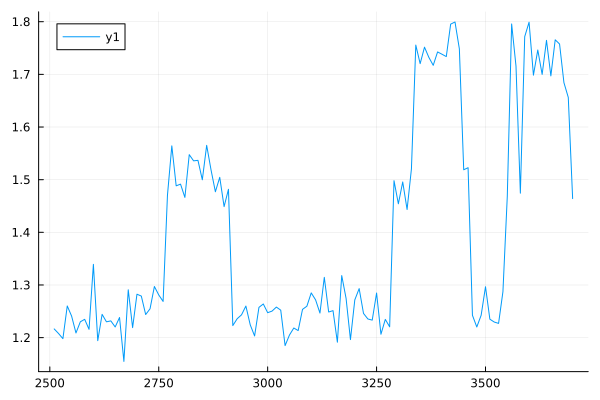

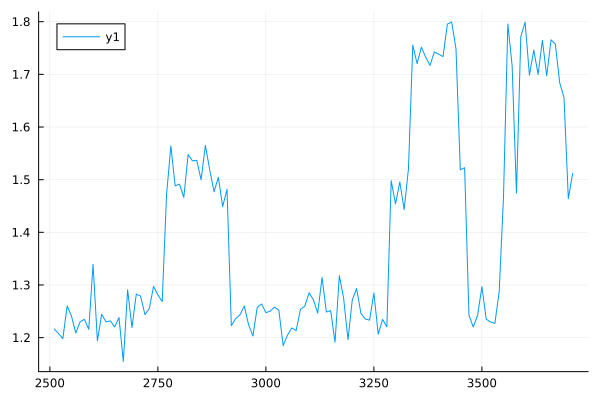

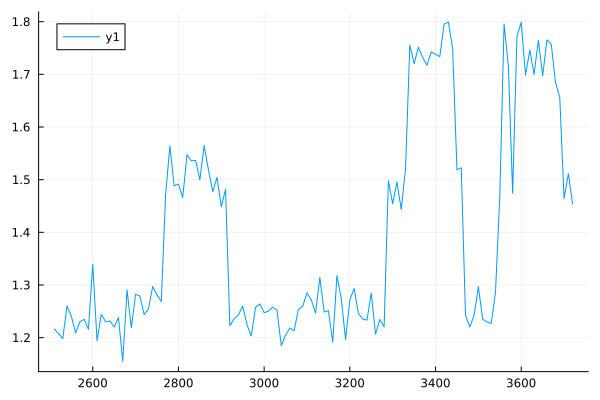

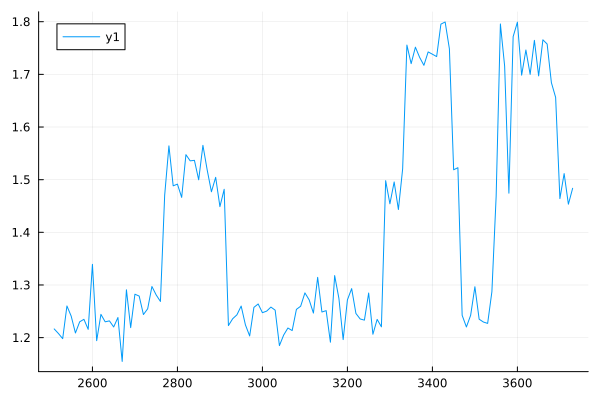

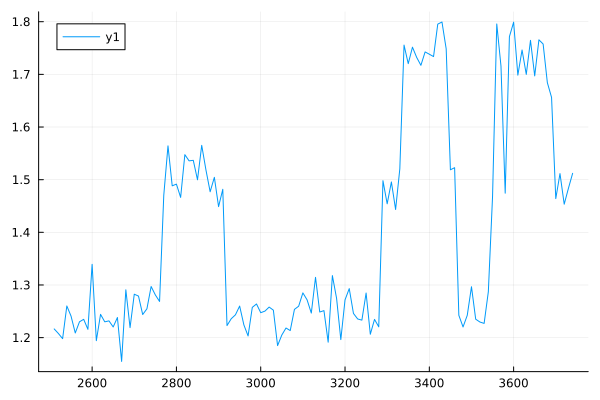

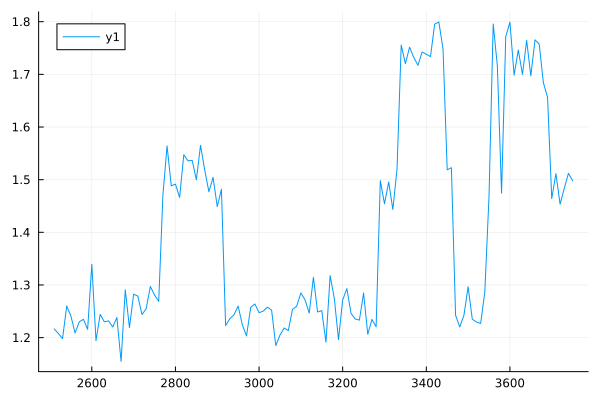

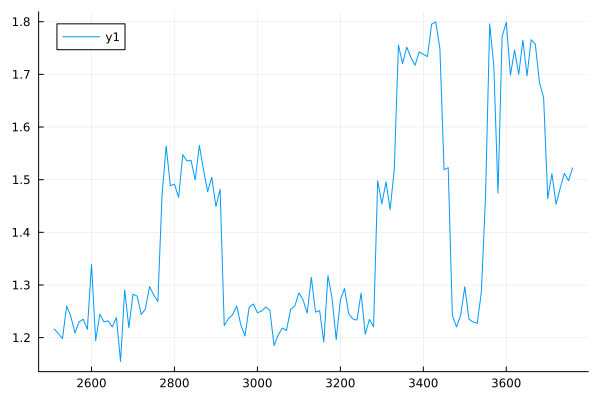

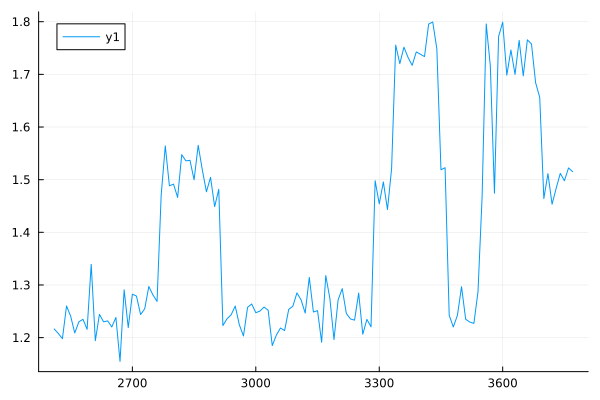

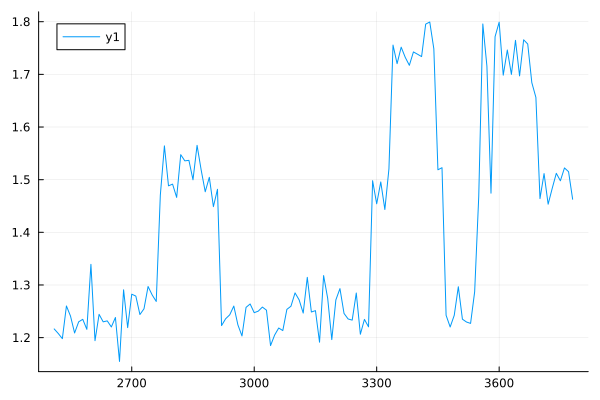

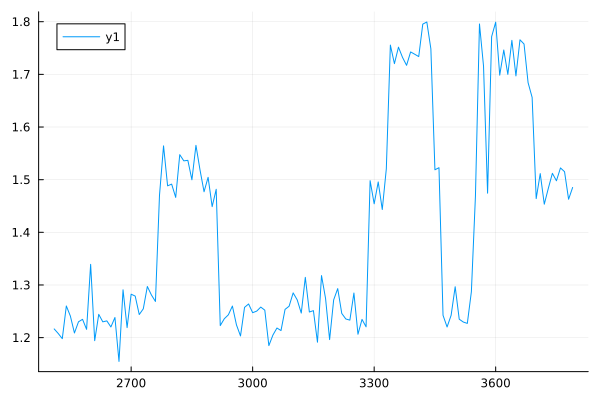

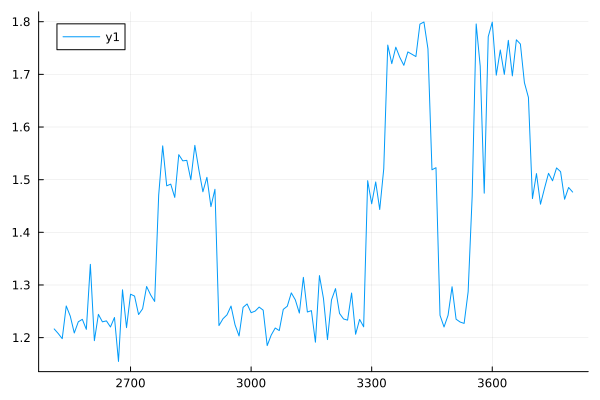

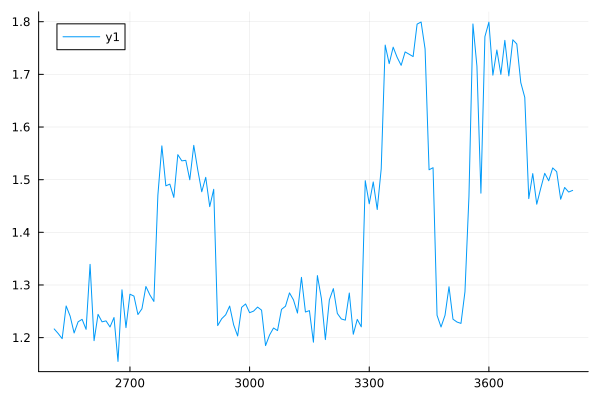

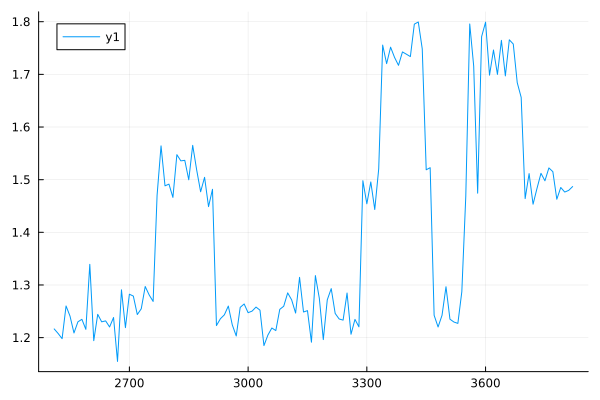

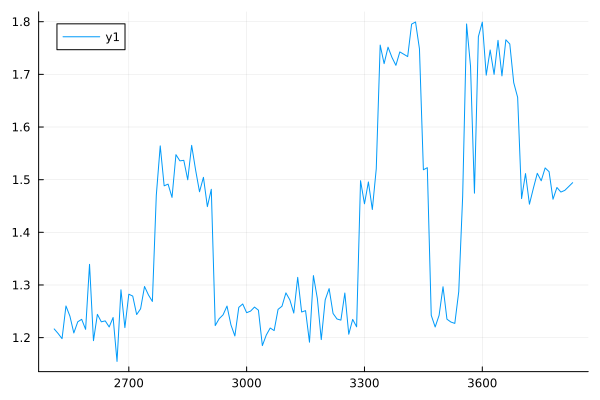

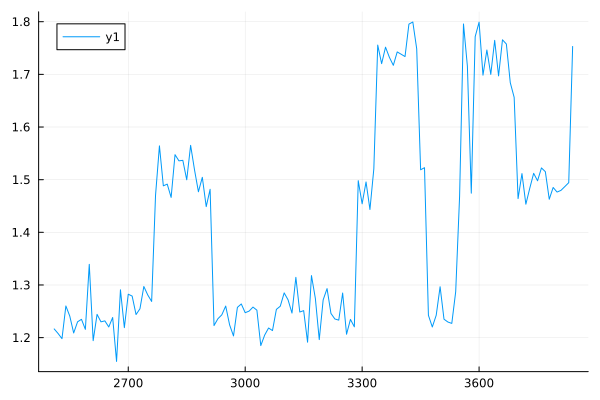

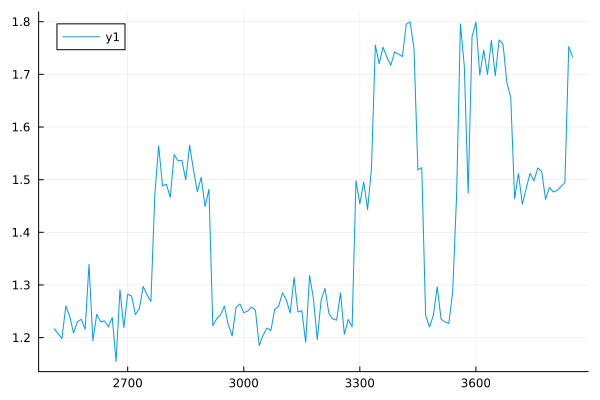

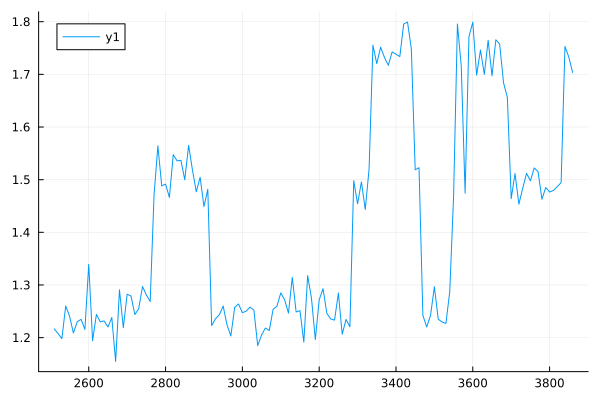

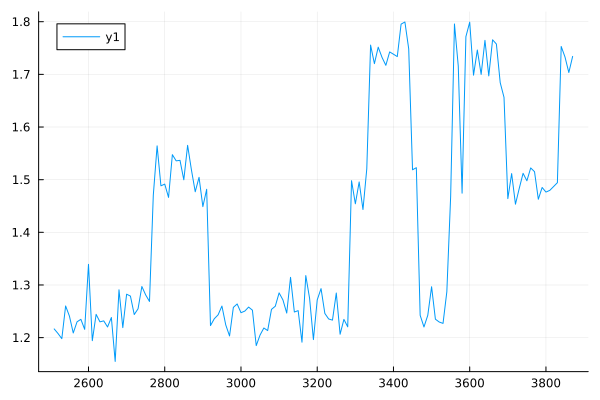

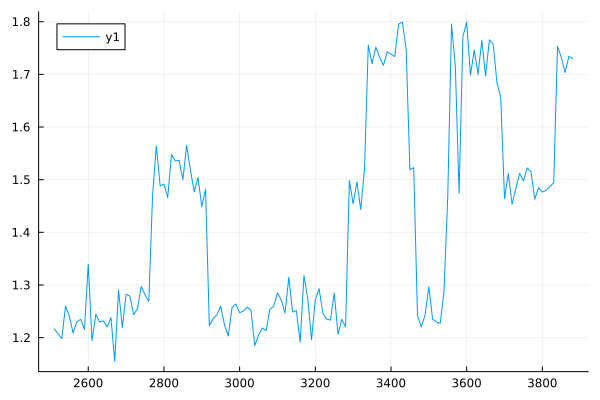

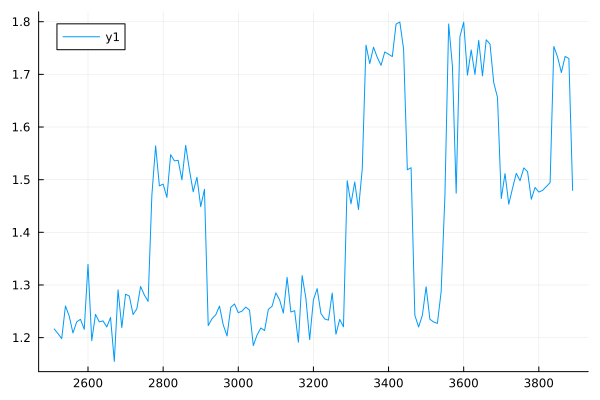

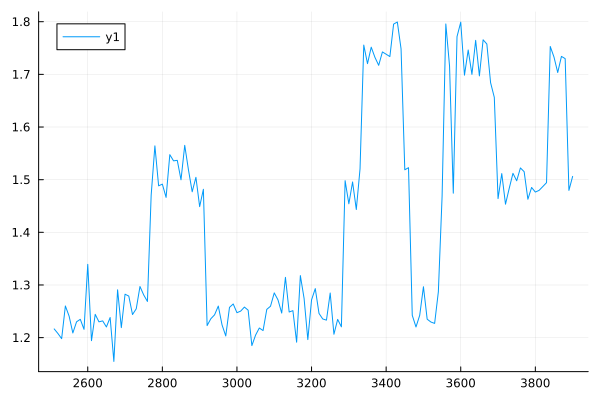

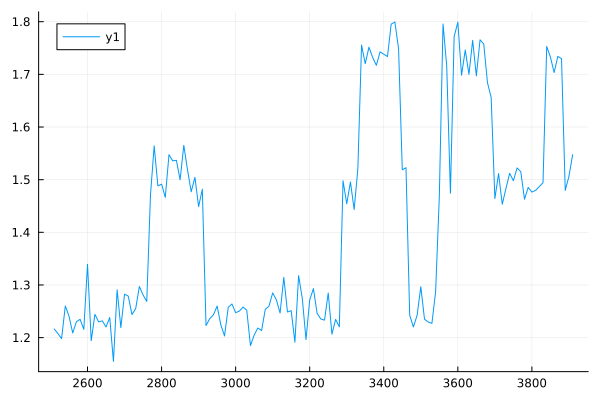

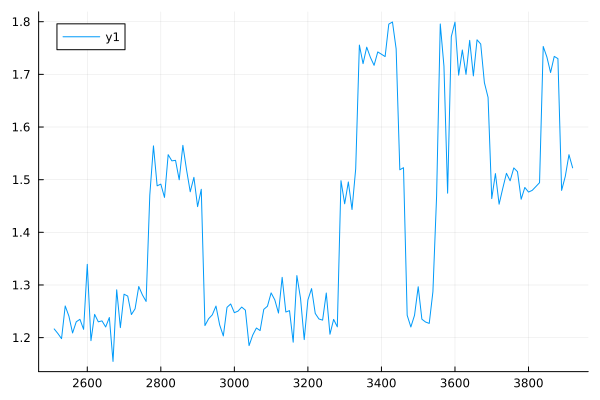

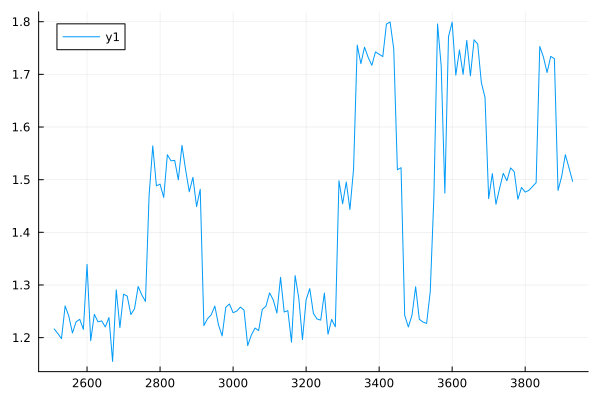

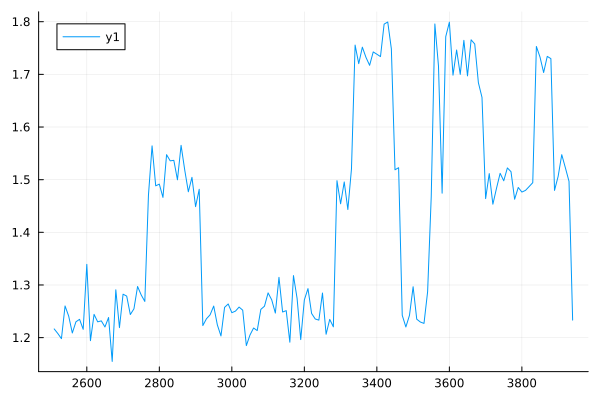

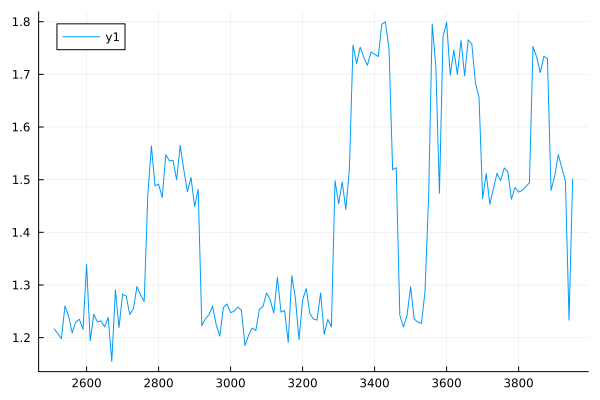

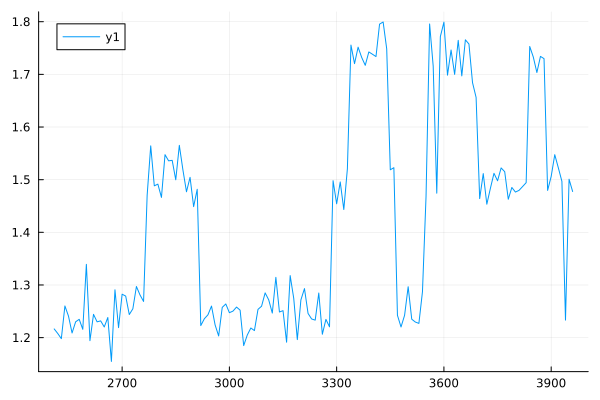

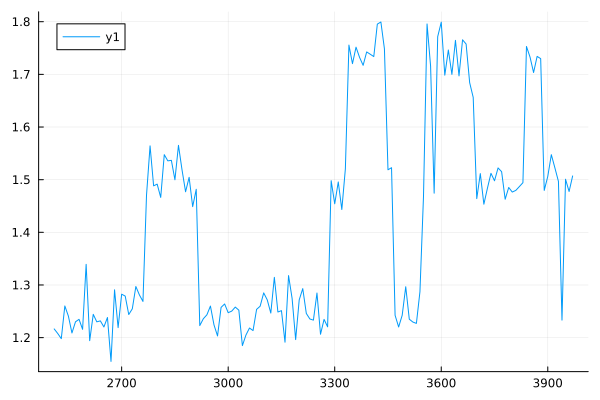

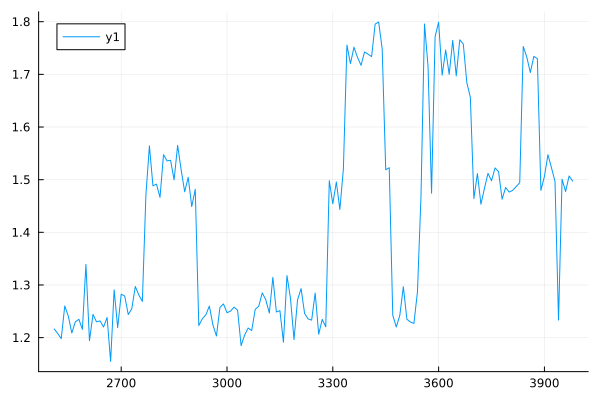

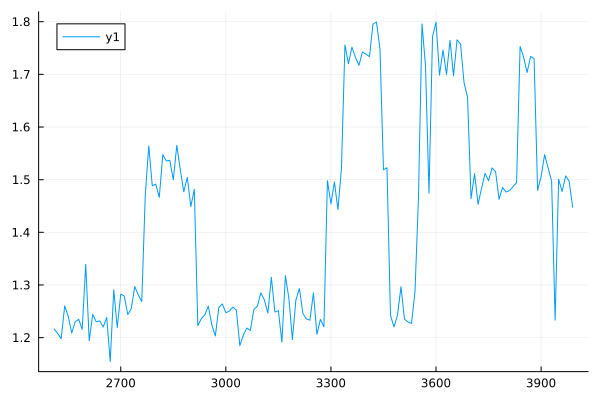

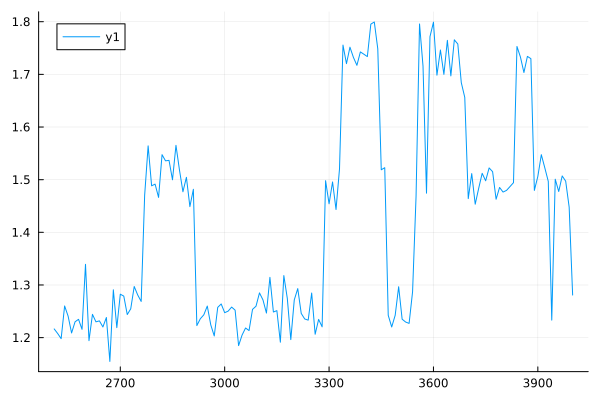

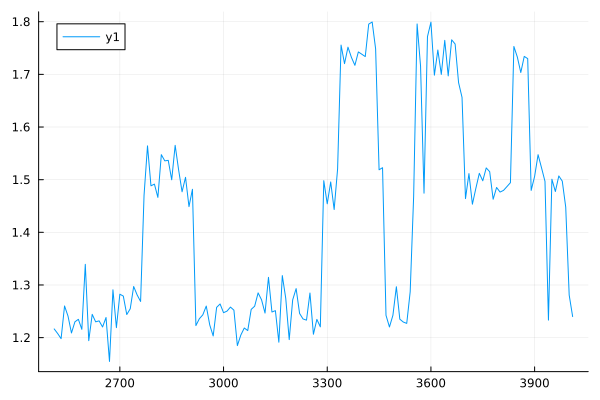

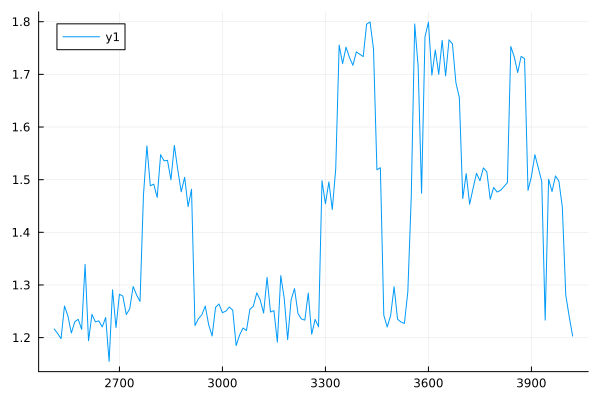

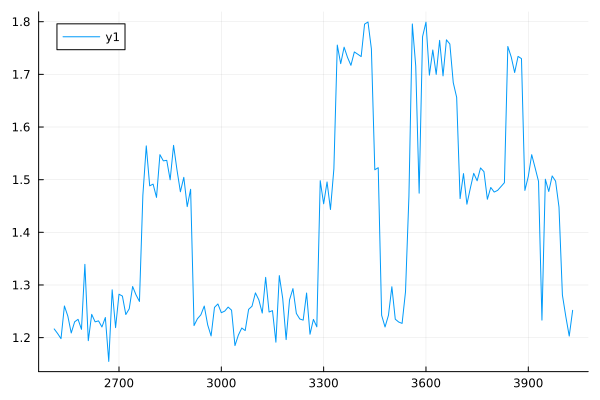

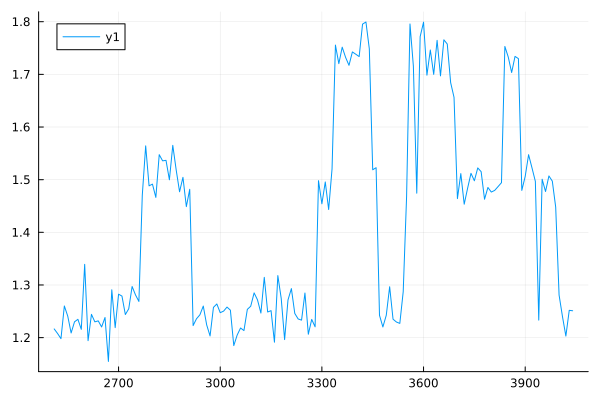

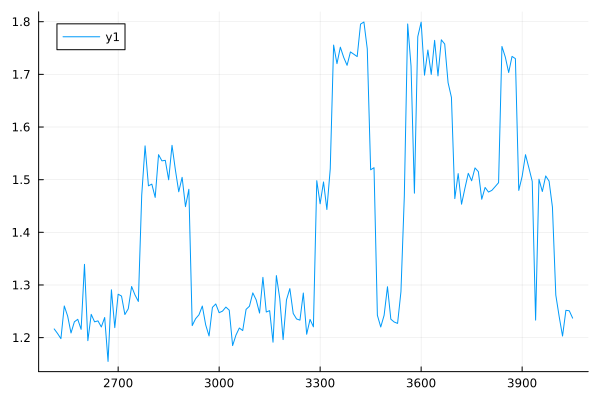

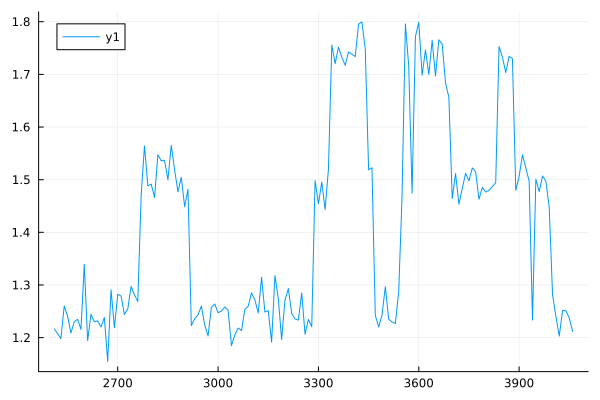

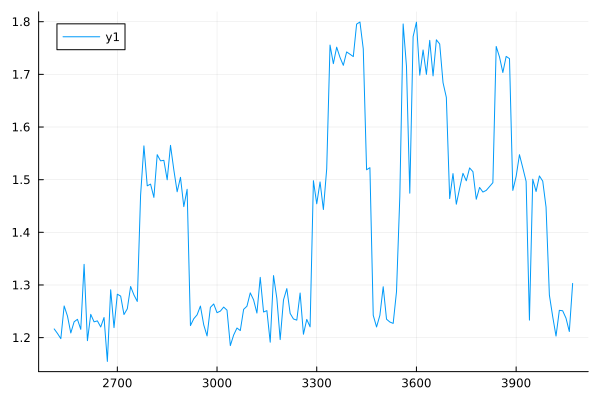

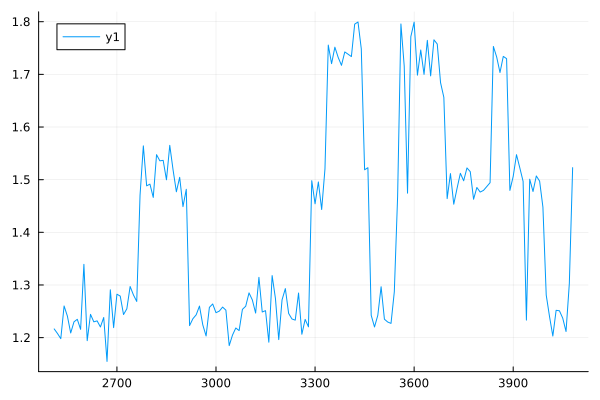

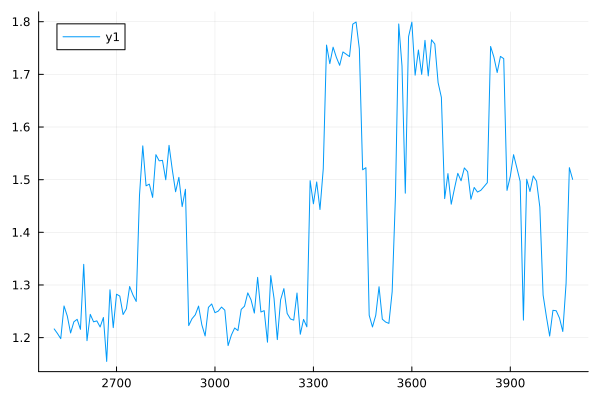

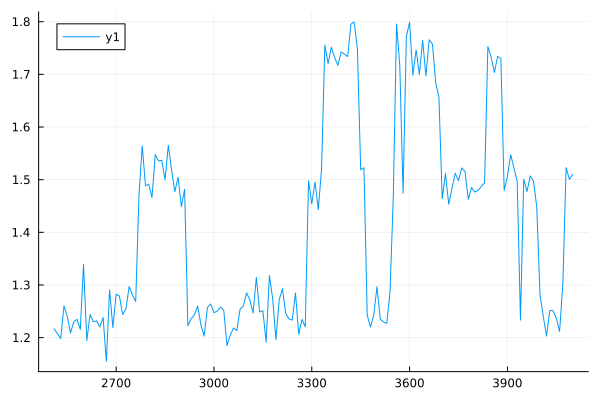

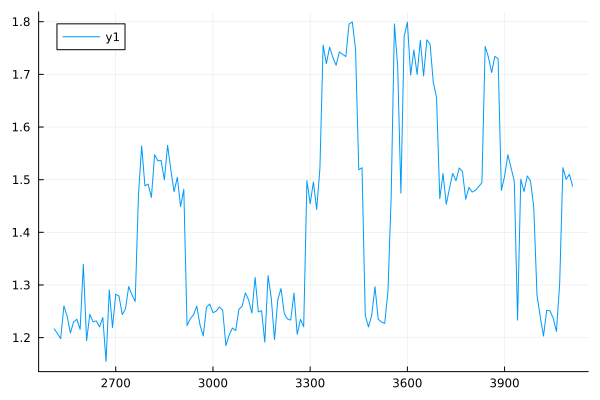

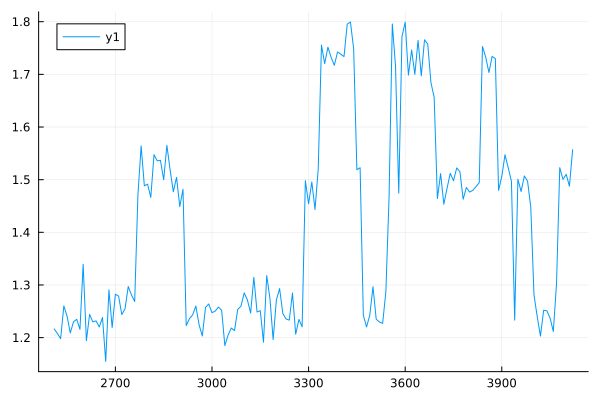

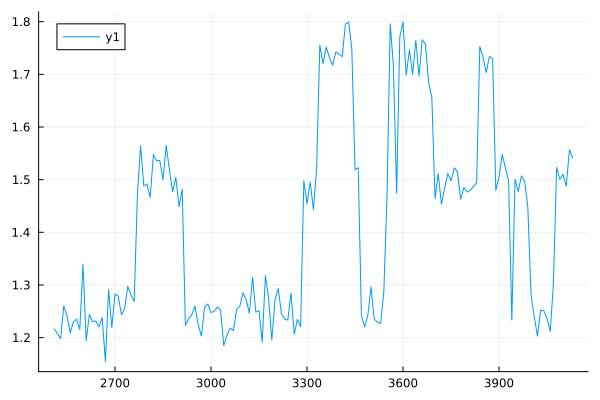

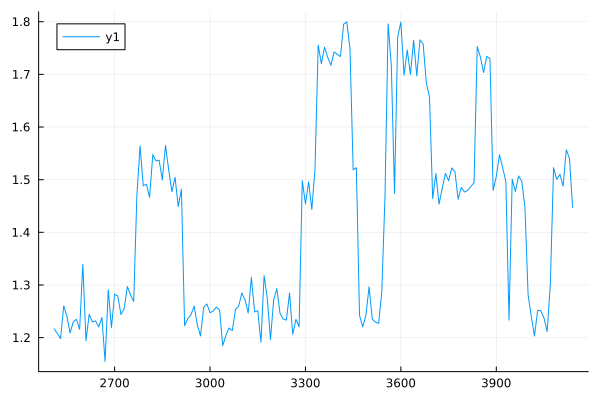

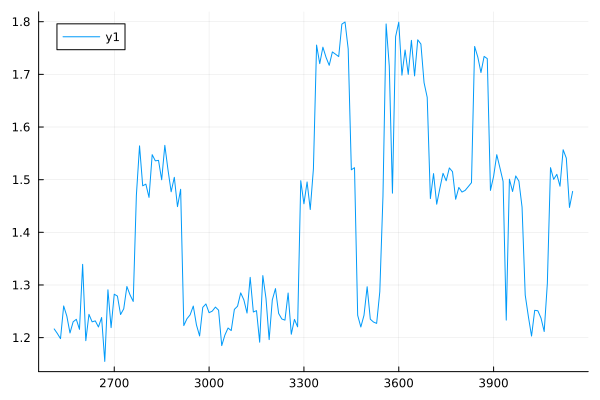

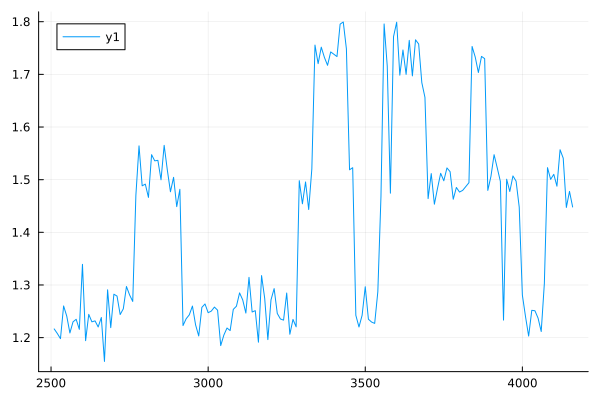

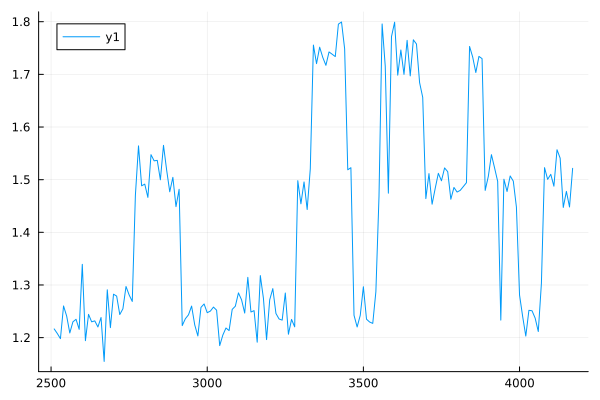

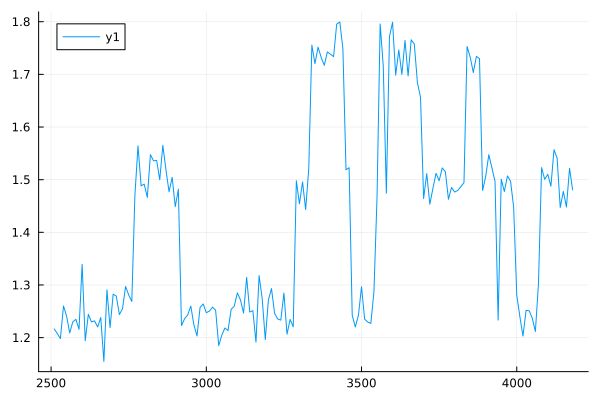

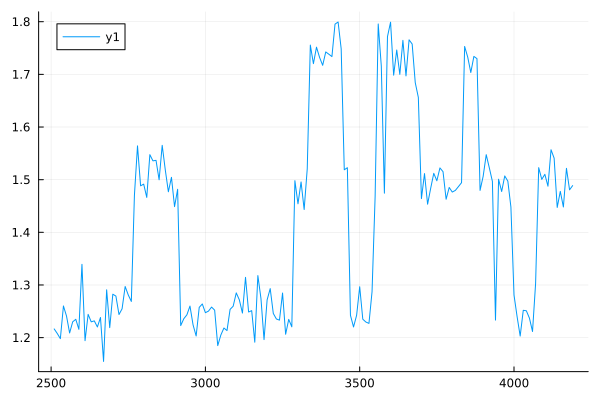

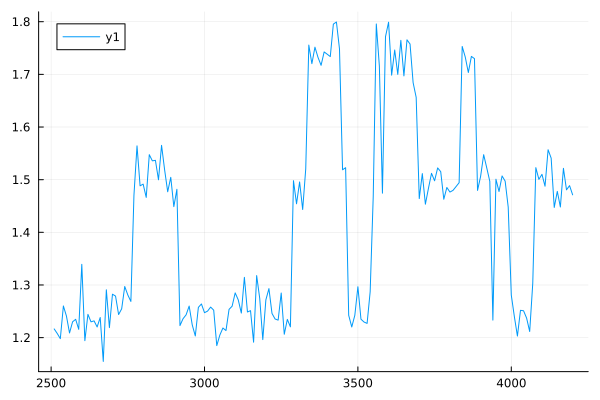

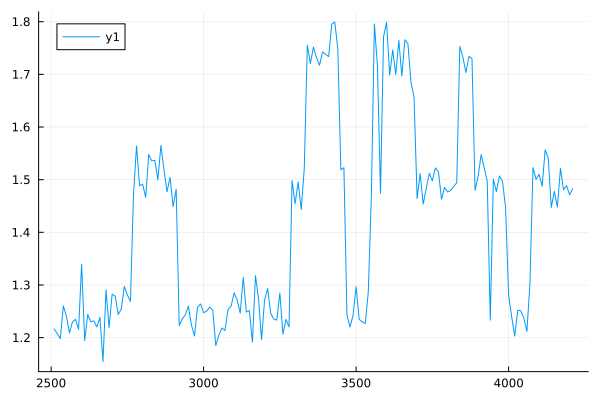

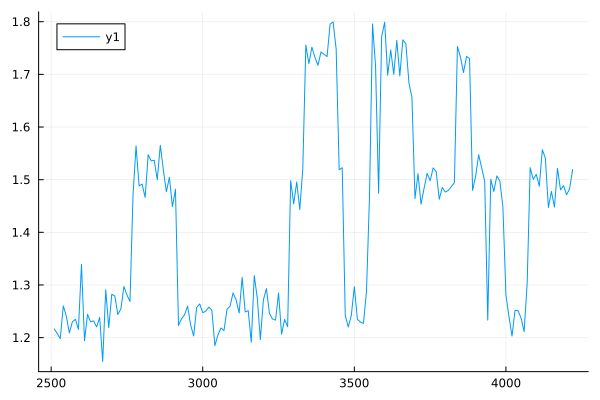

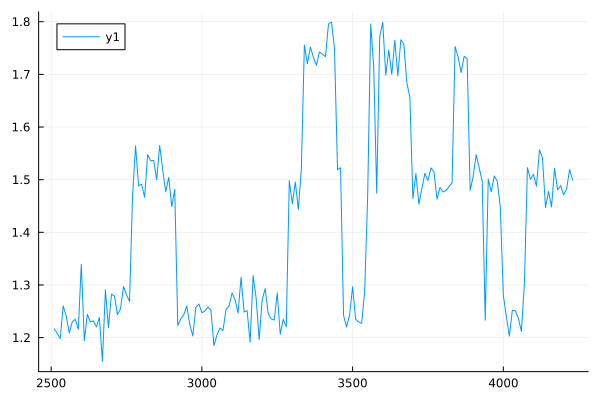

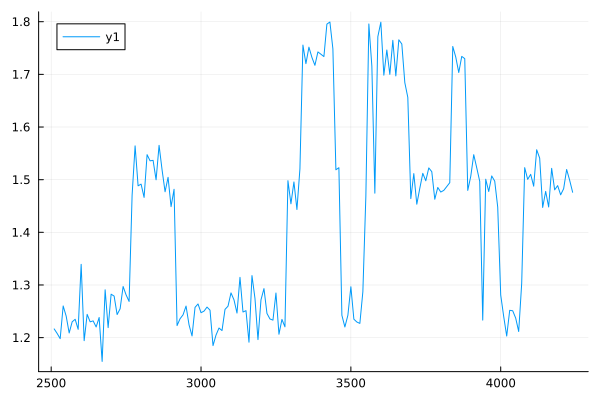

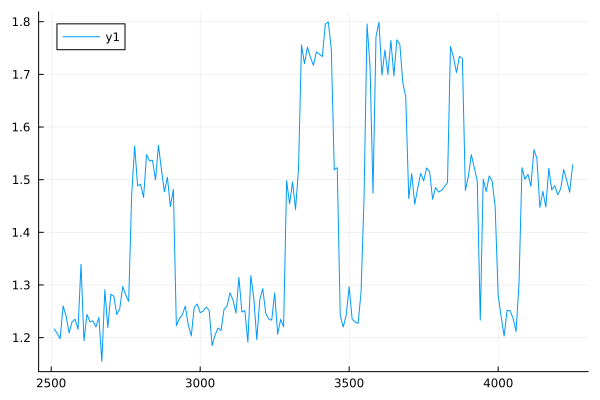

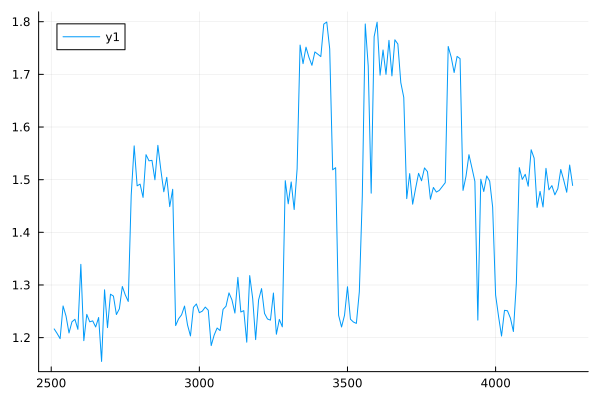

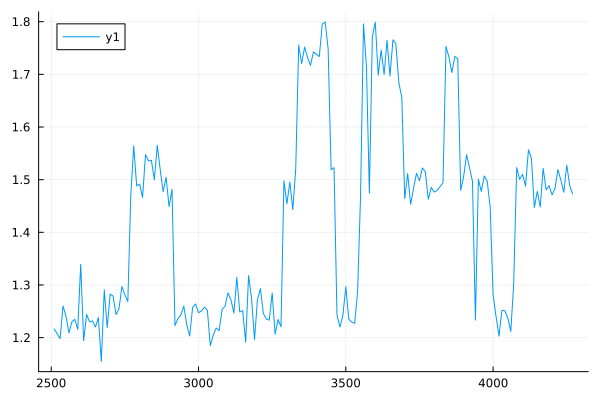

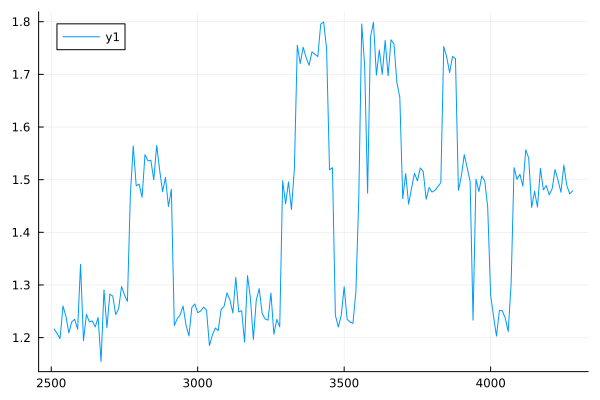

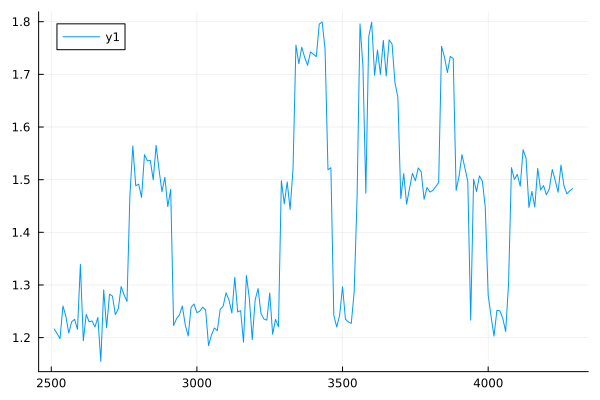

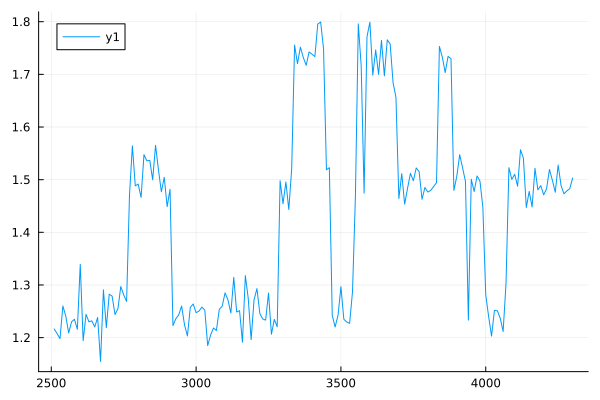

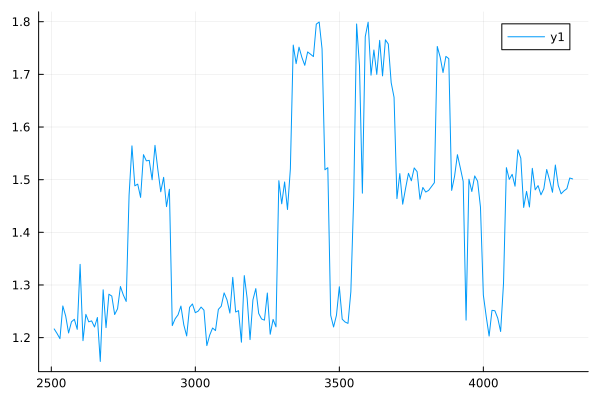

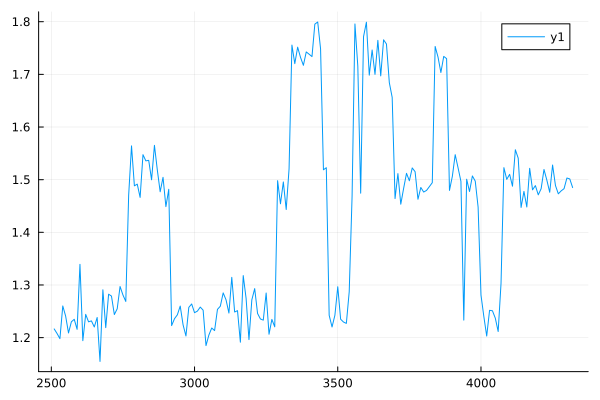

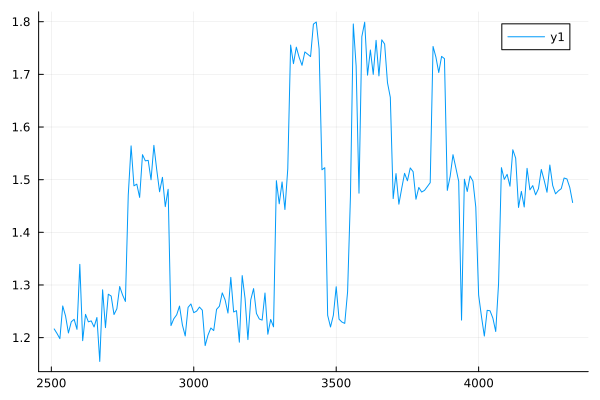

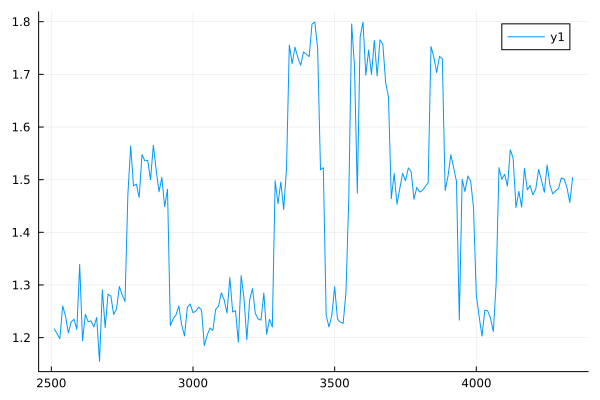

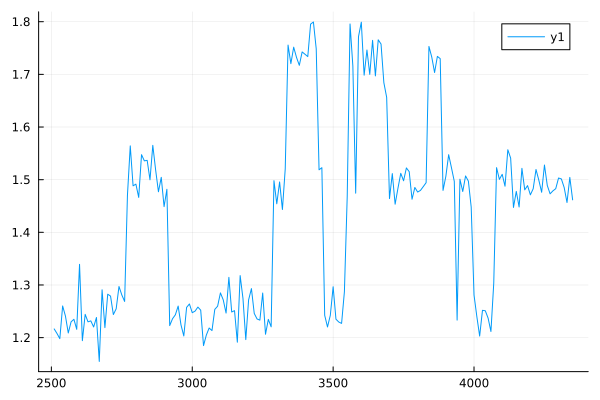

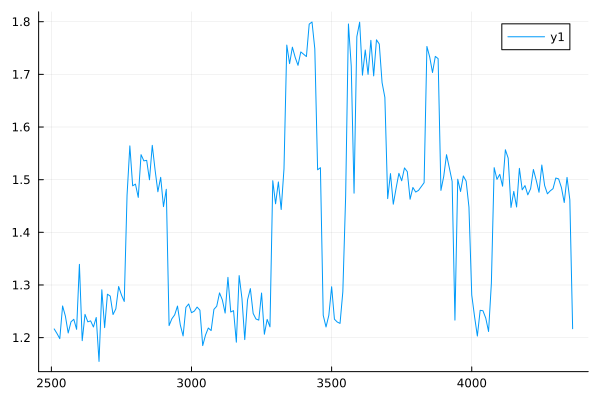

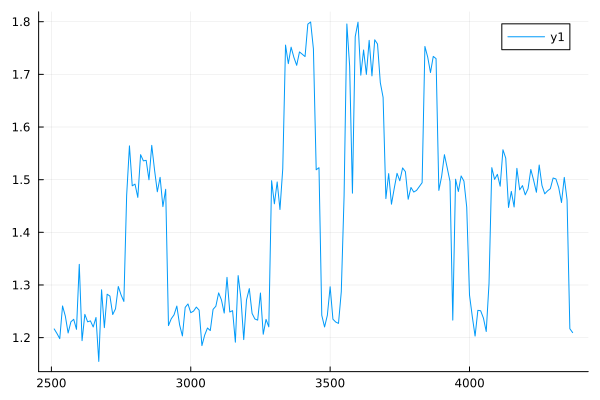

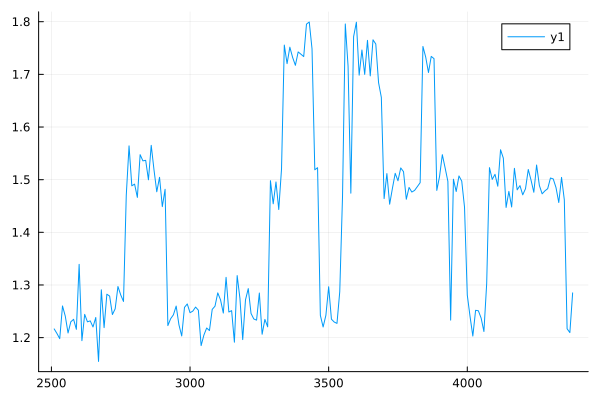

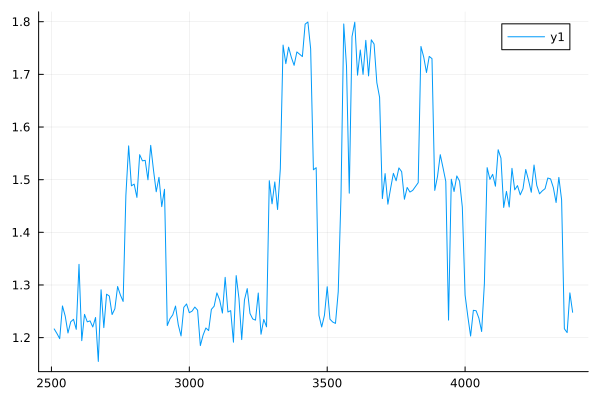

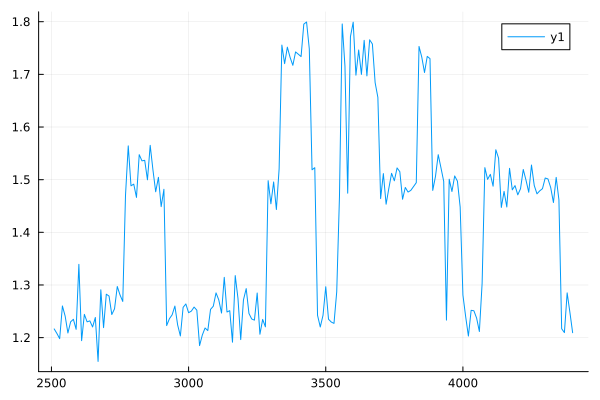

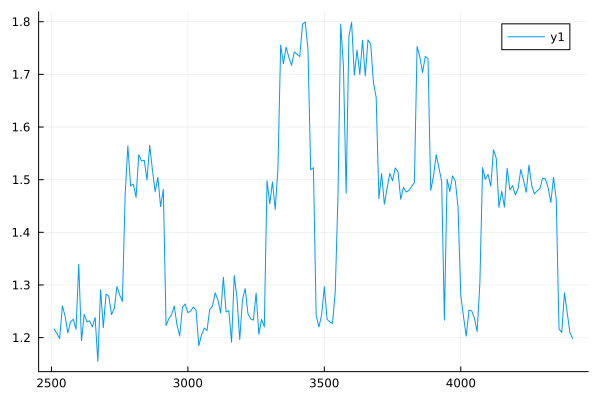

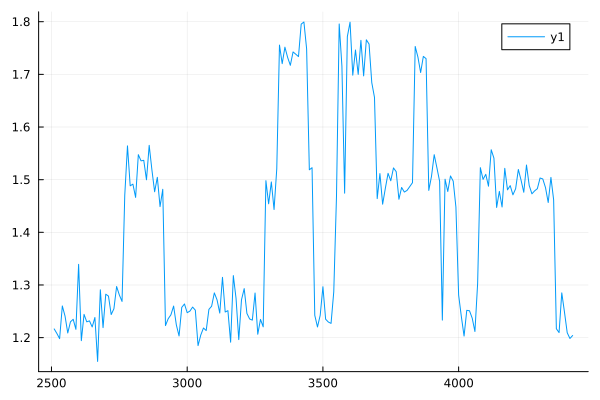

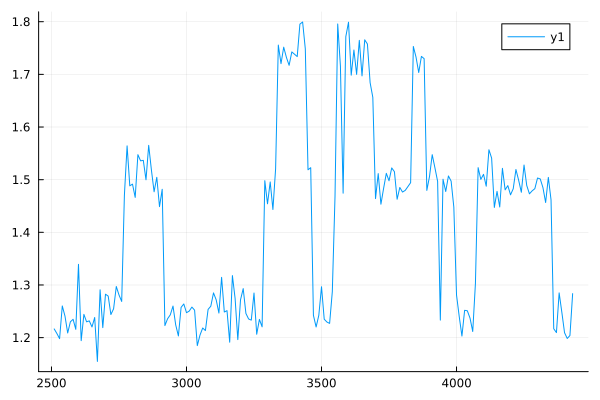

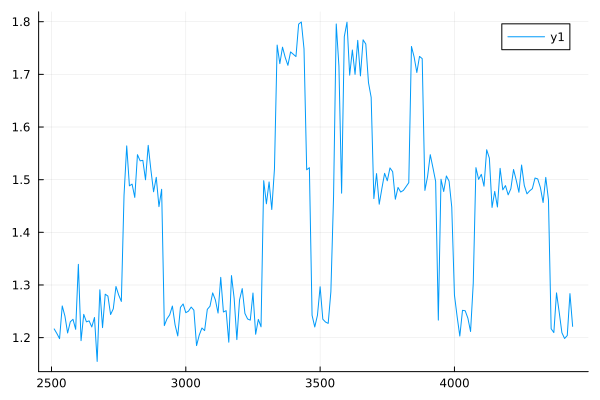

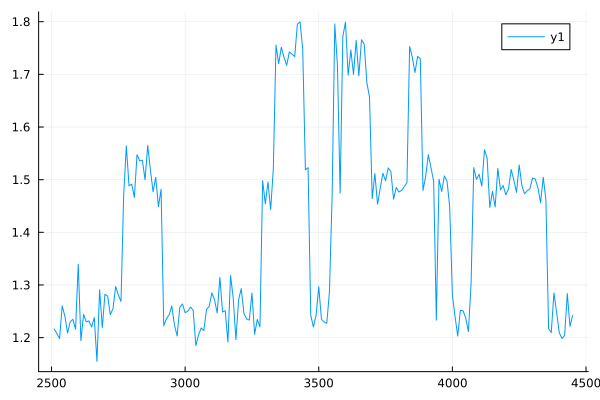

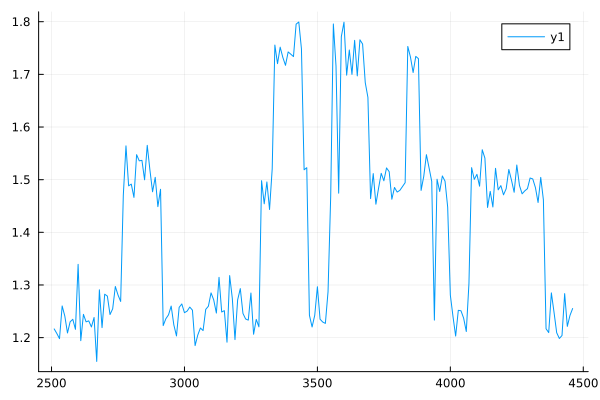

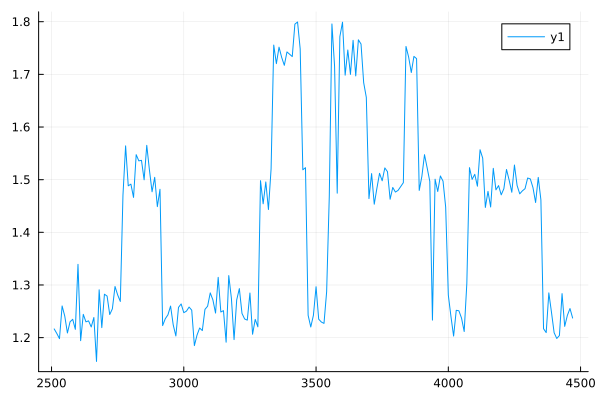

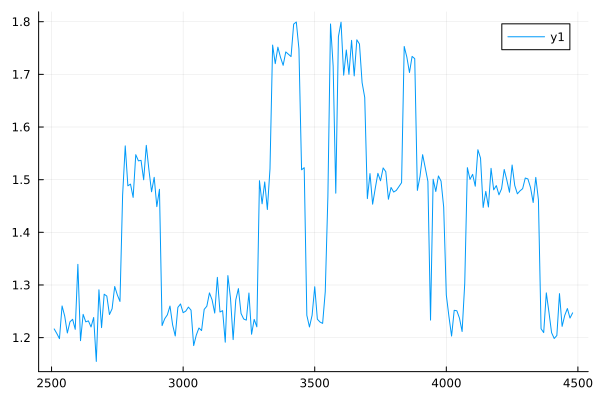

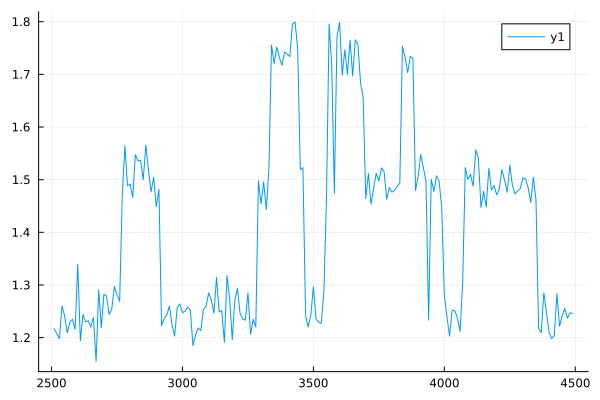

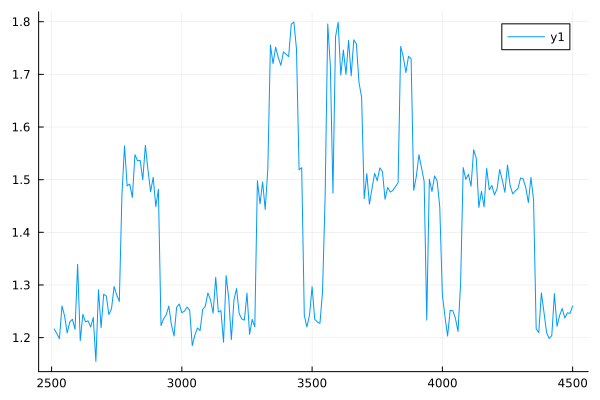

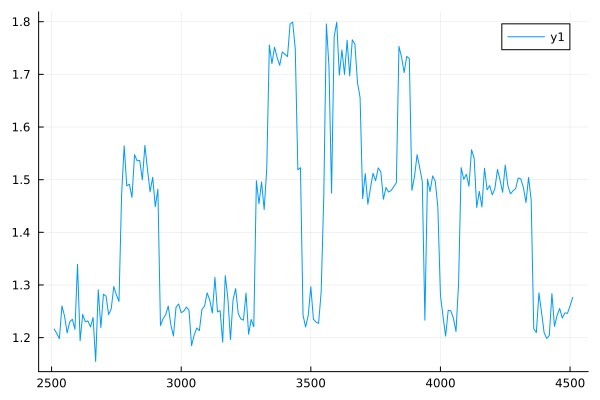

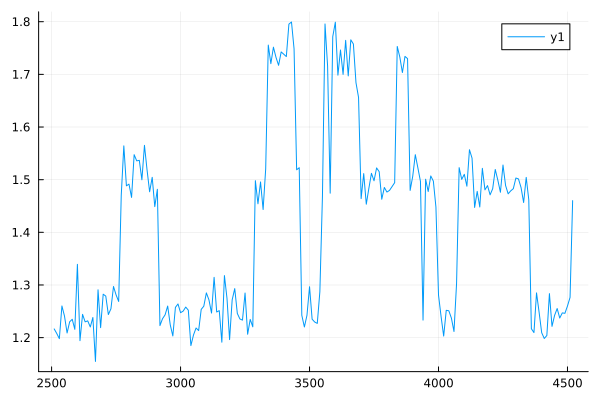

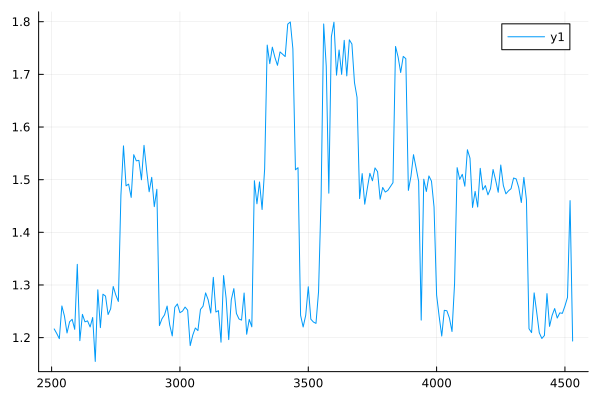

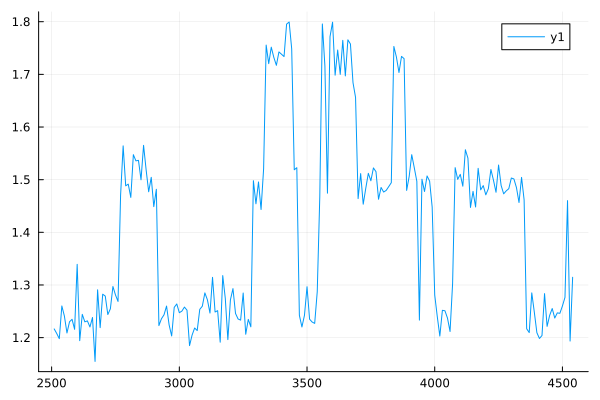

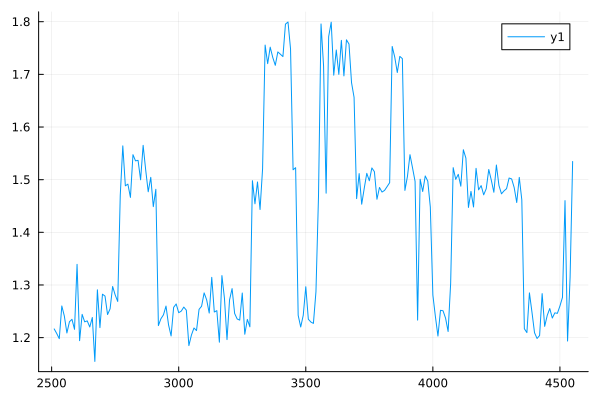

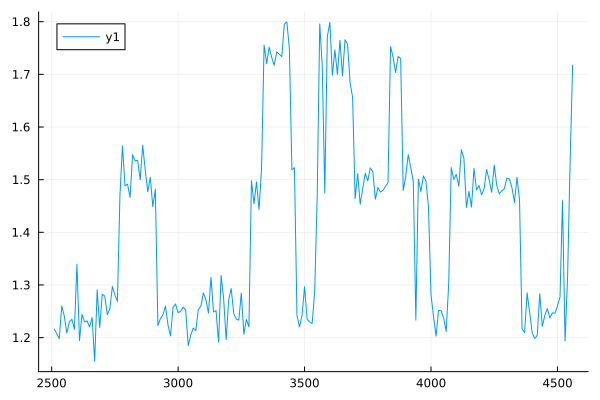

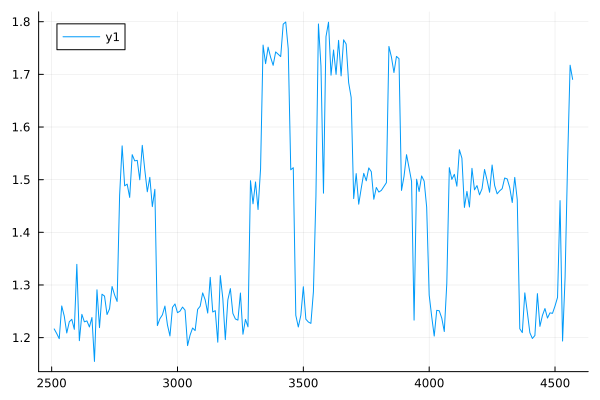

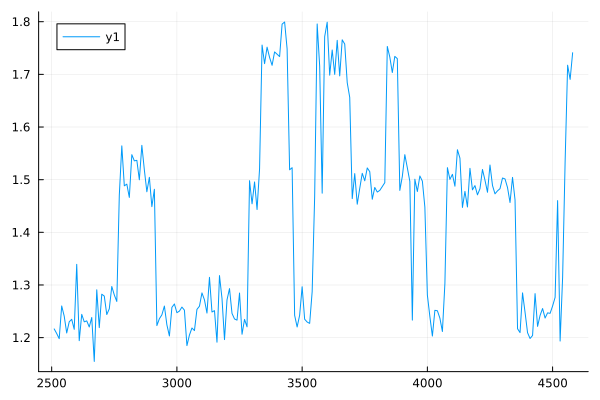

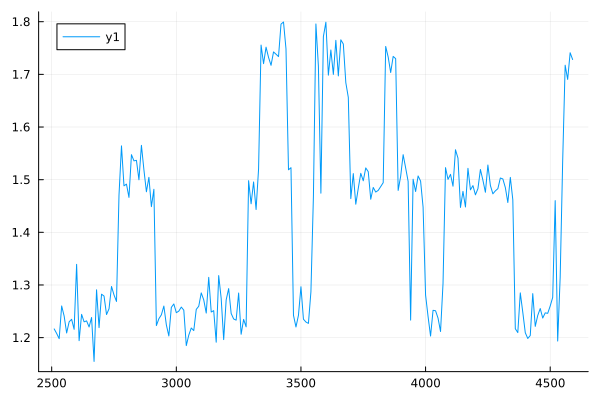

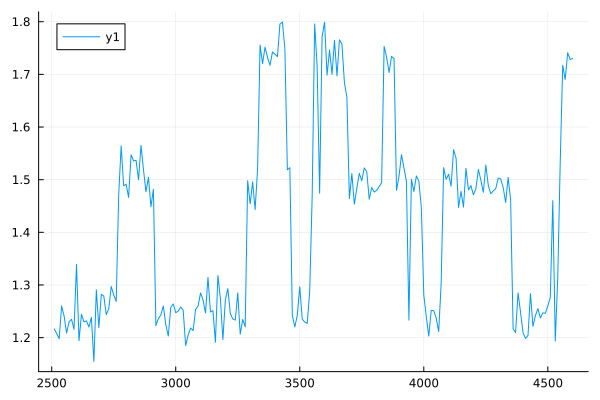

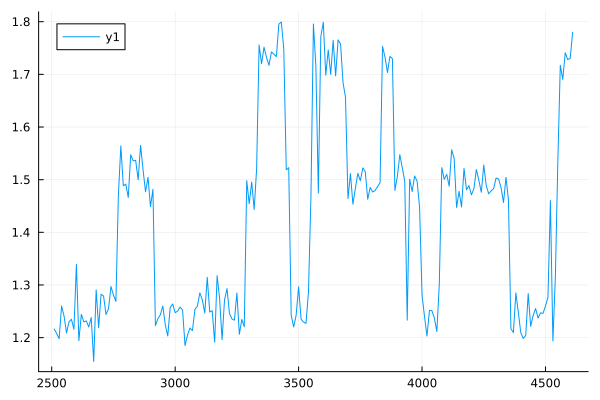

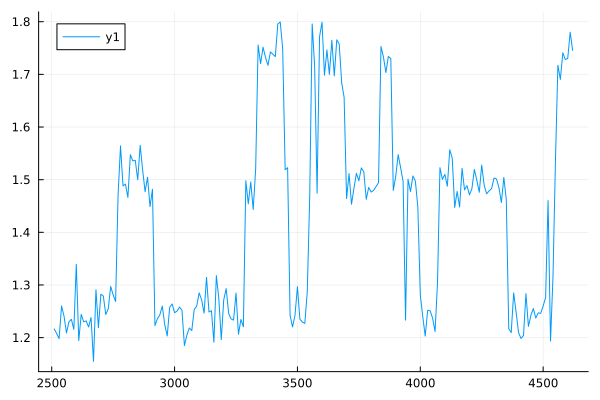

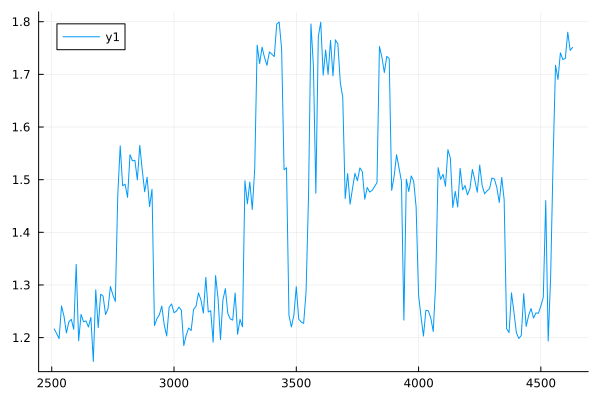

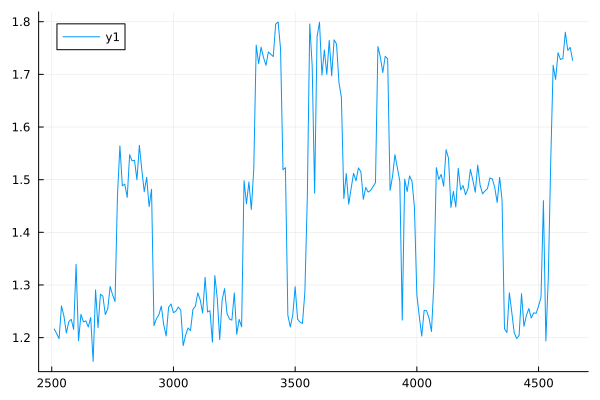

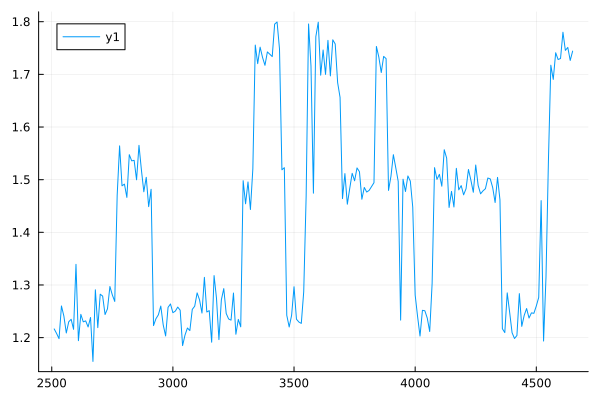

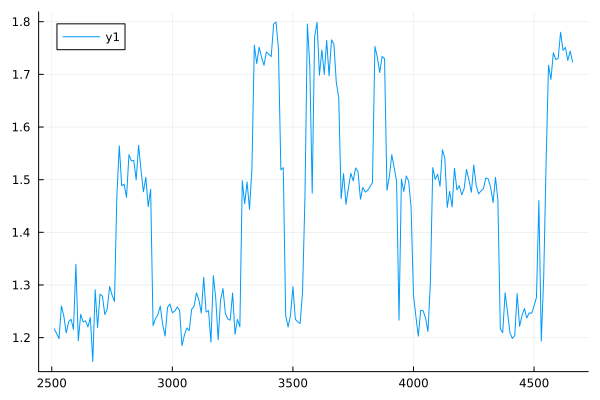

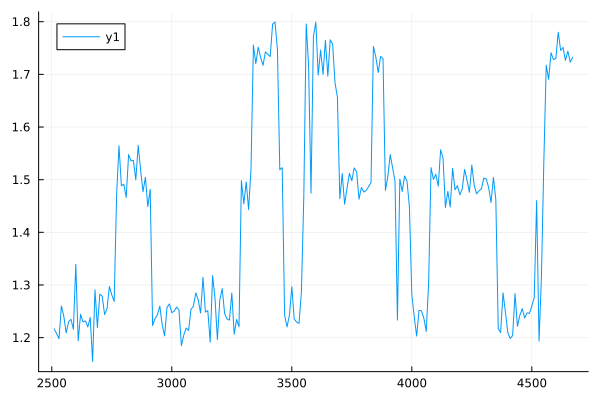

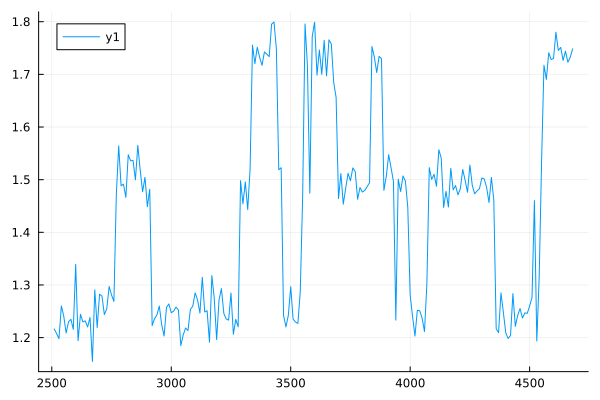

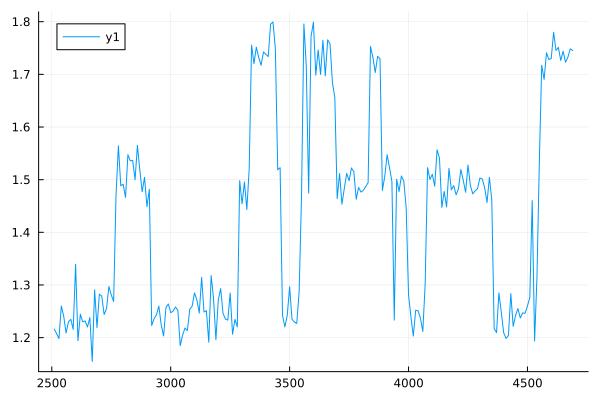

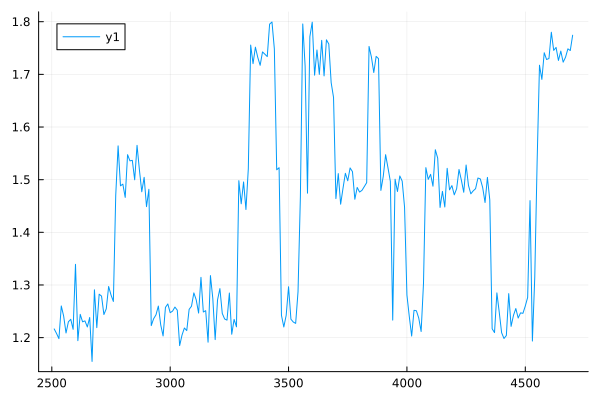

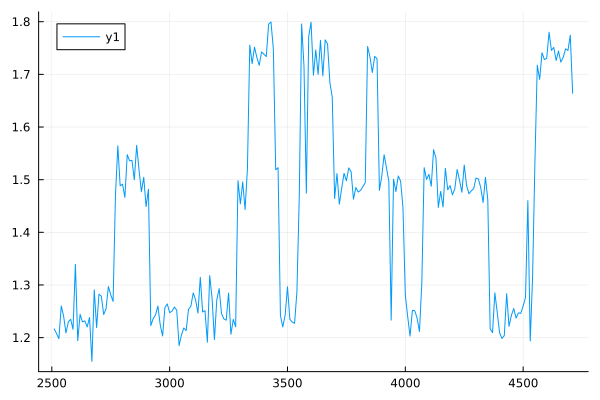

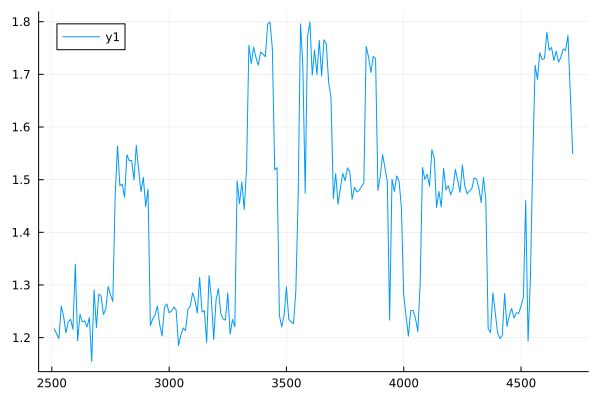

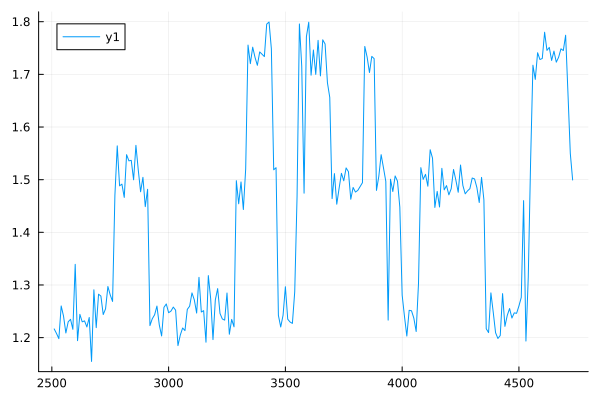

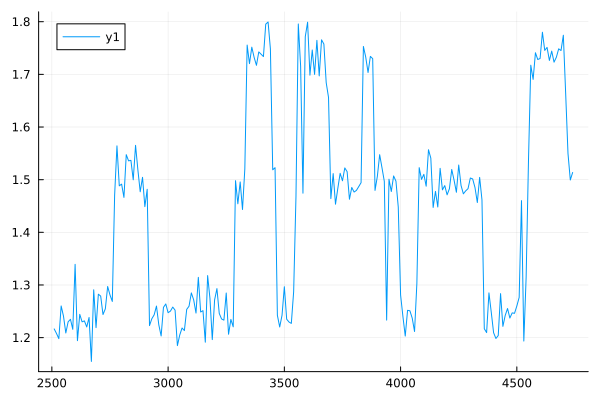

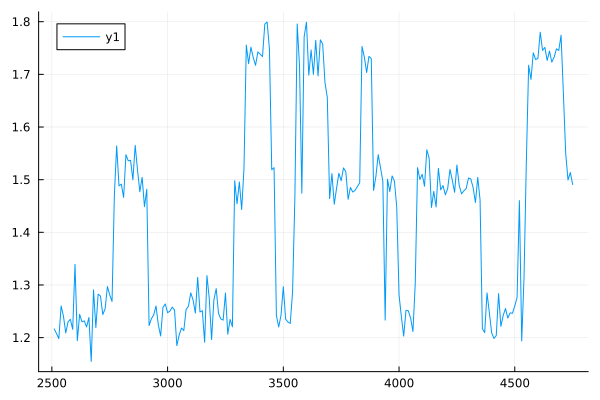

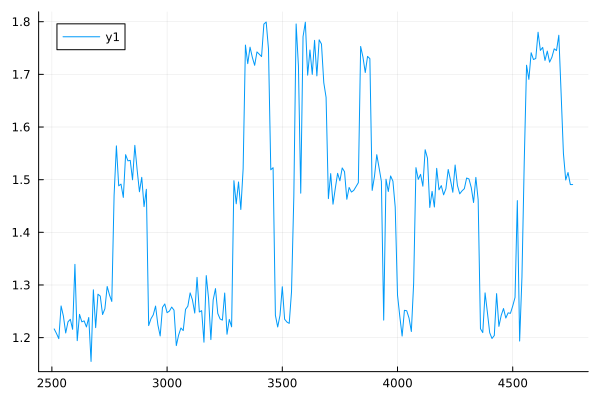

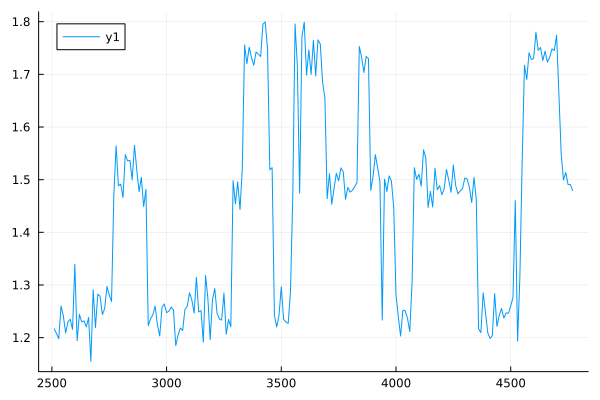

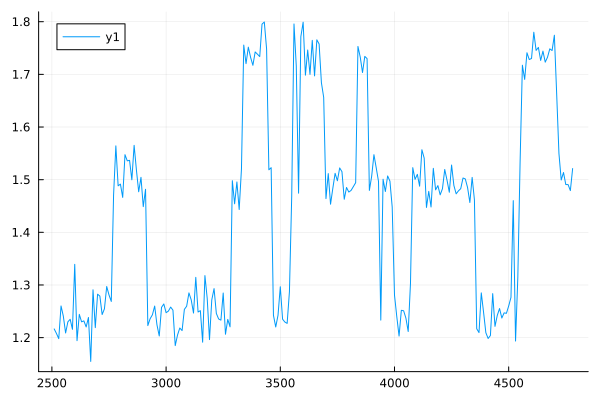

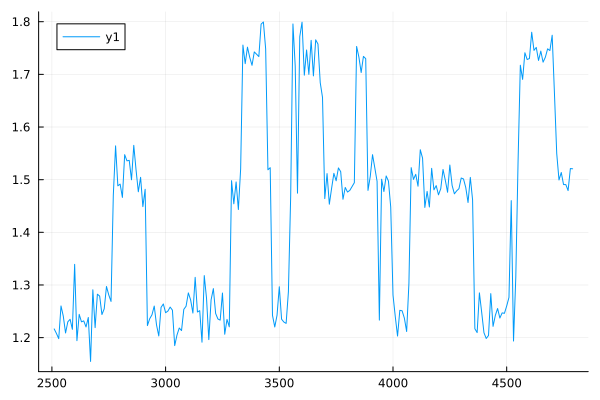

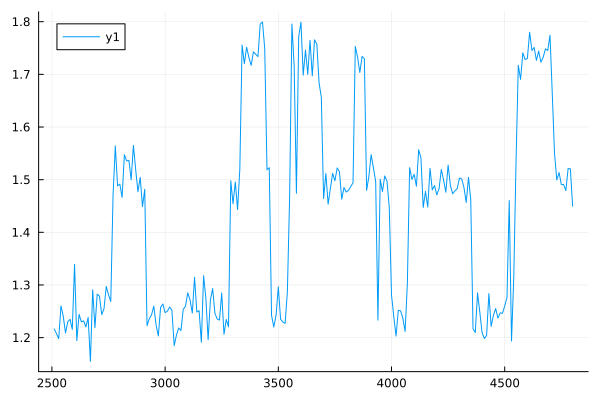

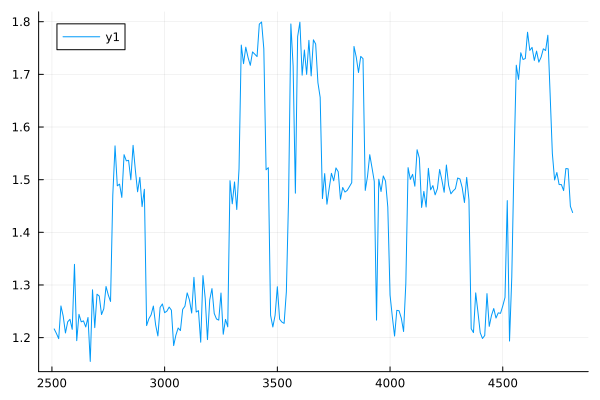

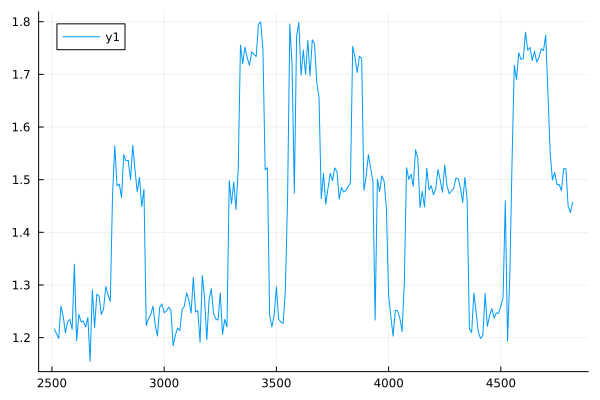

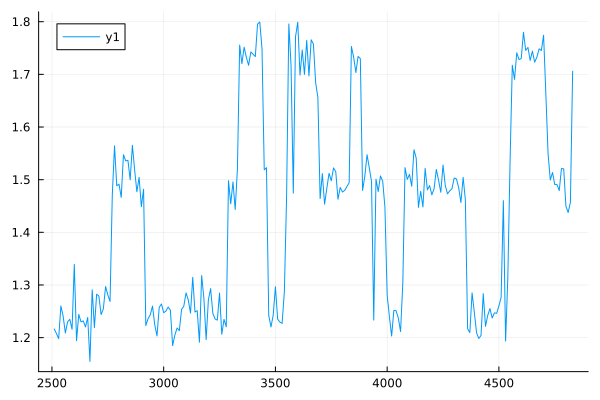

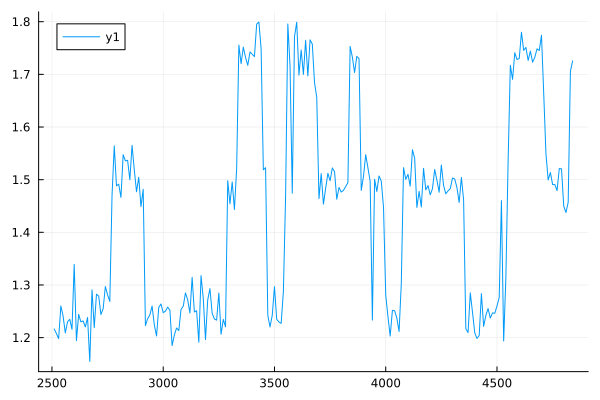

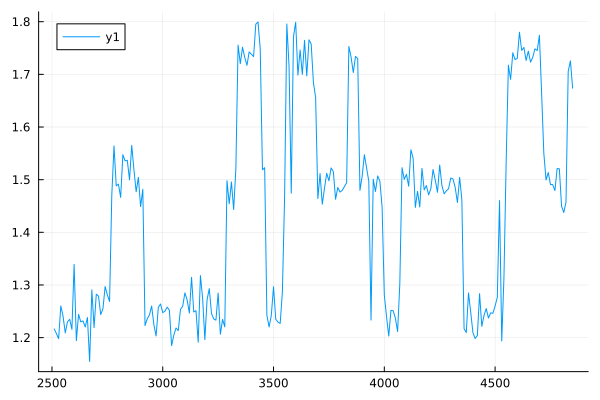

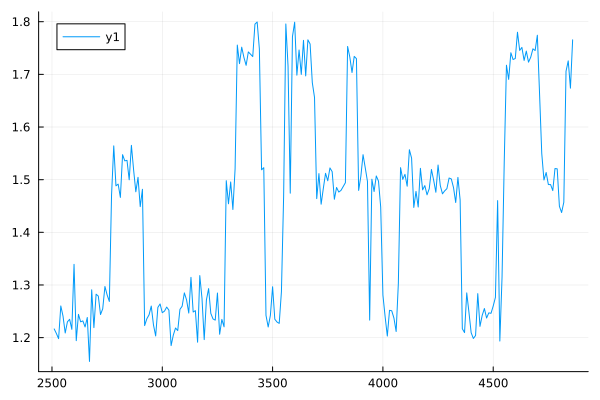

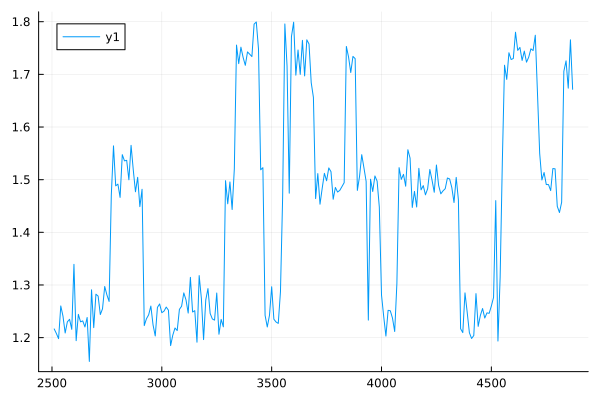

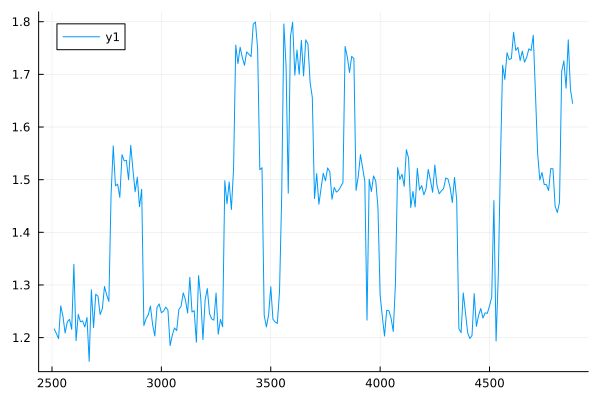

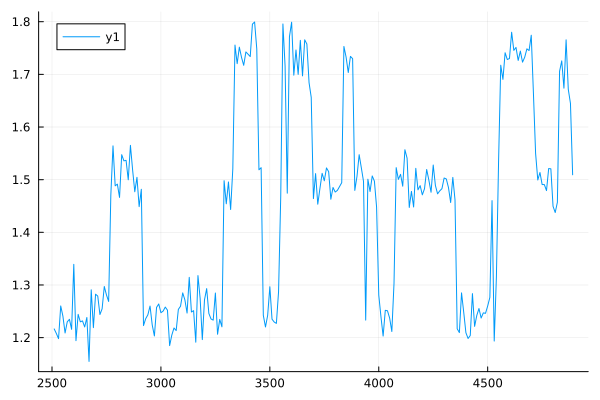

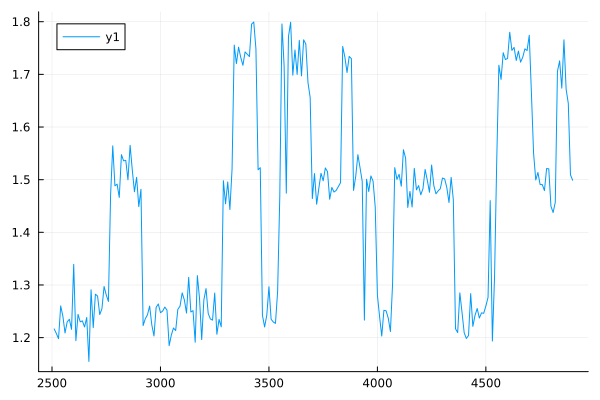

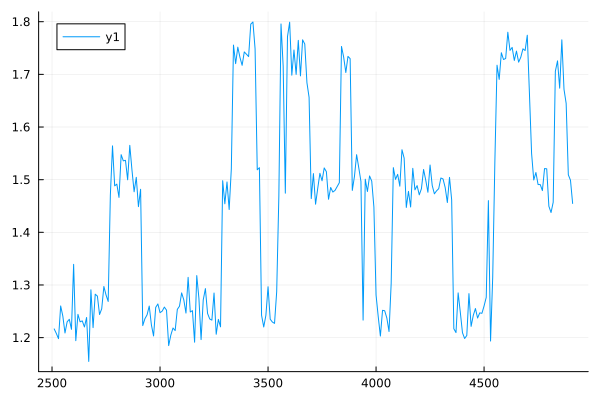

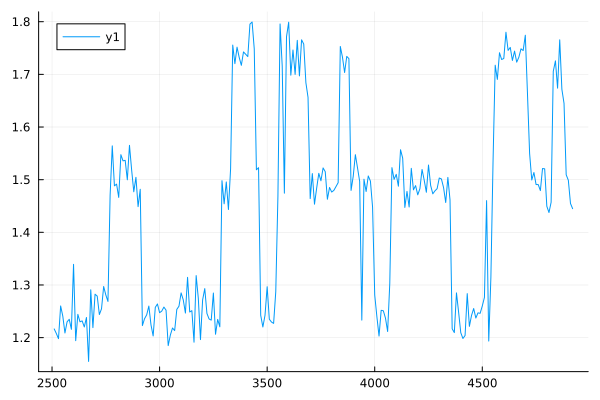

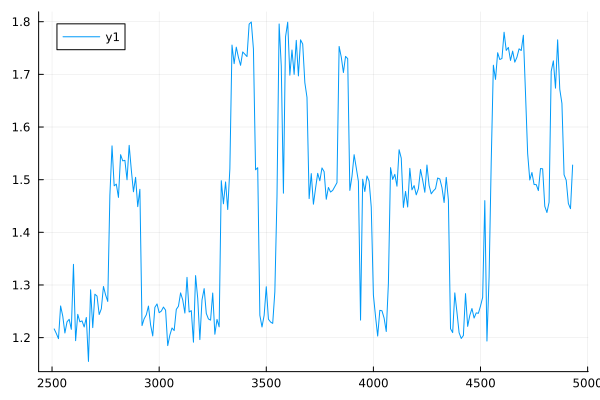

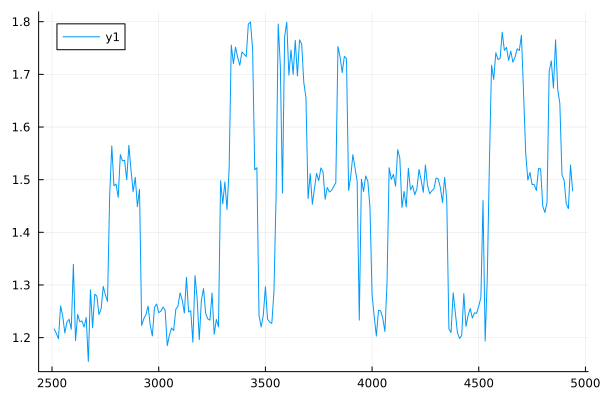

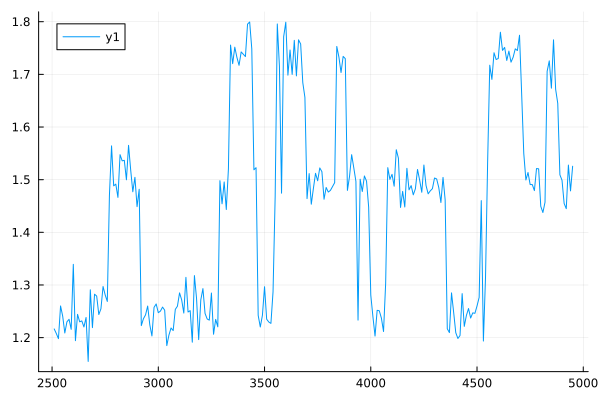

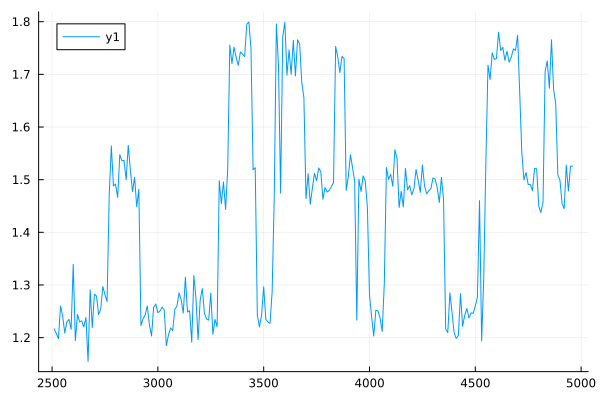

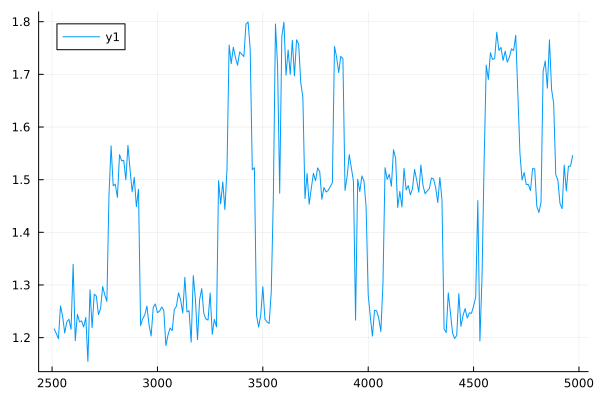

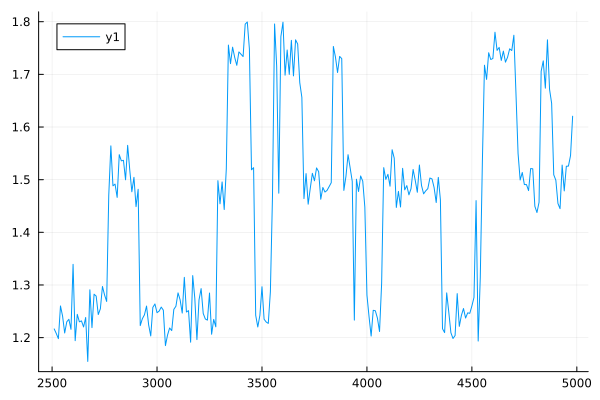

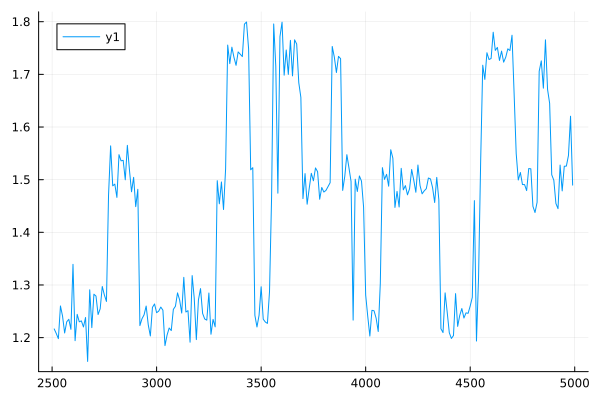

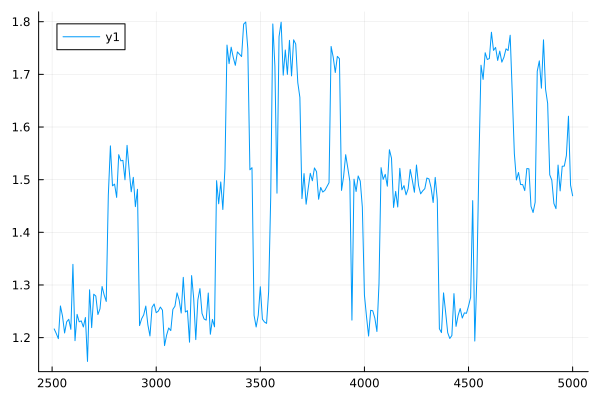

In [15]:
# A shell where one can generate sample paths. 
# It will show the generated sample path in real time. 
# With some parameter values it might give an error about "dublicated knots".
# This is related to the interpolating function in inverse function 
# sampling having hard time interpolating data which has multiple 
# points that are equal to each other.

# First define the parameters and potential.

m = 250;
SR1 = 1.25;
SR2 = 1.5;
SR3 = 1.75;
x0 = SR1;
xmin = 1;
xmax = 2;
t0 = 0;
t1 = 10;
n = 10;
n1 = 100;
N = 1000;
deltat = (t1-t0)/n;
xfinal = xmin:((xmax-xmin)/n1):xmax;
sigma1 = 0.01;
sigma2 = 0.01;
sigma3 = 0.01;
C = 5;

function V(x)  
    return C-C*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))
end

# The number of samples.
num = 250;

# The sample path is saved into xpath and tpath.
xpath = [];
tpath = [];
aux = SR1; # The path is started at x0=SR1.
for j in 1:num
    
    # Sample from the transition probability distributions.
    # The distribution changes after each step as the x0 changes.
    aux = Sample(aux);
    append!(xpath,aux);
    append!(tpath,2500+t0+j*(t1-t0)); #The time starts at 2500 to compare with the CTSI/USDT data.
    display(plot(tpath,xpath))
end


In [16]:
using CSV
using DataFrames

# Here we import the data used in the project.
# Two data sets are imported. However, only the CTSIdata.csv 
# is used in the paper. You need to specify your own path to the file.

d1 = CSV.read("/home/akapiisp/Documents/Documents/Research/smbproject/Reefdata.csv", DataFrame)
d2 = CSV.read("/home/akapiisp/Documents/Documents/Research/smbproject/Ctsidata.csv", DataFrame)

6342×7 DataFrame
  Row │ time        open     high     low      close    Volume   Volume MA     ⋯
      │ Int64       Float64  Float64  Float64  Float64  Int64    Float64       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 1679904000   0.1426   0.1433   0.1421   0.1432   393057       3.49497e ⋯
    2 │ 1679907600   0.1432   0.1437   0.1425   0.1432   170873  340822.0
    3 │ 1679911200   0.1432   0.1437   0.1429   0.1434    94942       3.21067e
    4 │ 1679914800   0.1434   0.144    0.1429   0.1439   305616       3.1916e5
    5 │ 1679918400   0.1437   0.1437   0.142    0.1422   552450       3.40355e ⋯
    6 │ 1679922000   0.142    0.1423   0.1405   0.1409   788581       3.60881e
    7 │ 1679925600   0.1409   0.1411   0.1367   0.1367  1180422       4.06486e
    8 │ 1679929200   0.1367   0.1368   0.133    0.1357  1824496  483926.0
    9 │ 1679932800   0.1356   0.1377   0.1352   0.1355   561325       4.89817e ⋯
   10 │ 1679936400   0.1354   0.1365   0.1352   0.1356   771594       5.2493e5
   11 │ 1679940000   0.1358   0.1369   0.1356   0.1358   151601       5.15632e
  ⋮   │     ⋮          ⋮        ⋮        ⋮        ⋮        ⋮           ⋮       ⋱
 6333 │ 1702699200   0.1739   0.1739   0.1723   0.1724   184767       4.87098e
 6334 │ 1702702800   0.1725   0.1728   0.1714   0.1717   169219  472011.0      ⋯
 6335 │ 1702706400   0.172    0.1725   0.1707   0.1725   375626       4.74275e
 6336 │ 1702710000   0.1725   0.1746   0.1714   0.1744   218563       4.66068e
 6337 │ 1702713600   0.1744   0.178    0.174    0.175   1891294       5.41112e
 6338 │ 1702717200   0.175    0.1752   0.1722   0.1724   713287  518187.0      ⋯
 6339 │ 1702720800   0.1723   0.1732   0.1716   0.172    427356  506891.0
 6340 │ 1702724400   0.172    0.1726   0.1714   0.1723   433066       5.07054e
 6341 │ 1702728000   0.1722   0.1734   0.1721   0.1733   328229       4.89168e
 6342 │ 1702731600   0.1733   0.1738   0.1728   0.1737    42250       4.62887e ⋯
                                                  1 column and 6321 rows omitted

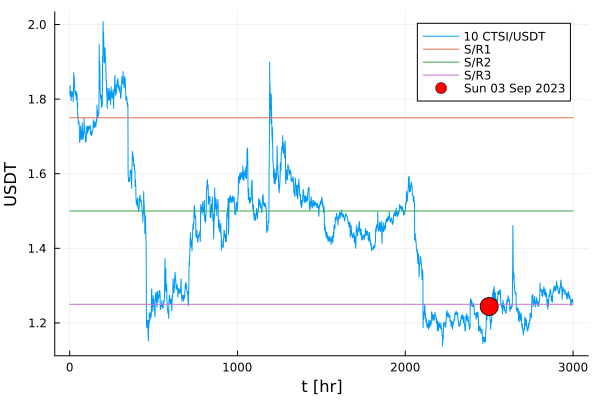

In [17]:
#FIG. 1. The CTSI/USDT price and the S/R levels.

plotd2=plot(1:1:3000,10*d2[1342:6342,2][1:3000],label="10 CTSI/USDT",xlabel = "t [hr]",ylabel = "USDT",legend=:topright)
plot!(1:1:3000,fill(10*0.175,3000),label="S/R1")
plot!(1:1:3000,fill(10*0.15,3000),label="S/R2")
plot!(1:1:3000,fill(10*0.125,3000),label="S/R3")
scatter!([2500],[10*d2[1342:6342,2][2500]],label = "Sun 03 Sep 2023",color="red",markersize = 10)
savefig(plotd2,"preCTSI.png")
display(plotd2)

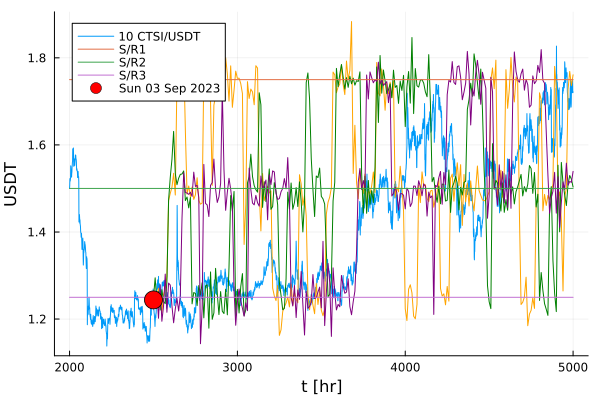

In [24]:
#FIG. 8 sample paths for m = 250.

# Some sample paths are hard coded at the end of the file.
# The lists path10x-path6x contain the ones that have m=250.

d=plot(2000:1:5000,10*d2[1342:6342,2][2000:5000],label="10 CTSI/USDT",xlabel = "t [hr]",ylabel = "USDT",legend=:topleft)
#plot!(patht,path10x)
#plot!(patht,path9x)
plot!(patht,path8x,color = "orange",primary = false)
plot!(patht,path7x,color = "green",primary = false)
plot!(patht,path6x, color = "purple",primary = false)
plot!(2000:1:5000,fill(10*0.175,3001),label="S/R1")
plot!(2000:1:5000,fill(10*0.15,3001),label="S/R2")
plot!(2000:1:5000,fill(10*0.125,3001),label="S/R3")
scatter!([2500],[10*d2[1342:6342,2][2500]],label = "Sun 03 Sep 2023",color="red",markersize = 10)
savefig(d,"forCTSImsmall.png")
display(d)

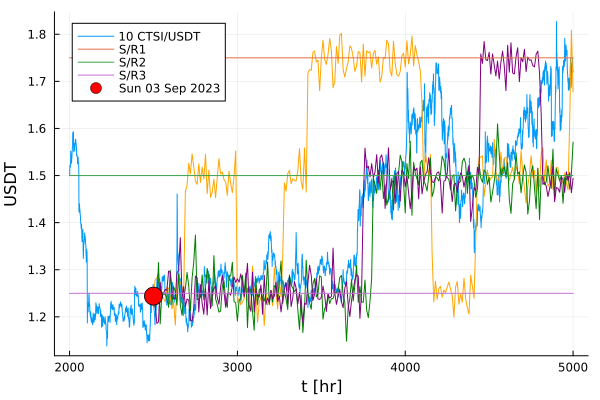

In [25]:
# FIG. 9 sample paths for m = 450.

# Some sample paths are hard coded at the end of the file.
# The lists path5x-path1x contain the ones that have m=450.

d=plot(2000:1:5000,10*d2[1342:6342,2][2000:5000],label="10 CTSI/USDT",xlabel = "t [hr]",ylabel = "USDT",legend=:topleft)
plot!(patht,path5x,color = "orange",primary=false)
#plot!(patht,path4x)
#plot!(patht,path3x)
plot!(patht,path2x,color = "green",primary = false)
plot!(patht,path1x,color = "purple",primary = false)
plot!(2000:1:5000,fill(10*0.175,3001),label="S/R1")
plot!(2000:1:5000,fill(10*0.15,3001),label="S/R2")
plot!(2000:1:5000,fill(10*0.125,3001),label="S/R3")
scatter!([2500],[10*d2[1342:6342,2][2500]],label = "Sun 03 Sep 2023",color="red",markersize = 10)
savefig(d,"forCTSImlarge.png")
display(d)

In [19]:
#First the parameters used and then 
#couple of sample paths obtained from these parameters.

#m = 450;
#SR1 = 1.25;
#SR2 = 1.5;
#SR3 = 1.75;
#x0 = SR1;
#xmin = 1;
#xmax = 2;
#t0 = 0;
#t1 = 10;
#n = 10;
#n1 = 100;
#N = 10000;
#deltat = (t1-t0)/n;
#xfinal = xmin:((xmax-xmin)/n1):xmax;
#sigma1 = 0.01
#sigma2 = 0.01
#sigma3 = 0.01

# V(x) = 5-5*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))

patht = [2500, 2510, 2520, 2530, 2540, 2550, 2560, 2570, 2580, 2590, 2600, 2610, 2620, 2630, 2640, 2650, 2660, 2670, 2680, 2690, 2700, 2710, 2720, 2730, 2740, 2750, 2760, 2770, 2780, 2790, 2800, 2810, 2820, 2830, 2840, 2850, 2860, 2870, 2880, 2890, 2900, 2910, 2920, 2930, 2940, 2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040, 3050, 3060, 3070, 3080, 3090, 3100, 3110, 3120, 3130, 3140, 3150, 3160, 3170, 3180, 3190, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3270, 3280, 3290, 3300, 3310, 3320, 3330, 3340, 3350, 3360, 3370, 3380, 3390, 3400, 3410, 3420, 3430, 3440, 3450, 3460, 3470, 3480, 3490, 3500, 3510, 3520, 3530, 3540, 3550, 3560, 3570, 3580, 3590, 3600, 3610, 3620, 3630, 3640, 3650, 3660, 3670, 3680, 3690, 3700, 3710, 3720, 3730, 3740, 3750, 3760, 3770, 3780, 3790, 3800, 3810, 3820, 3830, 3840, 3850, 3860, 3870, 3880, 3890, 3900, 3910, 3920, 3930, 3940, 3950, 3960, 3970, 3980, 3990, 4000, 4010, 4020, 4030, 4040, 4050, 4060, 4070, 4080, 4090, 4100, 4110, 4120, 4130, 4140, 4150, 4160, 4170, 4180, 4190, 4200, 4210, 4220, 4230, 4240, 4250, 4260, 4270, 4280, 4290, 4300, 4310, 4320, 4330, 4340, 4350, 4360, 4370, 4380, 4390, 4400, 4410, 4420, 4430, 4440, 4450, 4460, 4470, 4480, 4490, 4500, 4510, 4520, 4530, 4540, 4550, 4560, 4570, 4580, 4590, 4600, 4610, 4620, 4630, 4640, 4650, 4660, 4670, 4680, 4690, 4700, 4710, 4720, 4730, 4740, 4750, 4760, 4770, 4780, 4790, 4800, 4810, 4820, 4830, 4840, 4850, 4860, 4870, 4880, 4890, 4900, 4910, 4920, 4930, 4940, 4950, 4960, 4970, 4980, 4990, 5000];
path1x = [1.25, 1.2234205324589622, 1.1861339478826314, 1.1893965190890725, 1.2734480989315018, 1.2403985660222256, 1.2501988579459695, 1.2582412357682307, 1.256189716458466, 1.2971462619370855, 1.2945066192934114, 1.2566222147393846, 1.2379838984303366, 1.2394237998525885, 1.2936461353107787, 1.2985593931703499, 1.3680765892022384, 1.2387179718821753, 1.264154322118826, 1.2220099486555722, 1.2376259608620608, 1.2356876464439925, 1.192782750842028, 1.1908558854895528, 1.2186952325710751, 1.2865717410195208, 1.2832974202740575, 1.2102877664214036, 1.2680906950812514, 1.2288716095098329, 1.2056005375238534, 1.260308468405609, 1.2039527740776554, 1.2760314705695404, 1.217681817648612, 1.2491861568489364, 1.2600855406952267, 1.2655626235454522, 1.2415105169873217, 1.2269399404929269, 1.2624694605959765, 1.2880169979986544, 1.2531506112708013, 1.220388954500166, 1.247431731320941, 1.2511614422329465, 1.2459023958503168, 1.2644835207002805, 1.2847528047625576, 1.2731317045617685, 1.280651470168211, 1.2735810870130757, 1.2910196317590679, 1.2722990361122157, 1.2423316873567867, 1.2727476396488442, 1.3134585824171512, 1.2246665302189244, 1.2118879528378252, 1.2949143849773743, 1.2101680224845912, 1.256656286129243, 1.2437056675522329, 1.2422625355123529, 1.2676952701545974, 1.2055539026521607, 1.2881596401825737, 1.2262556117561265, 1.240010947230467, 1.230768193099078, 1.2561396927564998, 1.2383886949620948, 1.243980781537752, 1.2734476870717364, 1.232564413376588, 1.2443708808781504, 1.2104742931638057, 1.2402984886625659, 1.2591977298624446, 1.2722457986458222, 1.227649285143348, 1.285579471548776, 1.2218568321803525, 1.2407881749469865, 1.2750448808876955, 1.2608409998831602, 1.2272491776827479, 1.25176580157103, 1.2174132637894328, 1.1876673728601577, 1.228827664459491, 1.2265167259134455, 1.2713608537462018, 1.3096387015679234, 1.2875193383983192, 1.2348447295893323, 1.2479716580085958, 1.2821884733752669, 1.2382250581878094, 1.2368574607755671, 1.2413559672857932, 1.2650191214475979, 1.2459034172872185, 1.211432518904364, 1.2481459236356303, 1.2400704470595185, 1.2432588151071156, 1.3459678301806126, 1.251728790569867, 1.2264464266306967, 1.2442950537901878, 1.257865159123254, 1.2319766306204025, 1.2194290484398782, 1.2608083068777693, 1.2750012020195118, 1.2259940002329999, 1.2007495102354595, 1.234968090748609, 1.2559809716688974, 1.2789540305043225, 1.2891800993000666, 1.2863271297179746, 1.1968944075392949, 1.255059831906803, 1.4473220394538004, 1.5584028245816093, 1.516659779766823, 1.5197844533737945, 1.4972289160391452, 1.5253761382847988, 1.4954882685767013, 1.5079095607508555, 1.5443843298052868, 1.484055485027553, 1.5374584249911214, 1.543959311879012, 1.5219961975035983, 1.4301576390679402, 1.4914905751074279, 1.558927833598931, 1.4697073234559017, 1.485885164585405, 1.4886346914084205, 1.4406519283893917, 1.5039764472020067, 1.5088604735185456, 1.4458437277955178, 1.5110377221057791, 1.5062579940890137, 1.4760845895644445, 1.4989121560235312, 1.4631663067592613, 1.4297495222604681, 1.4670743463378595, 1.5185728667025693, 1.5106374045656292, 1.5158060512504972, 1.4506836686138038, 1.5186295658635929, 1.4610608982765771, 1.485857387135499, 1.5019129317057367, 1.508373638351923, 1.5378699587761862, 1.5071417916767533, 1.4869381951241636, 1.4851377496416802, 1.495724344078647, 1.5058254467896133, 1.5078896346663988, 1.4882612963079889, 1.4203012621412603, 1.4879317415297688, 1.4903622113831945, 1.5045629849050814, 1.5574256211713227, 1.4807395571410569, 1.4446580924327543, 1.4802488233774969, 1.4837977419192052, 1.4646242435667154, 1.4894446415936844, 1.5054613917632986, 1.4994662929283833, 1.475629165233265, 1.4951142581107142, 1.5015188613181756, 1.5215179035056559, 1.4023842110558533, 1.4335819567717487, 1.4753521994565029, 1.4674807156860745, 1.5172887852764252, 1.5025434269916151, 1.758116074276988, 1.737945234166985, 1.7845355792041973, 1.7458951870067105, 1.7441771125155228, 1.7616504585734512, 1.7154920373574984, 1.7582131874271507, 1.7348441020961785, 1.7115087589567866, 1.7430850945096938, 1.7050621286667829, 1.7413131927956966, 1.7639798980624577, 1.7325827103375553, 1.680312095069869, 1.776725866886046, 1.719531064686128, 1.7818771511188123, 1.7177856842438668, 1.7156097372458659, 1.7519272364065794, 1.7712533950461622, 1.6992571457444463, 1.7506426432330182, 1.7415178680587529, 1.7681146730748294, 1.7205197306028195, 1.7517916457533014, 1.7448480266920017, 1.745544260409827, 1.7334343914407566, 1.730704745381101, 1.7578261296392514, 1.764248803432361, 1.7167118610685401, 1.6310566228202248, 1.4813207957635397, 1.4851605809842234, 1.4773959255534894, 1.4555443141093116, 1.47168374450597, 1.4928340246972904, 1.5189735251204197, 1.4445705560960933, 1.474534765814095, 1.4729264645733857, 1.4645499254365317, 1.4965855842316094, 1.4920819738938338, 1.4641196654194573, 1.507831549593425, 1.4888395110298551, 1.5064345144606661, 1.4637219081653547, 1.4940861973823467];
path2x = [1.25, 1.2195424891342477, 1.2299614652389508, 1.3151138704904821, 1.1851637660037675, 1.2525411759393692, 1.2494509765710577, 1.2473605734943034, 1.2394947542606123, 1.2203781040461452, 1.298868695982505, 1.2262941079109135, 1.2639328056579313, 1.2546867262000245, 1.2251004898718678, 1.2916301552967364, 1.225221535744893, 1.203452956421129, 1.2434100645594701, 1.25930722712112, 1.294188507368776, 1.2659621355591781, 1.2126071274908126, 1.2818665560223754, 1.3167743667762881, 1.3736924171771627, 1.2365634753032118, 1.2377388571319143, 1.241852851137996, 1.2889664959582587, 1.235962575289561, 1.2626577156268803, 1.302846119926669, 1.281266207015275, 1.22194743186072, 1.2237214268501853, 1.3299590820865785, 1.2385056560128465, 1.2261890610065063, 1.210037449327836, 1.2123719689076138, 1.2643215185270236, 1.2767999694935237, 1.23507395706764, 1.2201425916484228, 1.2866637589745942, 1.2868956000229668, 1.3158295751930722, 1.2327216242575387, 1.2294690956698255, 1.1910283761230964, 1.2348499015954104, 1.2379019202646766, 1.2880093972634383, 1.2476008795248206, 1.2929207175274366, 1.177254501098938, 1.258812707265187, 1.2575220371915332, 1.2117111399327571, 1.171695156228901, 1.2801182941634202, 1.2260777426470546, 1.2578910226925109, 1.2601299086071935, 1.2379028234178182, 1.2335809953259322, 1.2485767352016148, 1.316592696747779, 1.225899931706036, 1.2560798210977357, 1.2314142076074401, 1.2663769337107194, 1.262435251008718, 1.238083100323575, 1.2768996195864923, 1.318506764561786, 1.228218474644296, 1.2543151062593836, 1.2377542393081586, 1.215619759242559, 1.2888705022194729, 1.2673671730423721, 1.2608128351737937, 1.2529527958927784, 1.2595639806230428, 1.214714191189858, 1.1733747990967776, 1.2466475386218183, 1.1666631396447995, 1.2165253233942304, 1.3202841981085698, 1.2544530530743199, 1.229416042703781, 1.2163437422486663, 1.2699018541025828, 1.2813764662413405, 1.2424327050095585, 1.2473967187274175, 1.2873361786110755, 1.2842223535457715, 1.1951948451045582, 1.2180984332985885, 1.221532727579538, 1.2473266039888635, 1.2281420743777964, 1.2385399771869752, 1.2391362034503992, 1.251212029933007, 1.251860922456163, 1.2573443349092768, 1.283745398280367, 1.2880131153638057, 1.2454935953936883, 1.23123316056004, 1.1482770664214663, 1.2199497933992596, 1.2389750527035324, 1.2792688942438253, 1.2334115034640296, 1.268583763291339, 1.3088563986142947, 1.2306635726789168, 1.264863502069189, 1.2314017577133032, 1.2308592676071877, 1.2781532934903392, 1.2146977811219788, 1.1984972427124698, 1.233135215228294, 1.282837295577344, 1.4949545745395754, 1.4792079074494002, 1.462133335697598, 1.511416474337972, 1.4694642769423198, 1.5099184096230753, 1.4511632363259344, 1.4805412218722585, 1.4370539541274214, 1.4529774588108773, 1.470119747103341, 1.4942439404607746, 1.426884576804716, 1.505205416693339, 1.4706406495020294, 1.5044124089024975, 1.5432171680050386, 1.5297360031289218, 1.4847092880227044, 1.4208116980564307, 1.5253843664937263, 1.493530423103661, 1.5725788833868397, 1.4155231786479066, 1.5280565321484825, 1.5038846368142649, 1.4935831428075441, 1.4800808691466143, 1.5275834909806232, 1.5324293232836856, 1.4893522621456559, 1.4813108132189363, 1.4672480659950504, 1.497907788226753, 1.5372683072158495, 1.4552703298479626, 1.4674134871562756, 1.496747335066921, 1.4951514042523932, 1.4882461081251668, 1.50311252087121, 1.54123186639526, 1.53149353050832, 1.5074311065153565, 1.4963938061734678, 1.4915875250018726, 1.469433946473854, 1.4982950235814902, 1.5019271375751204, 1.4250131902645053, 1.4730488390034313, 1.4846101029546317, 1.488023453980492, 1.5287900133011503, 1.5369366318232442, 1.5253963834321926, 1.462091722770622, 1.5105286387711494, 1.4933096182580419, 1.5008287259818007, 1.4904852948435237, 1.4534632142192172, 1.472276441830142, 1.5239708390061784, 1.494745115978806, 1.4856593544204704, 1.5117832684718957, 1.506525346110394, 1.4812602733593783, 1.4962391532581985, 1.443885676450139, 1.4642311424821401, 1.4872969300969257, 1.5179590395871667, 1.60979376592691, 1.544678221761151, 1.4977310033660696, 1.5122432322181072, 1.5185124190924881, 1.497940898989523, 1.5277212240516904, 1.4493245060892817, 1.4195882222814136, 1.4825123600236698, 1.4927187421417225, 1.5481996142982173, 1.503090192326549, 1.5076985924487205, 1.4635248340243756, 1.4963808302356312, 1.5222033020346466, 1.5073753528709406, 1.418197388297923, 1.4456907742574403, 1.5063244488965846, 1.520970061824992, 1.473899521130622, 1.4297112926550244, 1.5157367332063374, 1.4066076003230543, 1.4961961067756158, 1.4991772380784911, 1.4808227315996412, 1.4869580999395327, 1.5206953024821797, 1.490401726467843, 1.4727136079909298, 1.5558891373804147, 1.450821854753891, 1.5146597605845211, 1.5024619990715142, 1.4888900884898215, 1.50035014735219, 1.441237357880078, 1.4957836034536816, 1.491126408802802, 1.5020066247963948, 1.4711157479351376, 1.5046616395005585, 1.5709689891368803];
path3x = [1.25, 1.2569887821631436, 1.2824170847685539, 1.1945311218180361, 1.279972977948492, 1.3099969545991619, 1.2246336196103302, 1.2435671970461901, 1.2265388284210297, 1.205693241848897, 1.244319525258059, 1.2393588408470657, 1.1962944260353097, 1.2379386697942905, 1.2639222564917172, 1.206257124266966, 1.2710728129645708, 1.2564403377008122, 1.2078123561468637, 1.2111332437881053, 1.2497973441391685, 1.1758146167870827, 1.2528498103840455, 1.265740993857853, 1.2788264058324141, 1.2272019243530279, 1.2484712880507312, 1.3252613470076802, 1.2220969898201235, 1.2891489446106483, 1.2206086228404276, 1.2923006461411926, 1.252274403392778, 1.2514151717221176, 1.2523861798632034, 1.2060938698486554, 1.2458164585504758, 1.224353732090335, 1.273759641586669, 1.2393259528399465, 1.2295418057288452, 1.2607010843778843, 1.4610019291717737, 1.526157254598729, 1.4681555250095792, 1.4703661990733377, 1.5440837482369567, 1.4815599283068532, 1.5131593854096088, 1.4048255937003478, 1.487642833364765, 1.4327628581416492, 1.5126339895692524, 1.4863054715986166, 1.4840549737597404, 1.500210279447881, 1.5060062397866076, 1.4378686768994822, 1.4971779927760693, 1.4761924139997111, 1.4708237316850568, 1.4629297152119032, 1.5067407625055018, 1.5209717668510478, 1.4528064379099903, 1.550285219516444, 1.4753764719829316, 1.5095344279164646, 1.4951210352676785, 1.5121712610141058, 1.4826781895514367, 1.4855511732371096, 1.5151142004249385, 1.4660078065796873, 1.5398539950210834, 1.474086828092433, 1.4930907898710584, 1.4722616767090073, 1.4636789762146183, 1.518426637574395, 1.4619913360489554, 1.5129430124727135, 1.5101865034130282, 1.441447965707685, 1.5291107189494726, 1.528234781900856, 1.5000727617195628, 1.5351071994288266, 1.4998517915755085, 1.503559989515462, 1.498886034302622, 1.5955801252818844, 1.4765632180485262, 1.4676473981721891, 1.4362930693788842, 1.523088761792355, 1.494105312319257, 1.4762864596023535, 1.5167770422791436, 1.5382155091610474, 1.5359570408832353, 1.4815261356914753, 1.5069519800652766, 1.4877761886253842, 1.4767484590407103, 1.534884990628004, 1.56043187726196, 1.4529366343024885, 1.482327732991994, 1.4887271761120424, 1.4539589526032377, 1.4150998677052522, 1.4783014088079152, 1.4560218853371039, 1.451524453589582, 1.5091565157076974, 1.5403504830773116, 1.4937369696766085, 1.4799724744830165, 1.489682534717091, 1.4298224837716182, 1.4943750690662099, 1.4001582379237898, 1.5134727101696805, 1.5201954754420042, 1.5172997569662952, 1.4930687175280426, 1.5411400160252486, 1.5084810428624933, 1.503305402229386, 1.484597636286355, 1.5556119523765708, 1.4513406906774582, 1.54385272426109, 1.4931094995529652, 1.4797736872557958, 1.5227770964500582, 1.4730079207334965, 1.493084361579743, 1.4759858236327845, 1.5305112599129278, 1.4958058871260476, 1.5141317316157292, 1.4587584958939297, 1.5022770862653776, 1.5033245844829959, 1.4449976594738305, 1.4894712523958988, 1.507429145251696, 1.5138525906343618, 1.438223264059184, 1.499853909348307, 1.5368719508516786, 1.5187825442947878, 1.5269662405325573, 1.5399150070249823, 1.5548452223727431, 1.4848237322562423, 1.5283561158152346, 1.5024199422597058, 1.520610886413906, 1.5080712253980595, 1.4774463591352194, 1.4637895249628339, 1.5519922628499176, 1.53210100896916, 1.4780596038228442, 1.4744133098097363, 1.4981631204581323, 1.4931908462767707, 1.4925053800719628, 1.471838731007252, 1.50094556358371, 1.5033326176713886, 1.5215720394413708, 1.5009755873905692, 1.470369888652793, 1.445363917816931, 1.4980884257337106, 1.4973110978849296, 1.5156718478393558, 1.311273636614583, 1.2436033481068467, 1.2455718083718992, 1.2685395582503103, 1.22883860003864, 1.2604416871082016, 1.2464154223284696, 1.2108755179488224, 1.2718520145197578, 1.2618845383458817, 1.2502100170362067, 1.2511564708604095, 1.2100771070775405, 1.2524204418280758, 1.2277261443793832, 1.165314637230388, 1.27542866494169, 1.2367030118115967, 1.2326712662851984, 1.2692737853051195, 1.4250595066236489, 1.4730085631837606, 1.4942873783176471, 1.5002839596880508, 1.5394520462888672, 1.5003358538150444, 1.475742662306819, 1.5210423417963572, 1.503331666498134, 1.4681014310687386, 1.48854948429719, 1.553396889862067, 1.5395086650863155, 1.4650928553331997, 1.476293593422228, 1.5407850159858285, 1.4998392438672392, 1.5189239655987719, 1.47136530807177, 1.543747418478009, 1.4889564312249974, 1.5225241602598305, 1.4612950928792507, 1.505370985032143, 1.4898472809927061, 1.4857137633820732, 1.4933319917246066, 1.4912247399838745, 1.5056209798079636, 1.4831837585404613, 1.4590783235531817, 1.7126391698976353, 1.7742627028069395, 1.7100627244176971, 1.7166410101129501, 1.807310240675296, 1.7345272177853377, 1.7830832780059747, 1.789762068733865, 1.7133221045818012, 1.7326612771469287, 1.713894238887363, 1.4820577654756748, 1.5209823808404552, 1.4105415206079837, 1.4992827883709376, 1.4184137615170684, 1.497534885645698, 1.4860948270287757, 1.497470936152738];
path4x = [1.25, 1.2163920845004244, 1.241222408063154, 1.2084766481415992, 1.2417397392966227, 1.2267070905517774, 1.2636901856733636, 1.2800538021439416, 1.3049203826342575, 1.2316611197427711, 1.2820980291605797, 1.271449173809634, 1.2473634733104852, 1.2451013510542155, 1.2404731964732376, 1.2420362780449943, 1.2740718407655227, 1.2371635626291817, 1.2589239780584016, 1.242362324514964, 1.218381000835438, 1.3093977093113311, 1.201243300119982, 1.2225548046601464, 1.2765994024242773, 1.2562067851617635, 1.2383173470666, 1.2536315352557572, 1.1950573506929625, 1.2382090966185362, 1.291354729228858, 1.298541952691537, 1.4402248128501802, 1.441613966086875, 1.5104277166335067, 1.51690482195766, 1.517050587747443, 1.5264811205898092, 1.527829976842534, 1.4590423690208467, 1.4664407665379957, 1.5106882355256255, 1.529174775238785, 1.478101287490671, 1.5406904388329514, 1.5721419454124126, 1.5040888502984116, 1.4468566241022316, 1.4935265491241823, 1.7232063250554204, 1.7486964043458155, 1.7721842058569273, 1.742895602881199, 1.7202046116429295, 1.7225539540133101, 1.7908820262257443, 1.7194912751192977, 1.7634463733463739, 1.7526057332475418, 1.7206978620838422, 1.7520327791973795, 1.6647820315436959, 1.7744295567356947, 1.7387158073416875, 1.7062761412453038, 1.7735035765207643, 1.7654529640771814, 1.754986168391851, 1.7994415520419196, 1.772474703366663, 1.7396356540049362, 1.7012554944733123, 1.746188448777498, 1.7566845921753746, 1.8102584263172028, 1.7317626264432162, 1.7454434365965226, 1.748645810132016, 1.7413556027066066, 1.7667355815209607, 1.7496349985146302, 1.7702784957768762, 1.693876563128332, 1.7365673396146861, 1.7509866956936668, 1.740936178318378, 1.7559599145603813, 1.7555537565858041, 1.7881753227668216, 1.7306906400393653, 1.730777870192524, 1.6274152666342772, 1.382110964703287, 1.4641091496852443, 1.5382485080938935, 1.443250908797293, 1.4880063481463002, 1.5017407292163505, 1.5246670100124895, 1.5434151641633238, 1.4899883279605026, 1.4995251168376837, 1.4924071882958776, 1.4933097623615113, 1.4801076240386948, 1.4862116986918799, 1.5057496823759444, 1.4943211699292345, 1.4989698393613249, 1.5133482511344378, 1.5165565103483427, 1.4801851310073202, 1.4912738523901423, 1.5319551731294507, 1.5324115839154924, 1.5150289140037259, 1.4365658213363852, 1.5448915667400387, 1.498205012092214, 1.5279157621370816, 1.4784510781749045, 1.5174101626993621, 1.4793504968842368, 1.495812376536345, 1.5315627056130046, 1.5139766767702192, 1.4961730293970792, 1.5082119031349646, 1.4793956710610463, 1.4934349288231028, 1.4786345769544127, 1.5171682693238362, 1.5782589492073866, 1.5139254859134534, 1.495810413929478, 1.4519417346314398, 1.4768554342315938, 1.4488469250270144, 1.4827366744255335, 1.4915340017712575, 1.4320114556773798, 1.4820585018649457, 1.5050517368487553, 1.4890840687323883, 1.5135993172058355, 1.7256299120743859, 1.7015599823884402, 1.7479187832399548, 1.7149102632581152, 1.7096019206809903, 1.7471855182449614, 1.7322541866479568, 1.690758477382945, 1.7903717042771916, 1.7046894186329018, 1.708761909768773, 1.7022416731155916, 1.75315136628178, 1.7525369885755027, 1.690840922885629, 1.7482165505719225, 1.7748852097549173, 1.7311930725401836, 1.781295443425334, 1.7650726718954028, 1.6917748330174094, 1.795113242469394, 1.6674388341319701, 1.7318171359558816, 1.7394296192321035, 1.7720540442148853, 1.7823098422956969, 1.7493345143276078, 1.7659278752903662, 1.8027517819603929, 1.7137999787758749, 1.6976810000563851, 1.7275754457336558, 1.745790019296484, 1.6520241200238657, 1.7224809033969843, 1.766830055420515, 1.688441314181711, 1.71899313951443, 1.6886880027596622, 1.726300628010708, 1.7341291348249426, 1.7419101566976727, 1.698112279986489, 1.7572111791637233, 1.7503563689505353, 1.7140327634339232, 1.7290593969732961, 1.7891499021708717, 1.758672535313443, 1.7386782888981416, 1.7458434668125957, 1.7327065199068121, 1.7834005085837696, 1.7696712796672398, 1.7654461637768448, 1.8037219076128612, 1.7152223322062898, 1.8431789684378161, 1.7132702056613027, 1.712012596088796, 1.7374434423311786, 1.7585942087172255, 1.7293797386276486, 1.7308581755365973, 1.6323819296600641, 1.4759702643208001, 1.5270213302873366, 1.4790244839489448, 1.4784546353590875, 1.5062827919901367, 1.5245146473229498, 1.5340401727388064, 1.5104377451480397, 1.4608221918760347, 1.4796328928914628, 1.45251703840187, 1.4963014527072627, 1.5345738692717883, 1.4484490824448126, 1.500396873287593, 1.4709847401746503, 1.5460188015086485, 1.513858996345819, 1.5194007291745295, 1.488227172499723, 1.4794483620084267, 1.5086309333041685, 1.4553459339924246, 1.5114518603138585, 1.5192718374796486, 1.484834927940283, 1.477769014348096, 1.482807468233293, 1.488204101672781, 1.4504207769098403, 1.4743554156131478, 1.4922758584101283, 1.5734697772336683, 1.4606067825967066, 1.556624126179932, 1.3211595728152123, 1.249692239352615, 1.2127369956972238, 1.2447899517509646, 1.241723795714596];
path5x = [1.25, 1.2780640916913577, 1.2833732238522226, 1.2773803888660251, 1.2714872024772188, 1.2417229307850914, 1.2402681341057402, 1.2316700149233712, 1.2630524162885124, 1.2605369335087815, 1.2427477415576227, 1.2166273165293633, 1.2316113201240122, 1.1824901126794172, 1.2756152293493597, 1.2828885948178483, 1.2715077192270163, 1.2643365463927654, 1.2489441982269074, 1.4666097802941258, 1.4793097744539474, 1.5258476020236666, 1.5037459507069482, 1.5460450417919462, 1.5185910655973371, 1.4885047323067033, 1.4812615227929842, 1.5246157246370622, 1.4850501953253437, 1.5178046532890628, 1.4926360236597307, 1.5454161515069125, 1.4615358605391664, 1.5115321360504572, 1.4540883198351033, 1.464653184572299, 1.4921367600601423, 1.4530800214767523, 1.4965610511372653, 1.5357914396128438, 1.5035262016486448, 1.5073819345095218, 1.491285161390832, 1.4866988454800196, 1.45800672018473, 1.5091536747549923, 1.4832819689794419, 1.4637318370760943, 1.4976258700750817, 1.552246390328479, 1.2300683403200783, 1.2402189973037734, 1.225600220824362, 1.2315674196259114, 1.2383293570203624, 1.2670996319181012, 1.2398604990098459, 1.2160629227756605, 1.2151064667891194, 1.307877769173797, 1.2509848928406526, 1.2656913208692486, 1.1885809570087211, 1.229381621354296, 1.2421090286418068, 1.244737780180833, 1.1811793324143958, 1.249738398334653, 1.2249250957783837, 1.2395643491225108, 1.2469309783803717, 1.2235288395556603, 1.3050961961877618, 1.251253557477893, 1.216637709842856, 1.2749131705840897, 1.2427405047193103, 1.325921815543665, 1.4840226852236302, 1.467062548691276, 1.5042835966678587, 1.5111826415612286, 1.4832729317842483, 1.492985146872337, 1.4898195078528282, 1.4885445225129412, 1.5109983868712435, 1.5573724112213123, 1.4871841549584013, 1.4708897904944895, 1.5589378313211915, 1.4650163689498652, 1.7173319732717163, 1.7248577032988979, 1.723621551984586, 1.761897073371275, 1.7643329582991338, 1.7414384159386436, 1.745107087292105, 1.6802766262053366, 1.7492572066869583, 1.7873616497294473, 1.7463370672381728, 1.7361030971305327, 1.7573138062923308, 1.7910618019018636, 1.7651319050494512, 1.6863284831147198, 1.6994684169293481, 1.7738722912434528, 1.7382643895265906, 1.7981269672073426, 1.8020162089969243, 1.7249695891929937, 1.7091690249983327, 1.7272513863856345, 1.7413711485319012, 1.7752319699524224, 1.7696895622812296, 1.7501904439369882, 1.7212960254078116, 1.7326503170842713, 1.763287566388113, 1.7610994813361596, 1.6987414953803222, 1.7788710768971125, 1.7110149200745126, 1.7651357258738987, 1.7610648223856538, 1.7629823790930383, 1.7279811542204908, 1.759598709699962, 1.7655413922473762, 1.736454932411145, 1.7518940402837595, 1.6984395872104074, 1.7104012861629367, 1.750417134282732, 1.7482062887282366, 1.7874062716044996, 1.7795022630242043, 1.722171144868991, 1.7108185095939443, 1.785116373478242, 1.7391366788819407, 1.7146931051866332, 1.7111575315528809, 1.720899187944591, 1.7540143636139593, 1.7600241944203139, 1.7301776314088788, 1.7861358939247567, 1.7370656000688216, 1.756652850728938, 1.796182166704573, 1.7326318618245131, 1.7760496993493546, 1.755480441508651, 1.7416729940776001, 1.7218328313313866, 1.6510187541898476, 1.4860263968864005, 1.5476853685521348, 1.5250968965654323, 1.4970534948969756, 1.5448728219114498, 1.3357025309778567, 1.231588240125793, 1.2756060006157868, 1.2369123545762797, 1.2601811540952297, 1.2647560225794638, 1.2416026249749228, 1.257200312091318, 1.2512930859278515, 1.2636510440161537, 1.273920506436286, 1.258320104688069, 1.24546729099088, 1.1991606299684023, 1.2634552784257616, 1.2750698992811569, 1.226846936658323, 1.2491039449910992, 1.2311910887080961, 1.2821534715366205, 1.2377658469173463, 1.218979236621754, 1.2057385470777993, 1.2886820739582845, 1.2647917180982218, 1.2397539956204096, 1.3624028952284806, 1.5053093532252002, 1.5374102279939046, 1.5393498981612157, 1.5421397564249366, 1.4556127031510906, 1.4854372926357482, 1.5114955589743975, 1.4877183774447926, 1.4944799166942946, 1.4966418645626969, 1.576920058511669, 1.5078525077563505, 1.4868264269387068, 1.4962809608003926, 1.5500457839436628, 1.5052283617195479, 1.536728457308113, 1.5389140413511224, 1.5090231654151227, 1.4888492997853868, 1.5049175403857435, 1.517623737439177, 1.4913715123969733, 1.5200286373935905, 1.5081817995364841, 1.4819328351958618, 1.5522386815574636, 1.507096184981728, 1.4736393311520724, 1.4414412858309578, 1.477797423854755, 1.502617200764088, 1.542198837807659, 1.4969163132333327, 1.510767447583097, 1.4629050327958824, 1.5146881644019694, 1.476792173212335, 1.5447083601511613, 1.559087732274397, 1.4850111180181784, 1.533368464973219, 1.477650659353321, 1.4831071788643748, 1.5320947261273685, 1.4708437289145122, 1.4810627620945747, 1.5175742855906291, 1.5162798683909553, 1.4864730036818634, 1.4830420712340697, 1.4880321608157066, 1.505412086947476, 1.4841575554177808, 1.4693074276083862, 1.6195522863099479, 1.8085212351873632, 1.6778074287466922];


#m = 250;
#SR1 = 1.25;
#SR2 = 1.5;
#SR3 = 1.75;
#x0 = SR1;
#xmin = 1;
#xmax = 2;
#t0 = 0;
#t1 = 10;
#n = 10;
#n1 = 100;
#N = 10000;
#deltat = (t1-t0)/n;
#xfinal = xmin:((xmax-xmin)/n1):xmax;
#sigma1 = 0.01
#sigma2 = 0.01
#sigma3 = 0.01

#V(x) = 5-5*(exp(-(x-SR1)^2/sigma1)+exp(-(x-SR2)^2/sigma2)+exp(-(x-SR3)^2/sigma3))


patht = [2500, 2510, 2520, 2530, 2540, 2550, 2560, 2570, 2580, 2590, 2600, 2610, 2620, 2630, 2640, 2650, 2660, 2670, 2680, 2690, 2700, 2710, 2720, 2730, 2740, 2750, 2760, 2770, 2780, 2790, 2800, 2810, 2820, 2830, 2840, 2850, 2860, 2870, 2880, 2890, 2900, 2910, 2920, 2930, 2940, 2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040, 3050, 3060, 3070, 3080, 3090, 3100, 3110, 3120, 3130, 3140, 3150, 3160, 3170, 3180, 3190, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3270, 3280, 3290, 3300, 3310, 3320, 3330, 3340, 3350, 3360, 3370, 3380, 3390, 3400, 3410, 3420, 3430, 3440, 3450, 3460, 3470, 3480, 3490, 3500, 3510, 3520, 3530, 3540, 3550, 3560, 3570, 3580, 3590, 3600, 3610, 3620, 3630, 3640, 3650, 3660, 3670, 3680, 3690, 3700, 3710, 3720, 3730, 3740, 3750, 3760, 3770, 3780, 3790, 3800, 3810, 3820, 3830, 3840, 3850, 3860, 3870, 3880, 3890, 3900, 3910, 3920, 3930, 3940, 3950, 3960, 3970, 3980, 3990, 4000, 4010, 4020, 4030, 4040, 4050, 4060, 4070, 4080, 4090, 4100, 4110, 4120, 4130, 4140, 4150, 4160, 4170, 4180, 4190, 4200, 4210, 4220, 4230, 4240, 4250, 4260, 4270, 4280, 4290, 4300, 4310, 4320, 4330, 4340, 4350, 4360, 4370, 4380, 4390, 4400, 4410, 4420, 4430, 4440, 4450, 4460, 4470, 4480, 4490, 4500, 4510, 4520, 4530, 4540, 4550, 4560, 4570, 4580, 4590, 4600, 4610, 4620, 4630, 4640, 4650, 4660, 4670, 4680, 4690, 4700, 4710, 4720, 4730, 4740, 4750, 4760, 4770, 4780, 4790, 4800, 4810, 4820, 4830, 4840, 4850, 4860, 4870, 4880, 4890, 4900, 4910, 4920, 4930, 4940, 4950, 4960, 4970, 4980, 4990, 5000];
path6x = [1.25, 1.2530879671405413, 1.2628828393411644, 1.2019030806362294, 1.2787017686958713, 1.1949534959407249, 1.2300809854237482, 1.3032727721471564, 1.2155823460783144, 1.2825710918423086, 1.2782064532453117, 1.2305669484670752, 1.1915159127502715, 1.2231678962024854, 1.2474937487736255, 1.2184853217572151, 1.2557925210518883, 1.4319663045108122, 1.5361283657770077, 1.4906922683651067, 1.4894959187465397, 1.4864470423719767, 1.491243731407219, 1.4818549503809244, 1.537441239319157, 1.5046840174904927, 1.507290671435528, 1.4797234773905603, 1.1434195638337863, 1.2246029003721337, 1.5551812924843746, 1.4657440074814279, 1.4621792052558, 1.4354732297687336, 1.5073401158116488, 1.5133642815869477, 1.5674774751341214, 1.4983050634993595, 1.4678282559368103, 1.480677728008388, 1.5116948999463926, 1.725161508503596, 1.543606920266182, 1.4497833392136137, 1.4912649568596061, 1.523367099860212, 1.4982807923646277, 1.4637127710570281, 1.2658522510163954, 1.185727208830169, 1.2390835712124897, 1.2690476876436012, 1.2415415178192606, 1.224748346858253, 1.2064477534330358, 1.237367704096905, 1.2193171503402855, 1.5467604302596145, 1.4974639230169917, 1.4664510699908302, 1.4624144463417332, 1.4840983923338773, 1.4669169542955565, 1.459438728950918, 1.5285970176374586, 1.4997365021509637, 1.5058546467622649, 1.519353812116857, 1.4279895408294774, 1.5313659781123181, 1.508915594480124, 1.5403741101111132, 1.5379657170426184, 1.488883121319955, 1.4748041815900552, 1.4767465498926289, 1.4925001704143082, 1.49998447397794, 1.5226685987024773, 1.4991665657684898, 1.5708709655610795, 1.4775425761772258, 1.2494700137218666, 1.2300307945036575, 1.277209371151516, 1.2034551751036633, 1.2668916404600574, 1.2452332783688802, 1.3092838622448932, 1.2339618230482938, 1.1633725195261735, 1.2642076521166736, 1.224638881100262, 1.228955199436426, 1.2388072352861028, 1.3023290458529626, 1.2472231909036595, 1.2494027844050097, 1.26218032512473, 1.2734045021893508, 1.225795976355497, 1.378520158828987, 1.1849919854498085, 1.2598611768448835, 1.3277731853808137, 1.2836019941315782, 1.1601993126630505, 1.3175783950814064, 1.2604645912959087, 1.220934289769093, 1.2337150663483003, 1.2281615000073303, 1.3001000782218999, 1.2761560805133358, 1.259317802001558, 1.2619840581333421, 1.2924123326375276, 1.2287768569430941, 1.2099180862582826, 1.2398766407019837, 1.264046799034067, 1.3552842904210953, 1.51421993451123, 1.5458672725989167, 1.4978362280293926, 1.5182178493306253, 1.4992922300750093, 1.7606229200194412, 1.7055594047856748, 1.7676537874397562, 1.7545466903032276, 1.7428068738495293, 1.7498285672857532, 1.7459500996105115, 1.7901162579247485, 1.7397348968581694, 1.7490585402234575, 1.7368292981421172, 1.7413276622543763, 1.7454521900703899, 1.6971608509839782, 1.7313240358669229, 1.4827395655252482, 1.4885385814816225, 1.5031697847591063, 1.4904405424263774, 1.4502080457435016, 1.4878581344941157, 1.48823384957194, 1.4844084633356815, 1.4531394319835111, 1.5008717510088336, 1.493212700566759, 1.4585680655345423, 1.4668405802751225, 1.5056074860141284, 1.5053205448298788, 1.4837855418462174, 1.5176958129793439, 1.5042030199532854, 1.483253844265555, 1.5105729389433737, 1.5055531823711534, 1.4366066558851753, 1.4917293161851235, 1.4787463805288723, 1.4831236593469974, 1.2106741941508072, 1.5071795244781265, 1.5039422686266195, 1.5248732135609753, 1.539043169362385, 1.4637512923580966, 1.536623866010938, 1.5087914031230152, 1.7154416569403397, 1.748214657323561, 1.7443609529704749, 1.791415191813344, 1.7436744841313012, 1.7389698414099166, 1.779659534178691, 1.781675592831732, 1.7553135584215254, 1.7037989399467737, 1.7211725025563813, 1.742029364107595, 1.8148093101581297, 1.7632677872018765, 1.6458288150650446, 1.7295866619397922, 1.712682935420336, 1.7646363437440544, 1.7942896272958464, 1.7615017486573918, 1.693408757087992, 1.7669224883419927, 1.7489060605420983, 1.7302287974448631, 1.431566147654432, 1.4829185805978693, 1.7553943802890961, 1.7217475759170204, 1.4999547043222943, 1.50231950419524, 1.4620517731140066, 1.5543880360458147, 1.4964592687715828, 1.5388925665359974, 1.4666352689242275, 1.531243781484755, 1.456347725752392, 1.5670598475705537, 1.4543961336004845, 1.6948777859830402, 1.8135568867868108, 1.7690730986456005, 1.7492750278764153, 1.743946331708126, 1.7633635557796918, 1.774280328751551, 1.72572752811956, 1.7506033225686077, 1.7382805027903403, 1.6865816004132252, 1.691531266593003, 1.7586201439463705, 1.7407471537281274, 1.7466959419048407, 1.7827327978557737, 1.7663334413519531, 1.8189502225569587, 1.748402350163314, 1.741709495778433, 1.630836552321724, 1.5316712997393247, 1.4429551296331595, 1.4788860009079925, 1.493451906124271, 1.5370136449460292, 1.443287354157632, 1.5269222724400007, 1.4106564963349408, 1.4678253182005077, 1.51517806255676, 1.4974193878270305, 1.5580968201101693, 1.5074473735801501, 1.5162217542718621, 1.51401712978537, 1.5392071393874163];
path7x = [1.25, 1.294764455157172, 1.2408018047293554, 1.2629816762512829, 1.2206742718134642, 1.2675236635522331, 1.2404852396813202, 1.2354269805017921, 1.2852275711724066, 1.472531876209997, 1.5253763901658832, 1.5666418818643615, 1.6310485140559687, 1.5341528227794545, 1.5086713353071493, 1.5234824870441515, 1.5324366002067138, 1.533193055755576, 1.54027791282378, 1.4721437974058178, 1.4803422235791743, 1.4553677995091028, 1.4793029414476442, 1.2349951545769486, 1.2609148911146555, 1.2589444203581215, 1.2309280066146457, 1.2769446886223195, 1.2558724493726996, 1.283348003313337, 1.2027615438233101, 1.2762927606384262, 1.2785887518537546, 1.179101351749715, 1.3082687480428545, 1.1994699066296302, 1.2141914197699426, 1.316466948328861, 1.2586763288719127, 1.210314864108688, 1.2631495208735162, 1.2180240762783663, 1.212695219364734, 1.2686535799439635, 1.2097583650015427, 1.3190357685894911, 1.4836071377240616, 1.4478731091798542, 1.493052035855207, 1.2070195055238255, 1.2681824390883736, 1.213994799422679, 1.274459314810811, 1.304414986020832, 1.2082725080353038, 1.2213861536073307, 1.512426551024569, 1.5274026709088857, 1.5786825546824335, 1.5273898711259457, 1.506585502739743, 1.4973428828284607, 1.4915664857959887, 1.7197800119725846, 1.6922327372946535, 1.4565617013918546, 1.5154525973431463, 1.4699043680475778, 1.497459451302486, 1.5448243563993258, 1.4521437532570283, 1.45843769671061, 1.5135104961102146, 1.4939955420170896, 1.4620777944179544, 1.284246038618277, 1.2546332692650501, 1.2213157554290373, 1.2246448577035536, 1.2928140730172006, 1.4915759189526532, 1.4530237123503311, 1.5125526432914485, 1.4521905620863047, 1.4678212557432522, 1.5019544685215003, 1.4585029209427105, 1.5151945948812047, 1.4701760256888463, 1.4001037902194315, 1.4703361979881961, 1.7432722504895013, 1.7653149500517125, 1.7054265763616874, 1.569547448839528, 1.4983880608037714, 1.4355003449667305, 1.5285734080869586, 1.5249938829036997, 1.5468149536370395, 1.4818371928725036, 1.4761463989068688, 1.4641691179994543, 1.3562508225109942, 1.2516643112563477, 1.2566275097160646, 1.293606915568345, 1.471465243565985, 1.5141059002698365, 1.7758315542907737, 1.733972245282305, 1.7622778936070116, 1.7847315611447563, 1.7559966169731127, 1.7282713247584454, 1.754527616020683, 1.7323095594188507, 1.7577463944516127, 1.7404254844008464, 1.753411616996036, 1.737343477595206, 1.747630945597679, 1.7458623981731494, 1.7677882506437934, 1.5368726260902792, 1.4434416309837306, 1.5282276581007155, 1.4430116904695538, 1.518313270507549, 1.4638786986702268, 1.4952390594655407, 1.467680302688576, 1.5489947590526518, 1.779022094289508, 1.6515805898801847, 1.8054272107295968, 1.7187947353133077, 1.7721178187585749, 1.7471239999361483, 1.7179318774031496, 1.7267201459865382, 1.7402665719304158, 1.7082203083410876, 1.7717215816508423, 1.7321008553627117, 1.7364892012045314, 1.6954082108301165, 1.7465557941752854, 1.725086537505583, 1.7597736083001814, 1.6420902296362152, 1.7337039279009048, 1.7686151842497724, 1.6960230647501517, 1.846734281374009, 1.6720503067392163, 1.7753909321925334, 1.7359552287095819, 1.7328047673851978, 1.7488829548710652, 1.749984585757351, 1.7418791307751051, 1.7219343808943914, 1.7107528068361415, 1.8073928925419256, 1.6955454418344196, 1.5154864883164199, 1.5255233000494117, 1.489416098605946, 1.4682145508100766, 1.505484724730817, 1.4647748403112235, 1.5098359849112204, 1.5099498108774552, 1.4710485840005356, 1.4727229228726784, 1.542421207449573, 1.4449248863774962, 1.5029114378994142, 1.5127258259094625, 1.5275371427388482, 1.512076994563078, 1.4506968061135956, 1.5026294506397175, 1.484984095971503, 1.5136983761012925, 1.5165884684847943, 1.6816867775121176, 1.704009114715543, 1.7417185804884556, 1.7116011796580834, 1.809142321716201, 1.7826141724788411, 1.7437339037762172, 1.7053288746551858, 1.7742989354700227, 1.6809553466449019, 1.541769867205958, 1.4589470961117592, 1.2771473070702553, 1.2397924130895217, 1.2239488983807756, 1.602879836664212, 1.4980466746715702, 1.518556305658514, 1.5122012824871702, 1.4784675982220579, 1.448025094386212, 1.5118073176987303, 1.4451709830962078, 1.4743907389429356, 1.4500011636477557, 1.5225898642706932, 1.4876112575334297, 1.5037904256025878, 1.464554014094532, 1.4925752800349397, 1.503850043777271, 1.5176655969313522, 1.5322455406790723, 1.4828690864216716, 1.5042347988993119, 1.4922974881527127, 1.5097444223006462, 1.5526200399760932, 1.5455939562584575, 1.4887542697696794, 1.5366757150260373, 1.4574382654188098, 1.486858211043323, 1.2427891394797848, 1.306911533476237, 1.2661281428835376, 1.2353974923985724, 1.2226170234224465, 1.208461636433424, 1.4596856306933796, 1.504255169146124, 1.3346901154592634, 1.2589335696979291, 1.2171125794901299, 1.553426956547543, 1.4004682354941336, 1.559805491932842, 1.5121079470899588, 1.4853729338595059, 1.4607383990226326, 1.510276306644706, 1.5298199533190247, 1.5214985666552474, 1.5032905109474595];
path8x = [1.25, 1.244487524037816, 1.2482679044424763, 1.270748542396599, 1.2405429095766962, 1.214275576093424, 1.2567116570794856, 1.268536953637572, 1.2983731671673389, 1.4725998550142063, 1.4886399874952183, 1.5027124994624264, 1.5348327836596085, 1.484894435118287, 1.7534478705716041, 1.7126359598807788, 1.7582464479364697, 1.7313118188943228, 1.8058925525516125, 1.6320700245065884, 1.4869895006174456, 1.5056307776145896, 1.4812524675316614, 1.5032262306549866, 1.474843645890707, 1.4854367704425737, 1.5246539502522367, 1.472408224272854, 1.4638844872568098, 1.4664717256088848, 1.7669295513379668, 1.7401332092605857, 1.751950611111439, 1.736136357111267, 1.698278474163649, 1.5070135549932164, 1.69147592098205, 1.7124358910302258, 1.7114620726935945, 1.7093548996431578, 1.7285365064402842, 1.7454943375257335, 1.7245218606457577, 1.800471566254186, 1.7636341526549977, 1.7006083270307042, 1.7816626998422629, 1.6863874097601625, 1.7256001112403303, 1.7694748011255315, 1.7529421323091712, 1.7533136446209316, 1.7407852736910474, 1.7179332258063431, 1.371418530914996, 1.462624924928398, 1.745313967541143, 1.7067237253779965, 1.7282881305278106, 1.7218151186867332, 1.6922892848013227, 1.781947595657861, 1.776581224187069, 1.4924983968817305, 1.4024917198440416, 1.5342321972124147, 1.4723243714535605, 1.48694224790421, 1.5048620864131137, 1.4896579706681987, 1.4945322438529876, 1.2713797877739905, 1.252830940576465, 1.2424855224049007, 1.2770607681741921, 1.1625076061773423, 1.1753548093188642, 1.2171643159219894, 1.228484453426074, 1.236652925437176, 1.250550509441869, 1.2279738840868721, 1.2800965694560824, 1.231710857212435, 1.2613220063789838, 1.2455531464560816, 1.2374828758547376, 1.5315958086833723, 1.5100594046811084, 1.461398588634221, 1.4835758013055167, 1.437181439885351, 1.2577600750344347, 1.2213583646604564, 1.2541670281452448, 1.232246220039698, 1.2123354200608334, 1.281679770065701, 1.2334738363594322, 1.265401091676182, 1.2201445270720528, 1.2076446836952242, 1.22312267508463, 1.4414228120026489, 1.4682030522113922, 1.4802048991271464, 1.5014602132013435, 1.767366613914188, 1.7610779861819021, 1.7198340172178526, 1.7331783518485042, 1.739888950680673, 1.7836299695764999, 1.7385965756470902, 1.7156772297234417, 1.792664848870452, 1.7498525370146019, 1.771470949692164, 1.883415242991843, 1.534518500690111, 1.6451263023370921, 1.5132613638652381, 1.4765875571064422, 1.54092753628459, 1.5048579205425447, 1.4884548725440334, 1.5330268496184347, 1.4515467158651696, 1.494473988421884, 1.487837857402002, 1.5055729394856585, 1.5377007820085524, 1.4906943122294487, 1.7893904464993258, 1.7192467794271276, 1.7125990392852048, 1.7744246522378342, 1.7384041494864002, 1.6796768395006343, 1.7413155401212776, 1.7174454442354807, 1.7443141989207334, 1.7090092628967903, 1.7472255560771488, 1.4801226547713435, 1.502688599894908, 1.492211315312571, 1.5510379992469225, 1.503284465424712, 1.447366255011306, 1.2237191544688946, 1.1965098365547824, 1.2686027006229672, 1.2787742697602804, 1.2600926642718902, 1.206586243867509, 1.2006678386422673, 1.2337652274812143, 1.507600254812456, 1.4675153925462787, 1.5380434299078787, 1.5053115077486414, 1.5085956953183777, 1.4770467074567994, 1.4699086890652782, 1.4940288833286535, 1.496019014699821, 1.456929701804797, 1.4750569076691429, 1.4929731273426308, 1.5229221652919753, 1.2704953485727064, 1.252779516489686, 1.2580010049977617, 1.2326988076355851, 1.274938183321496, 1.2412247659070124, 1.5234860817110005, 1.5329915050150855, 1.4707634065175037, 1.5209794393119425, 1.55899547589361, 1.506448546327509, 1.5546680410172828, 1.415163861740448, 1.5320853154901142, 1.4691817146384576, 1.5122069718537283, 1.4597162102474333, 1.5175053628306552, 1.4706464787006965, 1.4484424450841042, 1.5009526981959553, 1.551582327824073, 1.4952723886933987, 1.4842661900664607, 1.4737411609619389, 1.4716926466310123, 1.473353938098546, 1.4821785558957945, 1.4925117255800737, 1.7489408255131416, 1.7769036121044284, 1.7291406565340526, 1.7947332863156198, 1.4767570198087072, 1.504257288430448, 1.541555491626943, 1.479735129930731, 1.5396416847576069, 1.7728396600953036, 1.6841104973364343, 1.727281803986909, 1.800902903600294, 1.7326228852228387, 1.6987355381927431, 1.7560546946344622, 1.743739279796357, 1.4483904560625784, 1.2334755105314559, 1.238640819254015, 1.2506221549126095, 1.2961938667413584, 1.184778337828961, 1.2113756889864868, 1.220121719207607, 1.2483388382613971, 1.2244976916757726, 1.4672185607272539, 1.469106383968699, 1.7197200681692175, 1.7033643552772608, 1.448747123556082, 1.4863279558275222, 1.4610456391760183, 1.4839414140572476, 1.4747653938343652, 1.4895011576454027, 1.5102601227967516, 1.7803602930275548, 1.7323602147218025, 1.4768536462537036, 1.4920790347042723, 1.426775700153897, 1.2645826589761573, 1.481835883471471, 1.4996983166179294, 1.7275194436888006, 1.7688229194288945, 1.7363241255550341, 1.7610978949781844];
path9x = [1.25, 1.2345069902502441, 1.2147967269103088, 1.2658720069125686, 1.2399671385715647, 1.2339882375696067, 1.1914825105136502, 1.2031909050355885, 1.232405298683859, 1.508420014911075, 1.491311033786354, 1.7233444088851808, 1.5510143860612737, 1.4124365069024207, 1.2662077403054304, 1.2769909419353458, 1.304941064063183, 1.2201280119807074, 1.259322001760803, 1.3380097448995973, 1.4565696142484708, 1.5485475741433794, 1.5137389909406878, 1.4797932241050906, 1.44652795336889, 1.4837097789451208, 1.4613243738535777, 1.4956015547029025, 1.512509993250449, 1.5584157256033146, 1.5073477071348615, 1.502017749428473, 1.4975869789342986, 1.7144534436454406, 1.7681354755914527, 1.748252072521904, 1.7551048967192244, 1.7236807280358208, 1.7720004234714877, 1.739991041014368, 1.7908378539298684, 1.491853101782872, 1.5518548953092772, 1.6286260915324287, 1.4806590031567308, 1.5454126868934057, 1.5137948225753566, 1.532032486275975, 1.5018887569979342, 1.758100478451385, 1.7453181316997841, 1.8501454334289404, 1.7810909537937547, 1.76316558789483, 1.7365096204694295, 1.8242914187471246, 1.7682209791888512, 1.7240382430672136, 1.7569356086587622, 1.4420134571730032, 1.214212484175627, 1.2279164213107818, 1.3054275583702286, 1.5003743265458356, 1.5459227875280694, 1.541836840173584, 1.5098320286951101, 1.4938161366124463, 1.4750211768045625, 1.4692510847172204, 1.5063132442018086, 1.4519423851472784, 1.7438155091740923, 1.4335855995690223, 1.5091746506248183, 1.7399818560870617, 1.770909354313373, 1.7669645468977242, 1.7037357026154936, 1.7436184212806838, 1.6986249601835242, 1.7711896183675577, 1.4583153381219882, 1.5058252288662057, 1.482329800623123, 1.251296947884049, 1.3038674371029044, 1.2160781037546429, 1.2375385563706678, 1.277552259855701, 1.233509747631345, 1.19045828072642, 1.1824274036181466, 1.2379918212582781, 1.2300846271117056, 1.2735696922802355, 1.2956142240854016, 1.2601228229960697, 1.265574695841813, 1.247812999240943, 1.24243312252791, 1.2856586436559394, 1.2771091457506283, 1.2417007123979598, 1.2779143170786877, 1.2498317340519576, 1.23437701444343, 1.2522931576382044, 1.2791499263891237, 1.5828906462628742, 1.5325177971232318, 1.4858991463731996, 1.7402225446751287, 1.7217887077267755, 1.7558971723606045, 1.7414291461393527, 1.7480645291154386, 1.4904438028913325, 1.5365224569183324, 1.4882601125013237, 1.482733256350414, 1.4785399551856353, 1.5128962219708693, 1.7059028698382233, 1.747676691831562, 1.7399645114798443, 1.7315001678917115, 1.7588544647981235, 1.7188316289064969, 1.8363517757931809, 1.7700735011142084, 1.7171153133003005, 1.2733213873734301, 1.2595449429338617, 1.2214952461243578, 1.2386480625084513, 1.2434595919870497, 1.2445729304586353, 1.1999558522177625, 1.4880769357748613, 1.678997113821523, 1.7468050473069014, 1.7401123272515842, 1.7876154400437327, 1.751856457100028, 1.746224407380065, 1.765062857169542, 1.7262035523748154, 1.7098016850040225, 1.7329768420861416, 1.7541073331498933, 1.8020585887396707, 1.662618124629213, 1.7282741747537398, 1.819570443133833, 1.7047400618341835, 1.7329198708763436, 1.7457287183866566, 1.7032978857242993, 1.7235541453525596, 1.721181975115735, 1.790000388328306, 1.7743474070933365, 1.7809784416638539, 1.7390351035243503, 1.734758779372605, 1.7470902951577996, 1.7455452982792115, 1.7176327493331756, 1.7404015460093167, 1.7602882079989792, 1.7673285216149788, 1.8178306215072881, 1.7928691865752424, 1.6905778968270242, 1.7564159062427285, 1.7790623847055194, 1.7109754651799673, 1.7323848549863712, 1.5790620000805324, 1.7598770348724526, 1.7059978780077762, 1.767767483743563, 1.7358381642991478, 1.7146259750935342, 1.7767037709329032, 1.7796449023838208, 1.7160312082676725, 1.7661481907113097, 1.7493691194452234, 1.7674074616651456, 1.7541923266530355, 1.7422923815897782, 1.7740908809423914, 1.7092343508640973, 1.787174107890336, 1.7445227715703564, 1.6554076744426154, 1.687404615703217, 1.7672728365044261, 1.6952851087670509, 1.7726455635182197, 1.7545157291167763, 1.7514207261398038, 1.740664977367242, 1.4830690698569606, 1.5110060253831237, 1.4856498113475034, 1.5206976545277737, 1.4029458825265773, 1.5081548435731755, 1.214173239040846, 1.2339140695107336, 1.272364229691695, 1.2473365264270653, 1.3030879211439133, 1.2580823993971502, 1.2648618856351665, 1.2792061796291099, 1.2379479085448157, 1.3498429033293253, 1.2453124200291819, 1.5460438344516885, 1.4630405109376008, 1.5590413989250944, 1.5409507407302334, 1.4843830049170672, 1.5356399294773304, 1.375746128760317, 1.4990111606627754, 1.5255555163543022, 1.4516053174350554, 1.5096128254533496, 1.7273552481183412, 1.7243392653125929, 1.7583579662290179, 1.7315476622805155, 1.725357994185281, 1.5132532234749672, 1.4881986423814757, 1.473927430426436, 1.728353461448592, 1.6920912846946545, 1.7973284709383222, 1.7832432739452577, 1.4991738013349039, 1.4891683387413464, 1.4702151831832178, 1.5275515947370844, 1.696768881526987, 1.4714083953713744];
path10x = [1.25, 1.1818789356102575, 1.2164537788281156, 1.2408582468160028, 1.2724528631071323, 1.2577947401729044, 1.2672522625833795, 1.3164700465627257, 1.527939585890596, 1.5522530230324496, 1.4487448866355992, 1.4570533033028803, 1.5372822726678317, 1.4908198106118906, 1.5307301675466571, 1.4657748802634512, 1.7530383693853895, 1.7415046359697939, 1.7430512882939215, 1.7340624286782909, 1.7192719329089712, 1.7895836895101462, 1.734700245323669, 1.761997160948433, 1.7328351954069825, 1.7356117727351723, 1.756246693971946, 1.7779257038509717, 1.7621148658089227, 1.7274870549907129, 1.5318784986191905, 1.7540203942592634, 1.7482733954615879, 1.478237322762515, 1.5072950024811362, 1.4891405272431866, 1.4784542488252512, 1.4568924471573665, 1.5283824840106102, 1.5150329263474913, 1.5007918864305247, 1.4421570460825126, 1.5452464606658225, 1.4959417320701491, 1.506778543041646, 1.4582103071819066, 1.4405247148699631, 1.4536725105438553, 1.4569343500970366, 1.6528087787416532, 1.7316900037774894, 1.7679362181196316, 1.7304821966962518, 1.7551113795807254, 1.7107182623697106, 1.7362831969345027, 1.7735611223765282, 1.5386089997288486, 1.4948354838215336, 1.5785950414453427, 1.4774118698786627, 1.4899532201512162, 1.5299347767590648, 1.6964080481637671, 1.737300160627432, 1.7419692684649475, 1.7412100499049552, 1.734051953399554, 1.690040717374544, 1.8015167591466865, 1.7681504818831233, 1.7394634185836704, 1.7328975497546835, 1.7668331444636194, 1.7622833132992681, 1.773937641950265, 1.719638768161249, 1.4694458773979624, 1.5571836813101165, 1.318322917675533, 1.4447182434348633, 1.5295099007308104, 1.4589540856150078, 1.5079760903577748, 1.4694195668718844, 1.5273026217927566, 1.4754537115277981, 1.5155016565355353, 1.5287019038082406, 1.5228914009569308, 1.4728869876460786, 1.6862049480277803, 1.754597612365965, 1.7570578080268926, 1.72552670661408, 1.731197945312666, 1.718045590194687, 1.8605615421822201, 1.7407739508329763, 1.7382376007402167, 1.766764220803508, 1.7318733098404193, 1.786747888278688, 1.7228828565706436, 1.69731587750008, 1.7649582185272699, 1.7711728157211906, 1.4935604657948618, 1.4638236264383142, 1.507726916439935, 1.5698362859011177, 1.4884308953493177, 1.5014929859592585, 1.4943957926899778, 1.509623829191954, 1.7681107665824423, 1.7335946041639425, 1.7440780330548278, 1.7228519303184888, 1.754079492063788, 1.7639295038012741, 1.8292826013799326, 1.7661098744640076, 1.7001216978314073, 1.7582613734184294, 1.7383799370806083, 1.6743652284089743, 1.7437974182198857, 1.6872214608265041, 1.76937212748076, 1.6804455485533119, 1.7550610717438047, 1.720480870637697, 1.7350237595766718, 1.7691454778754212, 1.574413897442986, 1.4672407550964368, 1.2150956909663937, 1.2555625904727354, 1.257966471561676, 1.2467480634776549, 1.2484039202450632, 1.2724332538577028, 1.229095041764106, 1.2055141788654997, 1.227812301861949, 1.2981939172244248, 1.238328896541875, 1.2875393693652715, 1.241047000178408, 1.2082886830097315, 1.2502139617558656, 1.2759071787314928, 1.2063905736784626, 1.2172307330474592, 1.2470219005629548, 1.292609692615593, 1.1803604480349232, 1.269929817264893, 1.2393945614640818, 1.2457190716024829, 1.2104060671018348, 1.4336347546754873, 1.4977825598947543, 1.476362959377299, 1.4315063602128566, 1.5058042008504942, 1.5007261195114268, 1.5045733873100575, 1.4583543065417583, 1.4451093737138174, 1.4839177455821786, 1.4703325082879433, 1.4683581577191838, 1.5332271021679247, 1.5451439038934887, 1.5063374219955366, 1.5285454913332728, 1.4588592098497646, 1.6015440644705952, 1.5022999276885087, 1.4846116398212992, 1.4942616550904135, 1.4355676506549853, 1.4744086503035385, 1.5169810693575485, 1.4948961418286184, 1.5262041353743003, 1.4788387429266796, 1.440957231728667, 1.4876054409321284, 1.4849994785112934, 1.5330541017104662, 1.5220530089177113, 1.4540255287785073, 1.2587256791029016, 1.2503383718599026, 1.2126497096889368, 1.2790744199655761, 1.487018834221831, 1.5272240753252735, 1.4955956114655997, 1.4691061322860972, 1.510114638392446, 1.4959468717091073, 1.4912572820347716, 1.3135037870945467, 1.4851247510189642, 1.5055117847936819, 1.495253294204544, 1.505102232702984, 1.4949120289698512, 1.5347294920089416, 1.603936937409113, 1.5069296569514674, 1.516443813546569, 1.483502196132057, 1.2506857965316278, 1.2396101740319165, 1.2913886204446705, 1.247041586748474, 1.2507775982569829, 1.308877746389885, 1.2255478523460441, 1.2750737071014038, 1.2519331723827252, 1.2429445152369274, 1.2215933211298233, 1.417354460458165, 1.6821698072714426, 1.739425414048803, 1.529922944669616, 1.483894513449914, 1.4791566774835272, 1.4783404851609365, 1.5351594514589941, 1.4864924346290644, 1.4878106536006455, 1.5335714552063258, 1.4962786218746136, 1.5243114638035915, 1.4947631615632528, 1.5241079473686612, 1.364325228597465, 1.2374921608354523, 1.2316580763796798, 1.2428219759025174, 1.258850640312897, 1.4968009324702198, 1.5019253570410955, 1.365927326198288];
